# Risques en témpératures - ENGIE
#### Projet de Statistiques Appliquées de Deuxième année du cycle ingénieur de l'ENSAE
**Encadrant** : M. DORAY Franck

**Elève** : M. BERNARD Foucauld

**Date** : 10 mai 2023

----------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------

# Contexte 

**ENGIE** est un groupe industriel et énergéticien français.

Né en 2008 de la fusion de Gaz de France (GDF) et de Suez, le Groupe GDF-Suez devient Engie en 2015, afin de faire face aux définis climatiques et environnementaux (décarbonation, développement des énergies renouvelables, réducation des consommations, digitalisation.

Le Groupe est présent sur toute la chaîne de valeur de l'énergie : de la production d'un mix peu carboné à la fourniture de solutions de production d'énergie et des services pour tous ses clients.

Dans le **secteur du gaz**, **ENGIE** se positionne comme leader européen. En effet, le groupe est se classe :
* 1er réseau européen de transport de gaz (naturel),
* 1er réseau européen de distribution de gaz (naturel,
* 1ère capacité européenne de stockage de gaz (naturel).

Comme fournisseur de gaz européen, et a fortiori français, **ENGIE** doit remplir les obligations du public (OSP), et en particulier **l'obligation de servir du gar en pointe et en aléa**, c'est-à-dire être capable de :
* **aléa** : garantir l'approvisionnement en gaz même en cas d'hivers très rude.
* **pointe** : garantir l'approvisionnement pendant 3 jours consécutifs extrêmement froids.

Ces problématiques, entre autres, obligent **ENGIE** à réaliser des **simulations de températures afin de déterminer les risques en températures, et y répondre (anticiper l'approvisionnement, le stockage, etc.)**.


L'objet de ce projet de statistiques appliquées est donc de calculer des quantiles de températures(à quelle température doit-on s'attendre avec un risque de 2% ?). Pour ce faire, nous **construirons un simulateur de températures à partir des données de températures collectées entre 1980 et 2009**, puis nous l'utiliserons pour calculer certains quantiles par méthode de Monte-Carlo (nous aurons au préalable vérifié avec ordinateur les vitesses de convergences).

----------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------

# I. Préliminaires : rappels sur les convergences

Avant de réaliser le simulateur de température, nous allons utiliser les principes de convergence de deux théorèmes fondamentaux de la statisique : la loi forte des grands nombres et le théorème de la limite centrale.\
Afin de s'assurer de notre compréhension de ces théorèmes cruciaux, nous constatons empiriquement les convergences qu'ils garantissent. Nous ferons également un rappel sur la construction d'un intervalle de confiance et l'utilité des quantiles empiriques. C'est l'objet de cette première partie préliminaire à l'analyse de données et à la construction du simulateur de températures.\
Cette méthode de calcul de quantiles, par Monte-Carlo, sera en effet utilisée dans la suite du projet pour obtenir les risques en températures.

----------------------------------------------------------------------------------------------------------------

## I.1. Loi forte des grands nombres

### I.1.1. Enoncé du théorème

Soit $X_{1},X_{2},...,X_{n}$ des variables aléatoires indépendantes et identiquement distribuées, et intégrables *(i.e telles que $\mathbf{E}(\lvert X_{1} \rvert)<\infty$)*.\
Alors on a :
$$
 \frac{1}{n}\sum_{i=1}^{n} X_{i}  \xrightarrow[n\rightarrow\infty]{p.s} \mathbf{E}(X_{1})
$$


### I.1.2 Constatation empirique : exemples de la loi normale et de la loi gamma

#### I.1.2.1. Loi normale

In [1]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
def normalLLN(mu, sigma2, size):
    x=list(np.random.normal(mu,sigma2,1))
    mean_list=[]
    for i in range(size):
        y=np.random.normal(mu,sigma2,1)
        y=float(y)
        x.append(y)
        mean_list.append(mean(x))
    return mean_list

*Que permet cette fonction ?*
-  Tout d'abord, la fonction a pour paramètres respectivement la moyenne $\mu$ (`mu`) et la variance $\sigma$² (`sigma2`) de la distribution normale. La taille (`size`) représente le nombre de variables avec lesquelles nous voulons calculer la moyenne.

- Nous créons une liste `x` qui contient les variables suivant la distribution normale avec les paramètres $\mu$ (`mu`) et $\sigma$² (`sigma2`).

- Avec la boucle for, nous calculons la moyenne de la liste à chaque nouvelle ligne. Nous plaçons la moyenne calculée dans la liste `mean_list`.

- A la fin de la boucle, nous avons alors la liste `mean_list` de taille `size`qui contient la moyenne de la liste à chaque nouvelle variable ajoutée. Le but est d'observer la convergence de la moyenne empirique de cette liste. 

- C'est pourquoi nous utilisons dans les lignes de codes suivantes `matplotlib`. Avec `matplotlib.pyplot`, on trace l'évolution de la moyenne à chaque fois qu'on ajoute une variable dans la liste. On observe graphiquement la convergence.

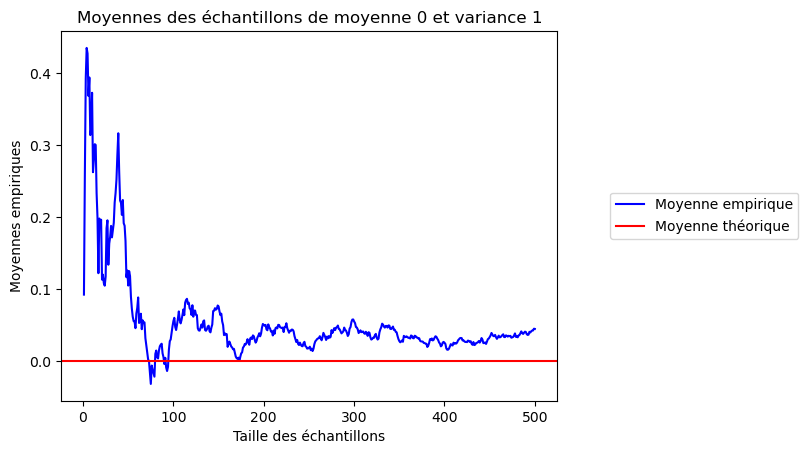

In [3]:
y= normalLLN(0, 1, 500)
x= range(1, len(y)+1)
plt.plot(x,y,'blue', label='Moyenne empirique')

plt.ylabel('Moyennes empiriques')
plt.xlabel('Taille des échantillons')
plt.title('Moyennes des échantillons de moyenne 0 et variance 1')
plt.axhline(y=0,label='Moyenne théorique', color = 'red')

plt.rcParams['figure.figsize'] = [10, 5]

plt.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5))
plt.show()

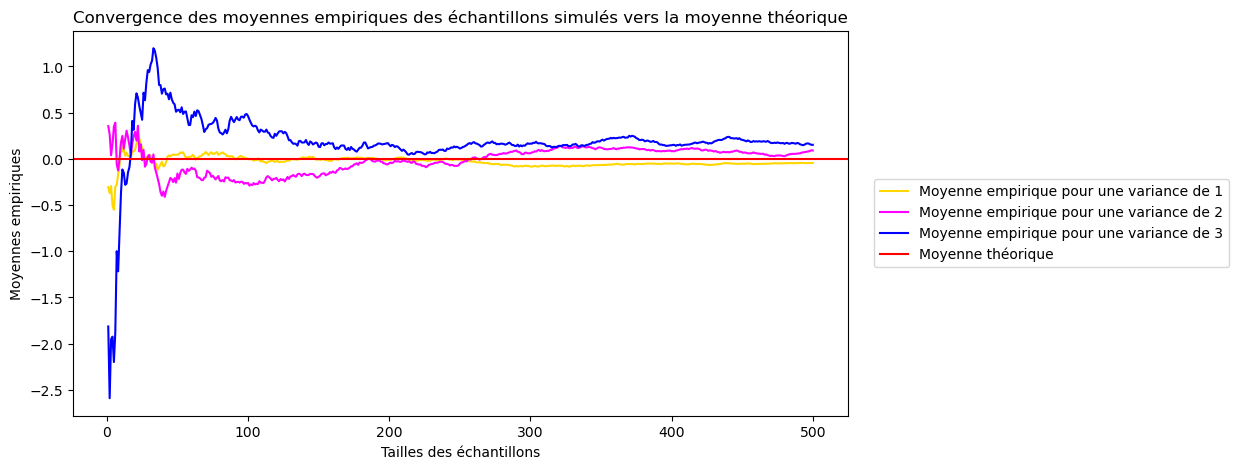

In [4]:
## Normal(0,1) --> en jaune
y= normalLLN(0, 1, 500)
x= range(1, len(y)+1)
plt.plot(x,y,'gold', label='Moyenne empirique pour une variance de 1')

## Normal(0,2) --> en magenta
y= normalLLN(0, 2, 500)
x= range(1, len(y)+1)
plt.plot(x,y,'magenta', label='Moyenne empirique pour une variance de 2')

## Normal(0,3) --> en bleu
y= normalLLN(0, 3, 500)
x= range(1, len(y)+1)
plt.plot(x,y,'blue', label='Moyenne empirique pour une variance de 3')

plt.ylabel('Moyennes empiriques')
plt.xlabel('Tailles des échantillons')
plt.title('Convergence des moyennes empiriques des échantillons simulés vers la moyenne théorique')
plt.axhline(y=0, label='Moyenne théorique', color = 'red')

plt.rcParams['figure.figsize'] = [10, 5]

plt.legend(loc = 'center right', bbox_to_anchor = (1.5,0.5))
plt.show()

Le graphique ci-dessous montre que la vitesse de convergence d'un échantillon de réalisations indépendantes et identiquement distribuées selon une loi normale d'espérance $\mu$ dépend de la variance de cette loi : plus la variance est grande, plus la vitesse de converge des moyennes empiriques des échantillons vers la moyenne théorique est petite.\
En d'autres termes, **plus la variance est petite, moins la taille de l'échantillon doit être grande pour s'approcher de l'espérance théorique**.

#### I.1.2.2. Loi gamma

Une variable aléatoire $X$ suit une loi Gamma de paramètre $k$ > 0 et $\theta$ > 0, ce que l'on note aussi $X$ $\hookrightarrow \Gamma$($k$,$\theta$) si sa fonction de densité de probabilité est de la forme :

$$
f(x; k, \theta)= \frac{x^{k-1}e^{-\frac{x}{\theta}}}{\theta^k\Gamma(k)},\hspace{1cm}\forall  x>0
$$


Si $X$ $\hookrightarrow \Gamma$($k$,$\theta$), alors 
$\mathbf{E}$($X$)=$k$$\cdot$$\theta$
et $\mathbf{V}$($X$)= $k$$\cdot$$\theta^2$





In [5]:
def Gamma(k, theta, size):
    x=list(np.random.gamma(k,theta,1))
    mean_list=[]
    for i in range(size):
        y=np.random.gamma(k,theta,1)
        y=float(y)
        x.append(y)
        mean_list.append(mean(x))
    return mean_list

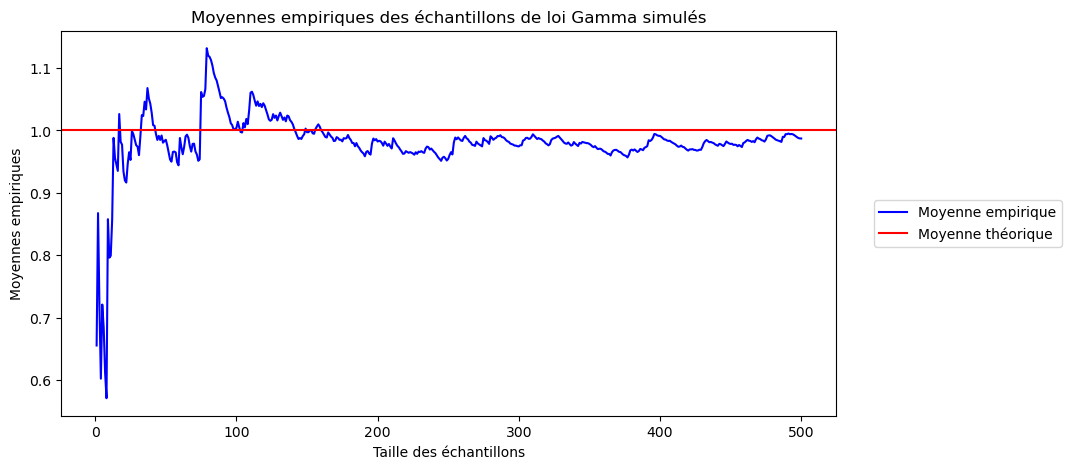

In [6]:
y= Gamma(1,1,500)
x= range(1, len(y)+1)
plt.plot(x,y,'blue', label='Moyenne empirique')

plt.ylabel('Moyennes empiriques')
plt.xlabel('Taille des échantillons')
plt.title('Moyennes empiriques des échantillons de loi Gamma simulés')
plt.axhline(y=1*1,label='Moyenne théorique', color = 'red')

plt.rcParams['figure.figsize'] = [10, 5]
    
plt.legend(loc = 'center right', bbox_to_anchor = (1.3, 0.5)) 
plt.show()

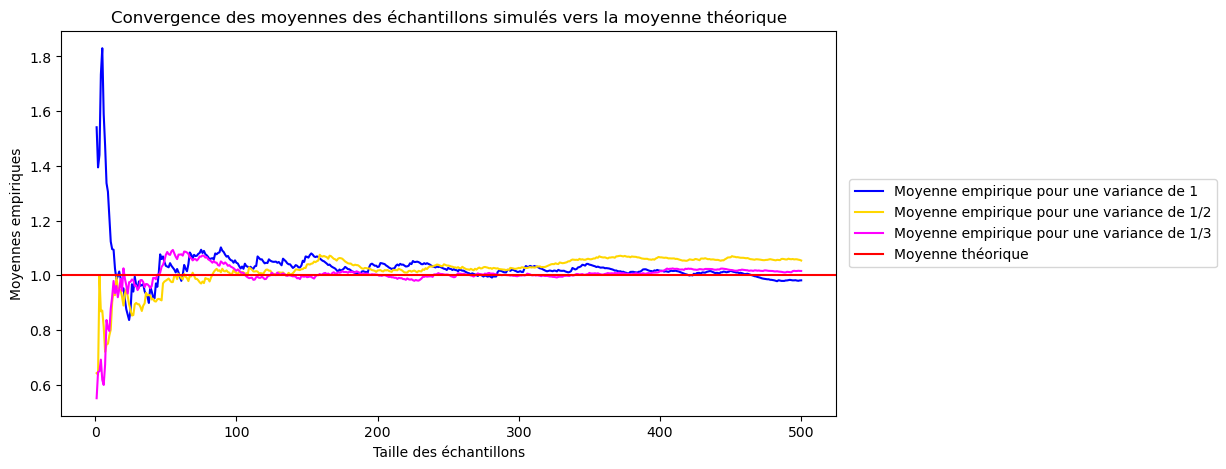

In [7]:
# Gamma(1,1) --> en bleu
y= Gamma(1,1,500)
x= range(1, len(y)+1)
plt.plot(x,y,'blue', label='Moyenne empirique pour une variance de 1')

# Gamma(2,0.5) --> en jaune
y= Gamma(2,0.5,500)
x= range(1, len(y)+1)
plt.plot(x,y,'gold', label='Moyenne empirique pour une variance de 1/2')

# Gamma(3,1/3) --> en magenta
y= Gamma(3,1/3,500)
x= range(1, len(y)+1)
plt.plot(x,y,'magenta', label='Moyenne empirique pour une variance de 1/3')

plt.ylabel('Moyennes empiriques')
plt.xlabel('Taille des échantillons')
plt.title('Convergence des moyennes des échantillons simulés vers la moyenne théorique')

plt.axhline(y=1*1,label='Moyenne théorique', color = 'red')

plt.rcParams['figure.figsize'] = [10, 5]
    
plt.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5)) 
plt.show()

Nous utilisons le même code que ci-dessus à la seule différence que les variables simulées suivent toutes une distribution Gamma avec les paramètres $k$ et $\theta$ (et non plus une normale de paramètres $\mu$ et $\sigma$²).\
**La conclusion est la même que précédemment : plus la variance est basse, plus la vitesse de convergence est faible**.

----------------------------------------------------------------------------------------------------------------

## I.2. Théorème centrale limite et intervalle de confiance

### I.2.1. Enoncé du théorème

Soit $X_{1},X_{2},...,X_{n}$ des variables aléatoires indépendantes et identiquement distribuées, et telles que $\mathbb{E}$($X_{1}^{2}$)<$\infty$.\
Alors on a : 
$$\sqrt{n}\Big(\overline{X_{n}} - \mathbb{E}(X_{1})\Big) \xrightarrow[n\rightarrow\infty]{d} \mathcal{N}\big(0,\,\mathbb{V}(X_{1})\big) $$


### I.2.2. Construction d'un intervalle de confiance

On peut ainsi utiliser ce résultat, ainsi que la loi forte des grands nombres, pour construire un intervalle de confiance asymptotique pour encadrer la moyenne empirique, qui est un bon estimateur de la moyenne théorique.

Soient $ Y \hookrightarrow \mathcal{N}(0,\,1)$, $\alpha \in ]0,1[$, et $ q_{1-\frac{\alpha}{2}}$. On note $q_{\alpha}$ le quantile d'ordre $\alpha$ de la loi normale $\mathcal{N}\big(0,\,1\big)$

\begin{equation}
\begin{split}
P(\lvert Y \rvert \leq q_{1-\frac{\alpha}{2}})& = P(-q_{1-\frac{\alpha}{2}}\leq Y \leq q_{1-\frac{\alpha}{2}})\\
& =P(Y\leq q_{1-\frac{\alpha}{2}})-P(Y\leq -q_{1-\frac{\alpha}{2}})\\
&=P(Y\leq q_{1-\frac{\alpha}{2}})-(1-P(Y\leq q_{1-\frac{\alpha}{2}}))\\
&= 1-\frac{\alpha}{2}-1+1-\frac{\alpha}{2}\\
&=1-\alpha\\
\end{split}
\end{equation}








$\newline$

On suppose que les $X_{i}$ $\hookrightarrow \Gamma$($k$,$\theta$), alors on rappelle que 
$\mathbb{E}$($X_{i}$)=$k$$\cdot$$\theta$
et $\mathbb{V}$($X_{i}$)= $k$$\cdot$$\theta^2$.\
On note $\mu = \mathbb{E}(X_{i})=k\cdot\theta$ et $\sigma^{2}=\mathbb{V}(X_{i})= k\cdot\theta^2$\
On souhaite construire un intervalle de confiance asymptotique à 95% pour $ \overline{X_{n}} $
$\\$ On sait que pour $\alpha = 0.05, \hspace{5mm}    q_{1-\frac{\alpha}{2}}=1.96$


D'après ce que précède (théorème centrale limite + loi forte des grands nombres + Slutsky), on a : <div align="center">$P\bigg(\Big\lvert\frac{\sqrt{n}\Big(\overline{X_{n}} - \mu \Big )}{\sigma}\Big\rvert \leq 1.96 \bigg) \underset{n\to +\infty}{\longrightarrow} 95\%$.

Or:


\begin{equation} 
\begin{split}
\Big\lvert\frac{\sqrt{n}\Big(\overline{X_{n}} - \mu \Big )}{\sigma}\Big\rvert \leq 1.96 & \iff 
-1.96\cdot\sigma\leq\sqrt{n}\Big(\overline{X_{n}} - \mu \Big )\leq 1.96\cdot\sigma \\ &\iff
\mu - \frac{1.96\cdot\sigma}{\sqrt{n}}\leq\overline{X_{n}}\leq \mu+ \frac{1.96\cdot\sigma}{\sqrt{n}}
\end{split}
\end{equation}

Donc, quand $n\longrightarrow +\infty$, $I = [\mu - \frac{1.96\cdot\sigma}{\sqrt{n}},\mu+ \frac{1.96\cdot\sigma}{\sqrt{n}}]$ contient la moyenne empirique avec une probabilité de $0.95$.

Ainsi, pour avoir une distance entre $\overline X_n$ et $\mu$ inférieure à $10^{-3}$, il faut et il suffit d'avoir :
<div align="center">
$2\times \frac{1.96\cdot\sigma}{\sqrt{n}} \leq 2\cdot10^{-3} \iff \frac{1.96\cdot\sigma}{\sqrt{n}} \leq 10^{-3} \iff \sqrt {n} \geq \frac{1.96\cdot\sigma}{10^{-3}} \iff n\geq \frac{(1.96 \cdot \sigma)^2}{10^{-6}} $

### I.2.3. Conclusions sur l'analyse du théorème centrale limite
On remarque ainsi que la taille nécessaire de l'échantillon pour que la moyenne empirique approche l'espérance théorique avec une précision de $10^{-3}$ ne dépend pas de la valeur de l'espérance théorique $\mu$, mais seulement de la valeur de la variance $\sigma^{2}$ de la loi qui a servi à générer l'échantillon.\
Des les faits, **le nombre de réalisations nécessaires ne dépend même pas du type de loi qu'on utilise, mais bien uniquement de la variance choisie**. Le résultat est donc le même que ce soit un loi normale, une loi Gamma, une loi exponentielle, etc.

On remarque aussi que **plus la variance est grande, plus il faut que l'échantillon soit grand pour approcher l'espérance théorique**, comme on l'avait remarqué dans le graphique plus haut.\
Ainsi, si $\sigma^{2} =1$ par exemple, il faut que $n \geq \frac{1.96^{2}}{10^{-6}} \iff n \geq 3 841 600$ (plus de 3 millions de réalisations).\
Si $\sigma^{2} =100$ par exemple, il faut que $n \geq \frac{1.96^{2}\cdot 100}{10^{-6}} \iff n \geq 38 416 000$ (plus de 38 millions de réalisations).

In [8]:
## Vérification empirique

N=3,841,600
eps=0.001
X=list()
for j in range(1000):
    x=(np.random.normal(0,1,N)).mean()
    X.append(x)

print(np.quantile(X,0.975))
print(np.quantile(X,0.025))

0.0016182735664226628
-0.0015838783967762797


----------------------------------------------------------------------------------------------------------------

## I.3. Rappels sur les quantiles empiriques

Le quantile empirique est une approche pour estimer les quantiles d'une distribution à partir de données observées. La théorie sous-jacente définit un quantile empirique comme étant la valeur correspondante à un niveau de confiance donné.

Pour un niveau $\alpha$, le $\alpha$-quantile empirique est la valeur $x_{(\alpha)}$ telle que:

$$\alpha = \frac{1}{n} \sum_{i=1}^{n} [X_i \leq x_{(\alpha)}]$$

où $X_1, X_2, ..., X_n$ sont les données observées, et $n$ est le nombre de données.

La fonction ci-dessus est la probabilité cumulée de la distribution estimée par les données observées, et le quantile empirique est la valeur pour laquelle la probabilité cumulée est égale à $\alpha$.

En d'autres termes, **le quantile empirique est un estimateur non-paramétrique des quantiles** d'une distribution à partir de données observées.


**La convergence du quantile empirique vers le quantile théorique est un résultat important en statistiques. Cela signifie que lorsque nous avons suffisamment de données observées, l'estimation du quantile empirique devient de plus en plus proche de la valeur théorique**.

Nous pouvons démontrer cela en utilisant le théorème centrale limite, qui précise que pour une série de données provenant d'une population avec une moyenne finie et une variance finie, la moyenne des échantillons aléatoires tend vers la moyenne de la population. De manière similaire, nous pouvons montrer que le quantile empirique tend vers le quantile théorique pour une série de données assez grande.

Formellement, nous pouvons écrire cela comme suit:

$$\sqrt{n}(\hat{F}_{n}(x{(\alpha)}) - \alpha) \xrightarrow{d} N(0, F'(x_{(\alpha)})^2)$$

où
* $\hat{F}_{n}(x{(\alpha)})$ est le quantile empirique pour un niveau de confiance $\alpha$,
* $F(x_{(\alpha)})$ est la fonction de distribution théorique correspondante, $F'(x_{(\alpha)})$ est la dérivée de la fonction de distribution théorique,
* et $N(0, F'(x_{(\alpha)})^2)$ décrit la distribution normale centrée autour de 0 avec une variance égale à $F'(x_{(\alpha)})^2$.

Cela signifie que **la différence entre le quantile empirique et le quantile théorique suit une distribution normale, et que la variance de cette différence tend vers 0 lorsque le nombre de données augmente**. Par conséquent, pour suffisamment de données, **l'estimation du quantile empirique devient de plus en plus proche de la valeur théorique**.

----------------------------------------------------------------------------------------------------------------

## I.4. Convergence

Au lieu de faire une trajectoire sur la loi des grands nombres et sa vitesse de convergence, on peut faire plusieurs trajectoires notamment sur les quantiles. Ici, nous montrerons la convergence à partir de 2 quantiles : 5% et 95%.

### I.4.1. Simulation des quantiles 5% et 95% pour différentes tailles n

In [9]:
import pandas as pd

In [10]:
N=0
Q1=list()
Q2=list()
for n in range(100,100000,100):
    X=list()
    for j in range(100):
        x=(np.random.normal(0,1,n)).mean()
        X.append(x)
    Q1.append(np.quantile(X,0.95))
    Q2.append(np.quantile(X,0.05))

In [11]:
data=pd.DataFrame(list(zip(Q1,Q2)),
               columns =['Q1', 'Q2'])
data.index=[u for u in range(100,100000,100)]
print(data.iloc[:3,:])

           Q1        Q2
100  0.131650 -0.169729
200  0.124712 -0.114144
300  0.086153 -0.109570


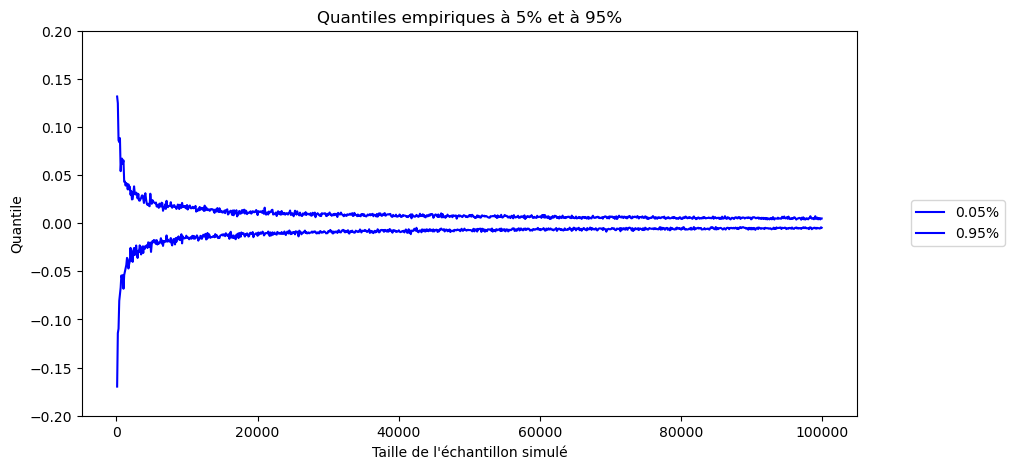

In [12]:
plt.figure(figsize=(10,5), dpi=100)

plt.plot(data.index, data.Q2, color='blue')
plt.plot(data.index, data.Q1, color='blue')

#plt.hlines(k*theta,0, np.max(data.index),color='black',linestyle='dashed')

plt.ylim(-0.2,0.2)
V=['0.05%','0.95%']
plt.legend(V, loc = 'center right', bbox_to_anchor = (1.2,0.5))

plt.xlabel("Taille de l'échantillon simulé")
plt.ylabel('Quantile')
plt.title('Quantiles empiriques à 5% et à 95%')

plt.show()

### I.4.2. Comparaison entre quantiles théoriques et quantiles empiriques simulés

In [13]:
t=data.index.values
x=data.Q1

In [14]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error

In [15]:
mod=LR()
A=np.array(data.index.values)
B=np.array(data.Q1)

In [16]:
data=data.reset_index()
data['un']=1
data['sqrt_n']=1/np.sqrt(data['index'])
data.head()

index        Q1        Q2  un    sqrt_n
0    100  0.131650 -0.169729   1  0.100000
1    200  0.124712 -0.114144   1  0.070711
2    300  0.086153 -0.109570   1  0.057735
3    400  0.084255 -0.080650   1  0.050000
4    500  0.088354 -0.073514   1  0.044721

In [17]:
X=pd.DataFrame(data['sqrt_n'])
y = data['Q1']
lm = LR()
model=lm.fit(X, y)
beta1=model.coef_[0]
QQ1=model.predict(X) 
print("Le coefficient beta avec les données Q1 vaut : " + str(beta1))

y = data['Q2']
model=lm.fit(X, y)
beta2=model.coef_[0]
print("Le coefficient beta avec les données Q2 vaut : " + str(beta2))
QQ2=model.predict(X) 

data['QQ2']=QQ2
data['QQ1']=QQ1

Le coefficient beta avec les données Q1 vaut : 1.551124661293554
Le coefficient beta avec les données Q2 vaut : -1.6624368828296157


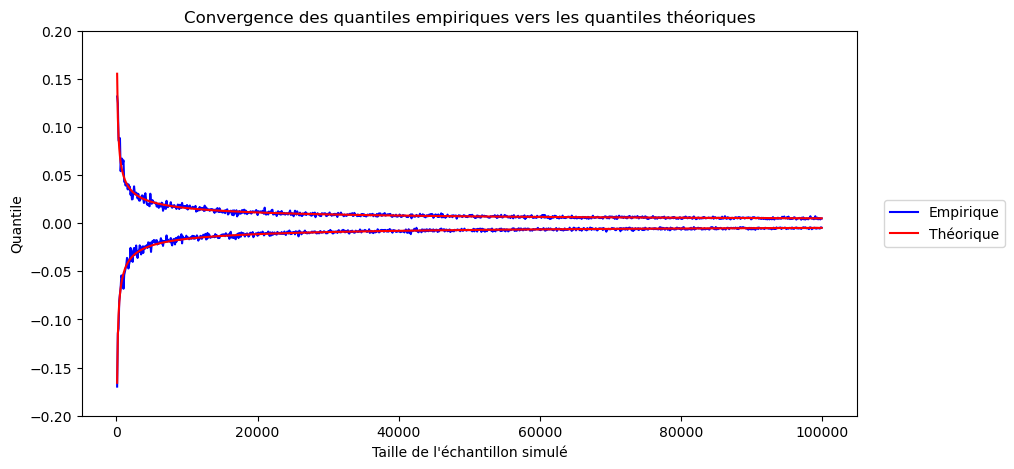

In [18]:
plt.figure(figsize=(10,5), dpi=100)

plt.plot(data['index'], data.Q2,color='blue')
plt.plot(data['index'], data.QQ2,color='red')

plt.plot(data['index'], data.Q1,color='blue')
plt.plot(data['index'], data.QQ1,color='red')


#plt.hlines(k*theta,0, np.max(data.index),color='black',linestyle='dashed')

plt.ylim(-0.2,0.2)
V=['Empirique','Théorique']
plt.legend(V, loc = 'center right', bbox_to_anchor = (1.2, 0.5))

plt.xlabel("Taille de l'échantillon simulé")
plt.ylabel("Quantile")
plt.title("Convergence des quantiles empiriques vers les quantiles théoriques")

plt.show()

----------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------

Comme nous venons de voir, la méthode de Monte-Carlo utilisée pour obtenir les quantiles nécessite un nombre conséquent 
de *samples* pour avoir un résultat *proche* de la valeur théorique.

En ce sens, il serait  dommageable de calculer les quantiles (c'est à dire les risques en températures) avec un histsorique de températures (en général de 20-30 ans).
Si nous disposons, en effet, d'un simulateur de températures, nous bénéficierons d'un nombre quasi illimité de scénarios de températures, et ainsi pourrons-nous avoir suffisament de *samples* pour calculer un quantile, par la méthode de Monte-Carlo.
 

# II. Simulateur

Nous utilisons à partir de maintenant la **base de données des températures quotidiennes à Paris de 1980 à 2009 fournie par ENGIE**. Les températures ont été vérifiées par des météorologues afin d'éviter toute erreur de relève. **Nous pouvons donc faire confiance aux données qui nous ont été fournies par ENGIE**.

Dans cette partie, nous allons faire le **travail d'analyse de données d'un ingénieur d'ENGIE qui reçoit les données météorologiques** avec l'idée qu'il devra, ensuite, simuler les températures futures dans le but de répondre aux problèmes posés.

----------------------------------------------------------------------------------------------------------------

## II.0. Importation des données
Nous commençons par importer les données de températures fournies par ENGIE et retraitons immédiatement le format des dates afin que celles-ci soient lisibles par Python.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
## Retrait des messages d'erreurs
## (ajouté à la fin du code, une fois que tous les warnings ont été jugés comme dispensables)

import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('histo.csv')
df.head()

date      temp  year
0  01/01/1980  0.194907  1980
1  02/01/1980 -0.363261  1980
2  03/01/1980 -0.390026  1980
3  04/01/1980  5.142656  1980
4  05/01/1980  4.560850  1980

In [22]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True, format = "%d/%m/%Y" )
df.head()

date      temp  year
0 1980-01-01  0.194907  1980
1 1980-01-02 -0.363261  1980
2 1980-01-03 -0.390026  1980
3 1980-01-04  5.142656  1980
4 1980-01-05  4.560850  1980

----------------------------------------------------------------------------------------------------------------

## II.1. Approche naïve de l'analyse des données

In [23]:
print(df["temp"].describe())

count    10958.000000
mean        10.903257
std          6.295514
min        -12.259838
25%          6.334568
50%         11.048879
75%         15.771872
max         29.448380
Name: temp, dtype: float64


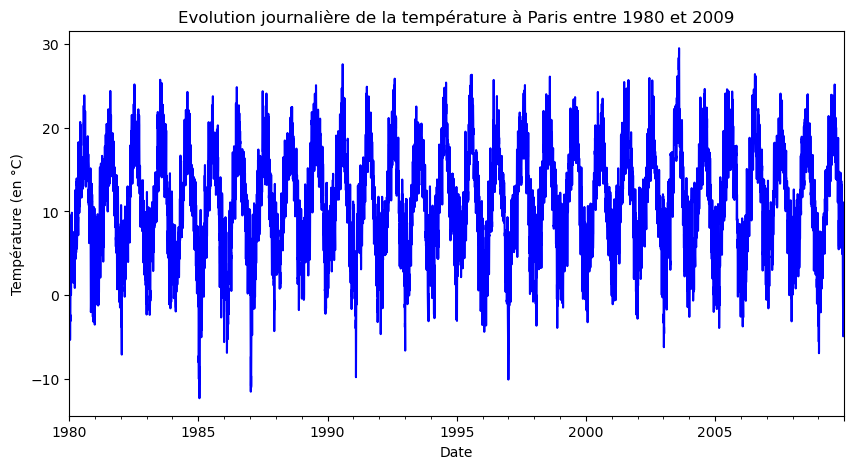

In [24]:
grouped = df.groupby("date")["temp"].mean()
grouped.plot(kind="line", color = "blue")

plt.title('Evolution journalière de la température à Paris entre 1980 et 2009')
plt.xlabel('Date')
plt.ylabel('Température (en °C)')
          
plt.show()

On observe sur ce graphique l'évolution quotidienne de la température à Paris entre 1980 et 2009. A première vue, **la fonction des températures semble périodique avec une période d'une année, la saisonnalité**.\
Nous devrions analyser l'évolution de la moyenne, médiane, l'écart-type en fonction des années afin d'avoir une idée plus précise. 

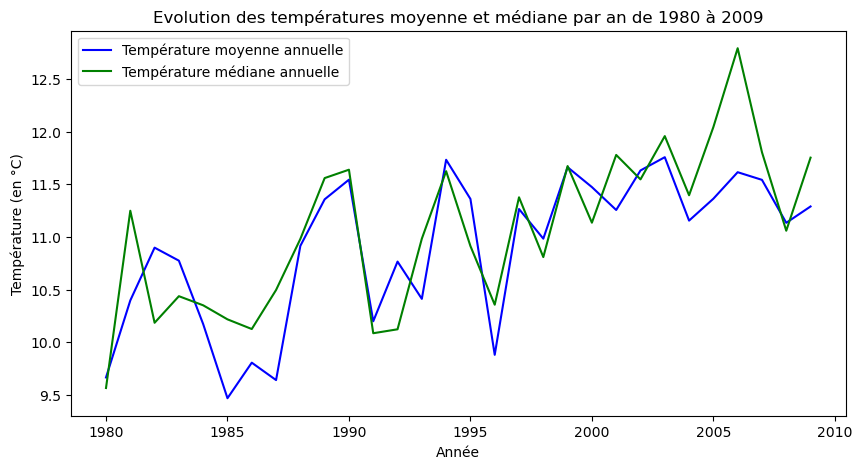

In [25]:
grouped = df.groupby("year")["temp"].mean()
grouped.plot(kind="line", label = "Température moyenne annuelle", color = "blue")

grouped2 = df.groupby("year")["temp"].median()
grouped2.plot(kind='line', label = "Température médiane annuelle", color = "green")

plt.title('Evolution des températures moyenne et médiane par an de 1980 à 2009')
plt.xlabel('Année')
plt.ylabel('Température (en °C)')
plt.legend()

plt.show()

Ce graphique représente la moyenne et la médiane des températures en fonction de l'année.\
**Si les températures semblent augmenter, elles ne le font pas de manière linéaire ou "triviallement" prévisible**.

Remarquons qu'il existe différents algorithmes, provenant par exemple de Météo-France, qui permettent de *réchauffer* les températures. Il n'y a cependant pas unicité des algorithmes.


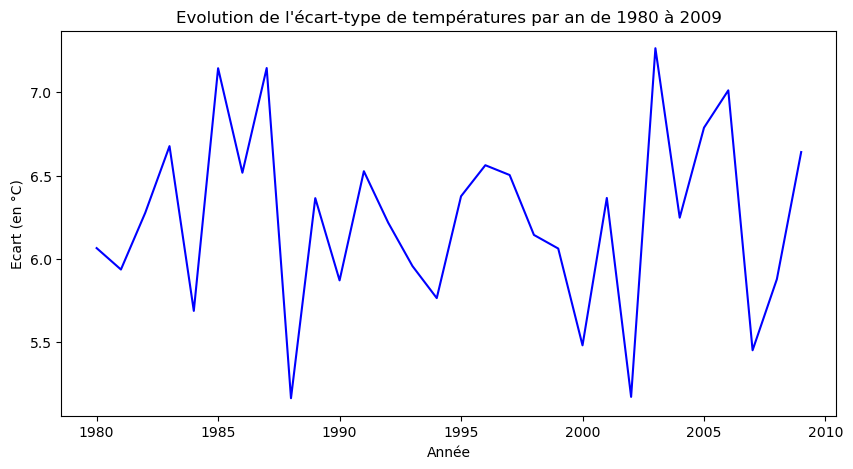

In [26]:
grouped3 = df.groupby("year")["temp"].std()
grouped3.plot(kind='line', color = "blue")

plt.title("Evolution de l'écart-type de températures par an de 1980 à 2009")
plt.xlabel('Année')
plt.ylabel('Ecart (en °C)')

plt.show()

Ce graphique représente alors l'évolution de l'écart-type en fonction des années.\
On observe que l'évolution des températures n'est pas cyclique, ni linéaire, et que les écarts moyens à la moyenne des températures sont tous assez significatifs.

#### Principales conclusions de l'approche naïve de l'analyse de données :
1. Les **températures** semblent **périodiques (de période égale à une année) et saisonnière**.


2. Si l'**augmentation des températures** est une réalité empirique, elle n'est **pas linéaire ni triavallement prévisible**.


3. La **saisonnalité des températures** est confirmée par les **écarts significatifs des températures à la moyenne annuelle des températures** (écart-types importants). On peut alors introduire le concept d'**anomalie de température**, c'est-à-dire l'écart entre la température relevée à la date $t$ et la normale de saison.

----------------------------------------------------------------------------------------------------------------

## II.2. Normales de saison

Dans cette partie, nous allons alors **construire le modèle suivant** :\
Si nous notons $X_t$ la temperature à la date $t$, nous pouvons la réécrire $X_{a,\,j}$, ou $j$ désigne le jour entre $\{1,\ldots, 365\}$ et $a$ l'année.\
On suppose dans toute la suite du projet que toutes les années ne comportent que 365 jours.\
Notons $S_j=\mathbf E_a[ X_{a,\,j}]$, la moyenne saisonnière.

**On peut alors définir $A$, l'anomalie de température :
$$
X_{a,\,j} = S_j + A_{a,\,j}.
$$**
Par construction $A$ est centré.

### II.2.1. Suppression des 29 févriers

**Nous commençons donc par supprimer les 29 févriers de notre jeu de données.** \
Nous nous permettons un tel retrait car :
* avoir une donnée en plus tous les 4 ans rend complexifie trop l'analyse des données et les calculs pour générer le simulateur de températures par la suite.
* **retirer de huit valeurs à notre jeu de données de plus de 10 000 données ne changera pas nos conclusions**.
* les températures au 29 février sont assez similaires aux températures du 28 février et du 1er mars.

In [27]:
print('Avec tous les 29 févriers, le jeu de données contient',len(df),'valeurs de températures.')

Avec tous les 29 févriers, le jeu de données contient 10958 valeurs de températures.


In [28]:
df_29_feb = df[(df.date.dt.month == 2)&(df.date.dt.day==29)]
df_29_feb

date       temp  year
59    1980-02-29   3.759341  1980
1520  1984-02-29   2.432141  1984
2981  1988-02-29   1.675831  1988
4442  1992-02-29   7.990333  1992
5903  1996-02-29   5.217467  1996
7364  2000-02-29   6.905734  2000
8825  2004-02-29   0.543737  2004
10286 2008-02-29  10.753639  2008

In [29]:
print('Il y a eu',len(df_29_feb),'29 février entre 1980 et 2009')

Il y a eu 8 29 février entre 1980 et 2009


In [30]:
indexes_to_drop = df_29_feb.index.values.tolist()
indexes_to_drop

[59, 1520, 2981, 4442, 5903, 7364, 8825, 10286]

In [31]:
df = df.drop(labels = indexes_to_drop , axis = 'index')
df = df.reset_index(drop = True)
print('Le jeu de données de températures sans les 29 févriers contient',len(df),'valeurs.')

Le jeu de données de températures sans les 29 févriers contient 10950 valeurs.


Nous avons bien retiré les 8 occurences de 29 février de notre jeu de données. Nous allons donc pouvoir commencer à travailler avec 365 jours par an, sans être dérangés par les années bisextiles.

### II.2.2. Moyenne saisonnière à partir des données

**Nous calculons à présent la moyenne des températures jour par jour sur 30 ans (de 1980 à 2009)**.\
Cela nous permettra de savoir, en moyenne, la température qu'il fait le 1er janvier, le 2 janvier, ..., le 31 décembre, afin de la prédire ensuite.

*Quelle est notre démarche ?*
1. Nous créons un jeu de données, `df_mean`, à partir de la fonction `groupby` qui nous permet d'obtenir la température moyenne au jour $j$ du mois $m$ sur la période 1980 - 2009.


2. Nous introduisons une liste des valeurs moyennes jour par jour `mean_temp` à partir des valeurs de `df_mean` afin de savoir quelle est le température moyenne du jour $j$ du mois $m$.


3. Nous numérotons les jours dans chaque année (exemple : le 5 janvier est le 5ème jour de l'année), ce que nous ferons grâce à la fonction `numjouran`, et recenssons ces valeurs dans la colonne `day_number` de notre historique de températures `df`.


4. Nous associons chaque jour de l'année à sa température moyenne, et donc chaque température moyenne à chaque date du jeu de données, et introduisons cette moyenne dans notre historique de températures `df`par la colonne `day_mean_temp`.


5. Nous représentons grpahiqueemnt les données obtenues pour nous donner une idée de la répartition des moyennes journalières de température.

In [32]:
## Etape 1 : création du jeu de données df_mean

df_mean = df.groupby([(df.date.dt.month), (df.date.dt.day)])['temp'].mean()
df_mean

date  date
1     1       3.678682
      2       4.369727
      3       3.670631
      4       3.884985
      5       4.587571
                ...   
12    27      4.020571
      28      3.274458
      29      3.294321
      30      4.066375
      31      3.920668
Name: temp, Length: 365, dtype: float64

In [33]:
## Etape 2 : création de la liste des températures moyennes à partir de df_mean

mean_temp = df_mean.values

print('On obtient en tout', len(mean_temp), 'témpartures moyennes (car il y a 365 jours tous les ans)')
print('En moyenne, le 1er janvier, il fait', mean_temp[0],'dégrés celcius')

On obtient en tout 365 témpartures moyennes (car il y a 365 jours tous les ans)
En moyenne, le 1er janvier, il fait 3.6786818188333332 dégrés celcius


In [34]:
## Etape 3 : numérotation des jours de l'année

df['day_number']=[u for u in range(365)]*(df.shape[0]//365)
df['day_number'] = df['day_number'] + 1
df

date      temp  year  day_number
0     1980-01-01  0.194907  1980           1
1     1980-01-02 -0.363261  1980           2
2     1980-01-03 -0.390026  1980           3
3     1980-01-04  5.142656  1980           4
4     1980-01-05  4.560850  1980           5
...          ...       ...   ...         ...
10945 2009-12-27  4.980543  2009         361
10946 2009-12-28  2.817506  2009         362
10947 2009-12-29  8.184358  2009         363
10948 2009-12-30  9.624605  2009         364
10949 2009-12-31  7.291315  2009         365

[10950 rows x 4 columns]

In [35]:
## Etape 4 : association de la température moyenne de chaque jour à chaque date

df['day_mean_temp'] = np.zeros(len(df))

for i in range(len(df)):
    df['day_mean_temp'][i] = mean_temp[(df['day_number'][i])-1]
    
df

date      temp  year  day_number  day_mean_temp
0     1980-01-01  0.194907  1980           1       3.678682
1     1980-01-02 -0.363261  1980           2       4.369727
2     1980-01-03 -0.390026  1980           3       3.670631
3     1980-01-04  5.142656  1980           4       3.884985
4     1980-01-05  4.560850  1980           5       4.587571
...          ...       ...   ...         ...            ...
10945 2009-12-27  4.980543  2009         361       4.020571
10946 2009-12-28  2.817506  2009         362       3.274458
10947 2009-12-29  8.184358  2009         363       3.294321
10948 2009-12-30  9.624605  2009         364       4.066375
10949 2009-12-31  7.291315  2009         365       3.920668

[10950 rows x 5 columns]

Text(0, 0.5, 'Température moyenne (en °C)')

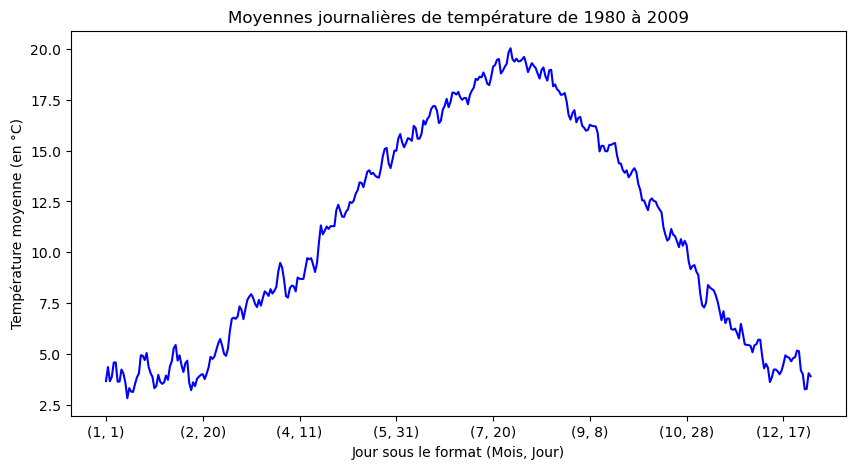

In [36]:
## Etape 5 : Représentation graphique des moyennes journalières de température

ax = df_mean.plot(color = 'blue', title = "Moyennes journalières de température de 1980 à 2009")

ax.set_xlabel("Jour sous le format (Mois, Jour)")
ax.set_ylabel("Température moyenne (en °C)")

### II.2.3. Normales de saison : approximation par les séries de Fourier

On souhaite trouver une fonction $f : j\mapsto f(j)$ qui approximerait les températures moyennes journalières $S_{j}$ pour tout jour $j\in\{1,\ldots,365\}$ afin de trouver une fonction plus lisse et déterministe qui nous permettra de simuler, ensuite, les températures en ayant uniquement l'anomalie de température comme terme stochastique.

#### II.2.3.1 En théorie

##### Cas général

Si $f\,:\mathbf R \to \mathbf R$ est périodique de périodique $T$, il existe des scalaires $a_n$ et $b_n$ tels que :
$$
\forall x\in \mathbf R,\,f(x)=\sum_n a_n {\rm cos} \left(\frac{2\pi n}{T}x\right) + b_n{\rm sin} \left(\frac{2\pi }{T}x\right),
$$
sous de bonnes conditions de régularités sur $f$.

En particulier, la série converge. Ceci implique que de *bonnes* fonctions périodiques peuvent être approximées par des polynomes trigonomtriques (en tronquant la série convergente ci-dessus). Autrement dit, on aura, pour un $N$ fixé :

$$
\forall x,\,f(x) = \sum_{n\leqslant N}  a_n {\rm cos} \left(\frac{2\pi n}{T}x\right) + b_n{\rm sin} \left(\frac{2\pi n}{T}x\right) + R_N(x),
$$
où $R_N$ est *petit*

##### Cas des températures

Si $X_t$ désigne la température à la date $t$ (en jour), comme les températures suivent un schéma saisonnier, de période 365, il peut être opportun de trouver une **décomposition : 
$$
X_t = X_{a,\,j} = S_j + A_{a,\,j},
$$
où les $(S_j)_j$ seront la normale de saison**.

Suivant l'exemple de la décomposition des fonctions périodiques puisque les grandes variations de températures sont données par la saison, on va **chercher la normale de saison comme une somme de polynômes trigonométriques**. 


On voudra écrire, par exemple en prenant $N=2$:
$$
\begin{align}
X_t= &\, a_0 + \\
&\,a_1 {\rm cos} \left(\frac{2\pi}{365}t\right) + b_1{\rm sin} \left(\frac{2\pi }{365}t\right) +\\ 
&\,a_2 {\rm cos} \left(\frac{2\times 2\pi}{365}t\right) + b_2{\rm sin} \left(\frac{2 \times 2\pi }{365}t\right) +\\ 
&\,a_3 {\rm cos} \left(\frac{3\times 2\pi}{365}t\right) + b_3{\rm sin} \left(\frac{3 \times 2\pi }{365}t\right) +\\ 
&\,A_{a,\,j},
\end{align}
$$
où $A$ joue le role de $R$ ci-dessus.

#### II.2.3.2. En pratique

##### Lecture des données
On reprend le dernier jeu de donné `df` que nous avions préparé dans la partie précédente. On y ajoute la colonne `t` dans la perspective de l'exploiter avec la construction de $(X_t)_t$ proposée ci-dessus.

In [37]:
df['t']=range(df.shape[0])
df.head()

date      temp  year  day_number  day_mean_temp  t
0 1980-01-01  0.194907  1980           1       3.678682  0
1 1980-01-02 -0.363261  1980           2       4.369727  1
2 1980-01-03 -0.390026  1980           3       3.670631  2
3 1980-01-04  5.142656  1980           4       3.884985  3
4 1980-01-05  4.560850  1980           5       4.587571  4

##### Construction des harmoniques de Fourier
On construit les harmoniques de Fourier, utiles pour donner la fonction de régression $f$ telle que définie précédemment.

Pour cela, nous construisons la fonction `MakeSINCOS` qui retourne les coefficients $a_n$ et $b_n$ à partir du jeu de données `df`. Tous les coefficients $a_0$, $a_1$, $a_2$, $a_3$ et $b_1$, $b_2$, $b_3$ sont recensés dans le tableau (*dataframe*) `Y`.

In [38]:
def MakeSINCOS(t,T,n):
    a=[np.cos(2*np.pi*n/T*u) for u in t]
    b=[np.sin(2*np.pi*n/T*u) for u in t]
    return a,b,"COS"+str(n),"SIN"+str(n)


Y=pd.DataFrame()
N=3
for i in range(N):
    A=MakeSINCOS(df.t,365,i+1)
    Y[A[2]]=A[0]
    Y[A[3]]=A[1]
Y.head()

COS1      SIN1      COS2      SIN2      COS3      SIN3
0  1.000000  0.000000  1.000000  0.000000  1.000000  0.000000
1  0.999852  0.017213  0.999407  0.034422  0.998667  0.051620
2  0.999407  0.034422  0.997630  0.068802  0.994671  0.103102
3  0.998667  0.051620  0.994671  0.103102  0.988023  0.154309
4  0.997630  0.068802  0.990532  0.137279  0.978740  0.205104

----

##### Décomposition
A partir du package `LinearRegression`de `sklearn`, nous faisons coincider nos données du dataset `df` avec la fonction de régression linéaire $f$ telle que définie au préalable et dont les coefficients de régression ont été déterminés et recensés dans le dataframe `Y`. 

In [39]:
from sklearn.linear_model import LinearRegression as lm

In [40]:
reg = lm().fit(Y, df.temp)
df['normale saison'] = reg.predict(Y)

In [41]:
# On récupère une fonction normale_saison qui donne la normale de saison à chaque jour j d'une année quelconque

df_80 = df[df.date.dt.year == 1980]
normales = df_80['normale saison']

def normale_saison(day_number):
    return(normales[day_number -1])

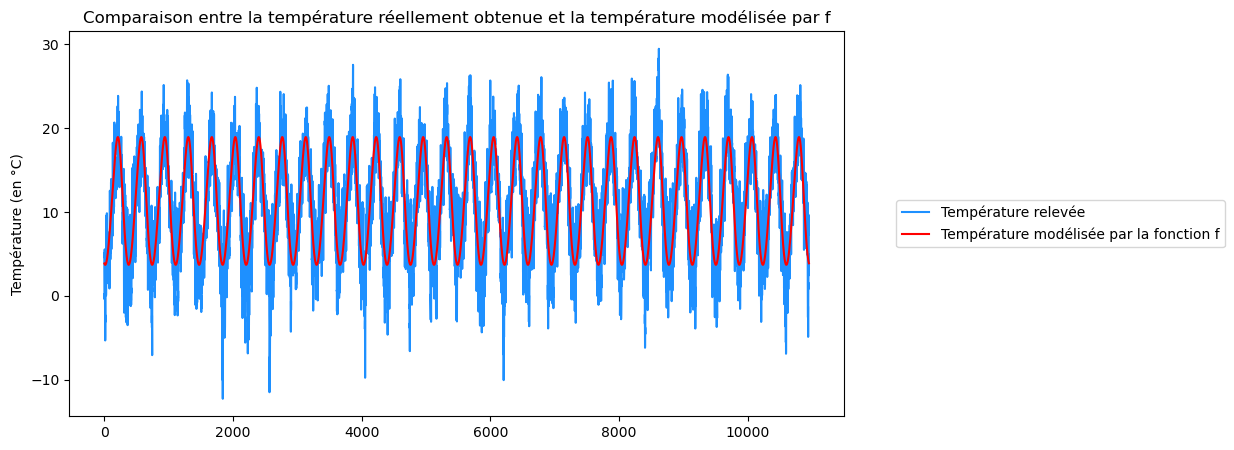

In [42]:
plt.plot(df.t,df.temp,color='dodgerblue', label = 'Température relevée')
plt.plot(df.t,df['normale saison'],color='red', label = 'Température modélisée par la fonction f')

plt.ylabel('Température (en °C)')
plt.title('Comparaison entre la température réellement obtenue et la température modélisée par f')
plt.legend(loc = 'center right', bbox_to_anchor = (1.5,0.5))

plt.show()

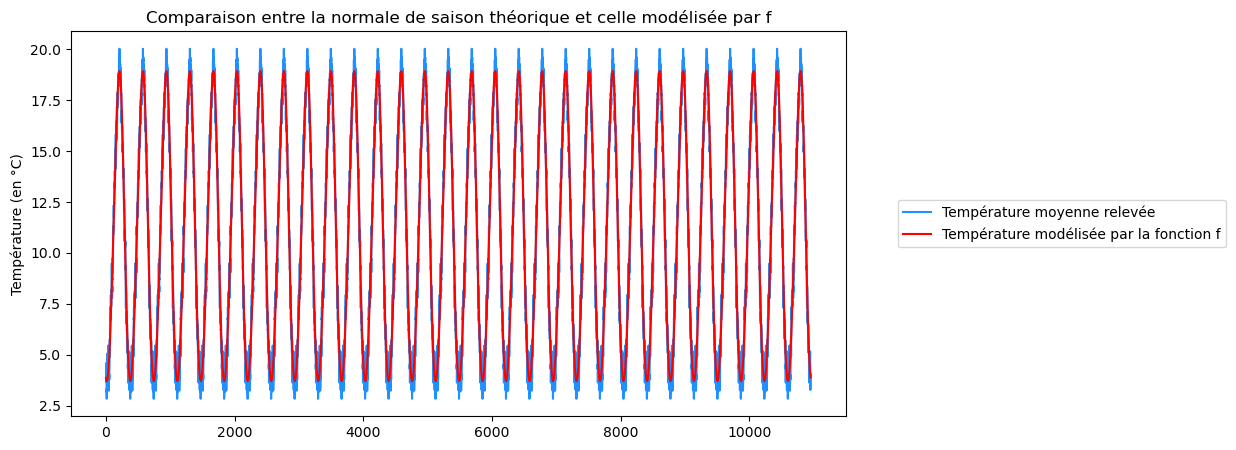

In [43]:
plt.plot(df.t,df.day_mean_temp,color='dodgerblue', label = 'Température moyenne relevée')
plt.plot(df.t,df['normale saison'],color='red', label = 'Température modélisée par la fonction f')

plt.ylabel('Température (en °C)')
plt.title('Comparaison entre la normale de saison théorique et celle modélisée par f')
plt.legend(loc = 'center right', bbox_to_anchor = (1.5,0.5))

plt.show()

In [44]:
df.head()

date      temp  year  day_number  day_mean_temp  t  normale saison
0 1980-01-01  0.194907  1980           1       3.678682  0        3.862563
1 1980-01-02 -0.363261  1980           2       4.369727  1        3.838604
2 1980-01-03 -0.390026  1980           3       3.670631  2        3.816601
3 1980-01-04  5.142656  1980           4       3.884985  3        3.796550
4 1980-01-05  4.560850  1980           5       4.587571  4        3.778447

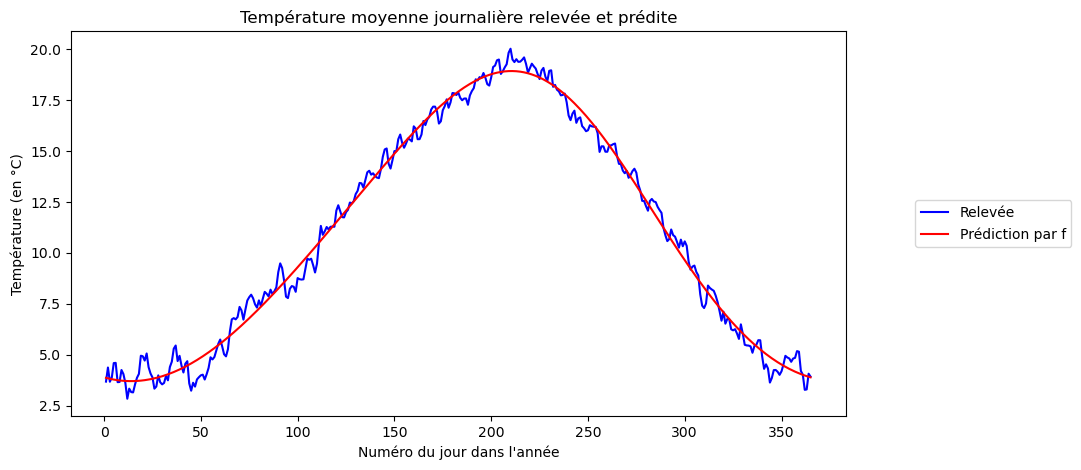

In [45]:
df_mean_theoric = df.groupby(['day_number'])['temp'].mean()
df_normale = df.groupby(['day_number'])['normale saison'].mean()

df_mean_theoric.plot(color = 'blue', label = 'Relevée')
df_normale.plot(color = 'red', label = 'Prédiction par f')

plt.title('Température moyenne journalière relevée et prédite')
plt.ylabel('Température (en °C)')
plt.xlabel("Numéro du jour dans l'année")
plt.legend(loc = 'center right', bbox_to_anchor = (1.3,0.5))

plt.show()

#### II.2.3.3 Conclusions sur l'approximation des normales de saison par séries de Fourier
Nous avons réalisé une approximation des températures journalières moyennes par une fonction déterministe prenant en entrée le jour $j$ de l'année $a$ et retournant la normale de saison à ce jour.

Cette fonction déterministe, $f$, est donnée par :\
$\forall t \in {1,..., 365}$,
$$
\begin{align}
f(t)= &\, a_0 + \\
&\,a_1 {\rm cos} \left(\frac{2\pi}{365}t\right) + b_1{\rm sin} \left(\frac{2\pi }{365}t\right) +\\ 
&\,a_2 {\rm cos} \left(\frac{2\times 2\pi}{365}t\right) + b_2{\rm sin} \left(\frac{2 \times 2\pi }{365}t\right) +\\ 
&\,a_3 {\rm cos} \left(\frac{3\times 2\pi}{365}t\right) + b_3{\rm sin} \left(\frac{3 \times 2\pi }{365}t\right) 
\end{align}
$$

Nous soulignons que nous n'avons eu besoin que de trois harmoniques de Fourier car:
* aucun changement majeur n'apparaissait après l'ajout de 3 harmoniques.
* calculer les coefficients pour chaque harmonique est coûteux.

### II.2.4 Conclusion  sur les normales de saison

Dans cette partie, nous nous sommes intéressés aux températures journalières relevées par MétéoFrance entre le 1er janvier 1980 et le 31 décembre 2009.

Nous avons pu construire un modèle \
$$ X_{a,\,j} = S_j + A_{a,\,j}.$$

    
où :
- $X_{a,\,j}$ est la température du jour $j \in {1,...,365}$ de l'année $a \in {1980,...,2009}$.
- $S_j$ est la normale de saison du jour $j \in {1,...,365}$ sur les trente ans fournies.
- $A_{a,\,j}$ est l'anomalie de température au jour $j \in {1,...,365}$ de l'année $a \in {1980,...,2009}$, c'est-à-dire l'écart entre la température prélevée ce jour et la température théorique *(i.e la température moyenne au jour j)*.


La fonction $f$ nous donne le terme $S$ de manière déterministe.\

----

## II.3. Anomalie de température

Nous nous intéressons désormais à  l'**anomalie de température**, c'est-à-dire l'écart entre la normale de saison et la témpérature relevée à la date $t$.

### II.3.1. Calcul de l'anomalie de température

Nous commençons par calculer l'anomalie de température en retirant la normale de saison à la température relevée à la date $t$ et stockons les valeurs dans la colonne `anomalie en t` de l'historique de températures `df`.

In [46]:
df['anomalie en t'] = df['temp'] - df['normale saison']
df

date      temp  year  day_number  day_mean_temp      t   
0     1980-01-01  0.194907  1980           1       3.678682      0  \
1     1980-01-02 -0.363261  1980           2       4.369727      1   
2     1980-01-03 -0.390026  1980           3       3.670631      2   
3     1980-01-04  5.142656  1980           4       3.884985      3   
4     1980-01-05  4.560850  1980           5       4.587571      4   
...          ...       ...   ...         ...            ...    ...   
10945 2009-12-27  4.980543  2009         361       4.020571  10945   
10946 2009-12-28  2.817506  2009         362       3.274458  10946   
10947 2009-12-29  8.184358  2009         363       3.294321  10947   
10948 2009-12-30  9.624605  2009         364       4.066375  10948   
10949 2009-12-31  7.291315  2009         365       3.920668  10949   

       normale saison  anomalie en t  
0            3.862563      -3.667656  
1            3.838604      -4.201864  
2            3.816601      -4.206627  
3            3.796550       1.346106  
4            3.778447       0.782403  
...               ...            ...  
10945        4.011826       0.968717  
10946        3.978034      -1.160527  
10947        3.946214       4.238144  
10948        3.916365       5.708240  
10949        3.888482       3.402832  

[10950 rows x 8 columns]

### II.3.2. Analyse de l'anomalie de température

**Nous nous intéressons à l'évolution de cette anomalie de température au fil des années**.\
Pour cela nous allons regarder :
- d'abord, la distribution de l'anomalie,
- puis, la moyenne de l'anomalie de température par année entre 1980 et 2009,
- ensuite, la moyenne de l'anomalie de température par mois dentre 1980 et 2009,
- enfin, la moyenne de l'anomalie de température par mois et par année entre 1980 et 2009.

In [47]:
## Espérance de l'anomalie

df['anomalie en t'].mean()

7.060004534310402e-16

**En moyenne, l'anomalie de température est très proche de 0**.\
Ce résultat est en accord avec la construction centrée des anomalies de température.

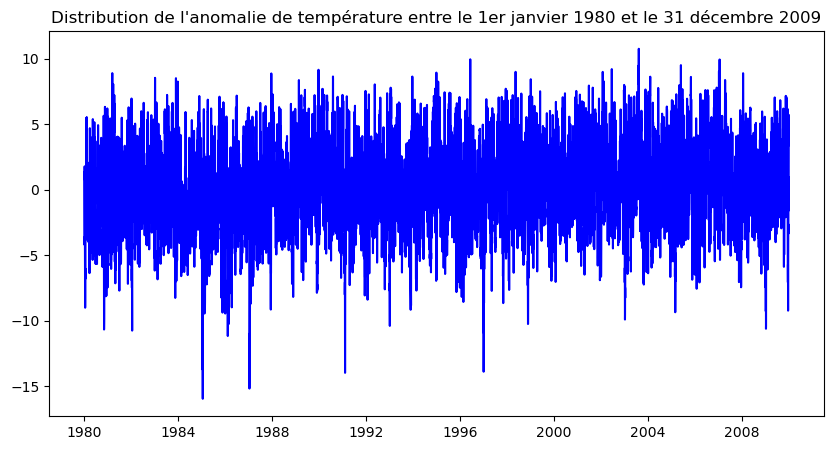

In [48]:
## Distribution de l'anomalie de température sur 30 ans
plt.plot(df.date, df['anomalie en t'], color = 'blue')
plt.title("Distribution de l'anomalie de température entre le 1er janvier 1980 et le 31 décembre 2009")
plt.show()

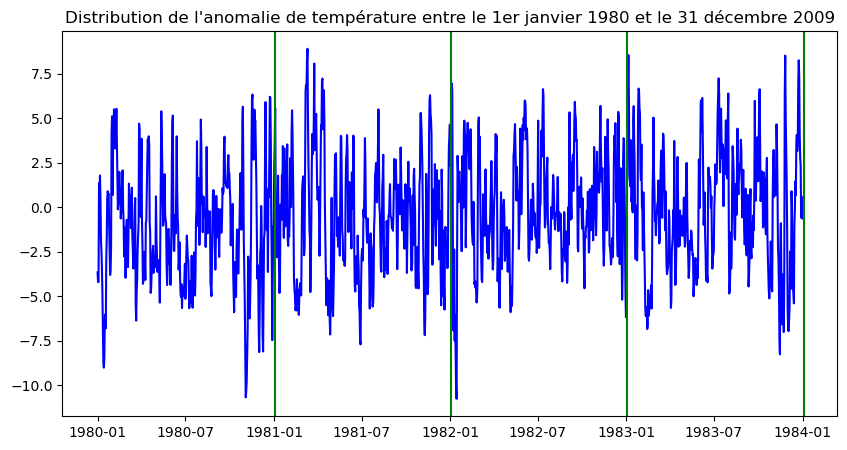

In [49]:
## Zoom sur 4 ans de la distribution de l'anomalie de température
df_80_83 = df[df.date.dt.year < 1984]

plt.plot(df_80_83.date, df_80_83['anomalie en t'], color = 'blue')

plt.axvline(x = 4020, color = 'green') #Du 01-01-1980 au 01-01-1981
plt.axvline(x = 4385, color = 'green') #Du 01-01-1981 au 01-01-1982
plt.axvline(x = 4750, color = 'green') #Du 01-01-1982 au 01-01-1983
plt.axvline(x = 5115, color = 'green') #Du 01-01-1983 au 01-01-1984

plt.title("Distribution de l'anomalie de température entre le 1er janvier 1980 et le 31 décembre 2009")

plt.show()

Text(0, 0.5, 'Anomalie (en °C)')

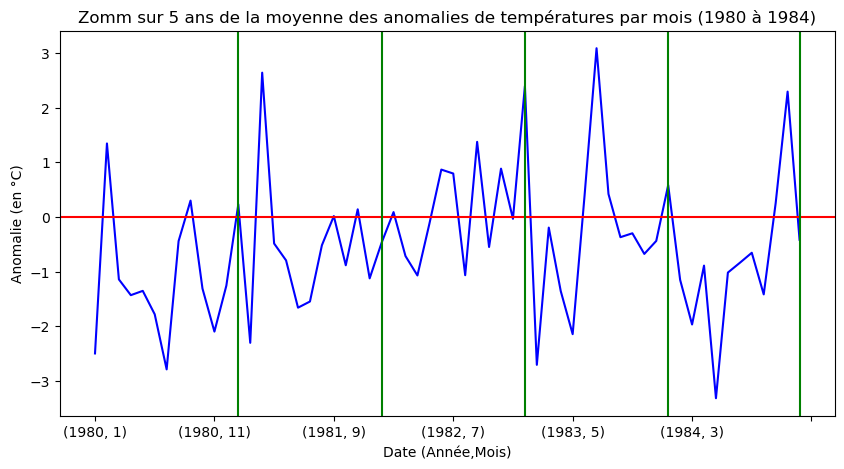

In [50]:
## Zoom sur 5 ans : Janvier 1980 - Décembre 1984

df_80_85 = df[(df['year'] < 1985)]

df3 = df_80_85.groupby([(df.date.dt.year), (df.date.dt.month)])['anomalie en t'].mean()

ax = df3.plot(color = 'blue', title = "Zomm sur 5 ans de la moyenne des anomalies de températures par mois (1980 à 1984)")
ax.axhline(0, color = 'red')
plt.axvline(x = 12, color = 'green')
plt.axvline(x = 24, color = 'green')
plt.axvline(x = 36, color = 'green')
plt.axvline(x = 48, color = 'green')
plt.axvline(x = 59, color = 'green')

ax.set_xlabel("Date (Année,Mois)")
ax.set_ylabel("Anomalie (en °C)")

Text(0, 0.5, 'Anomalie (en °C)')

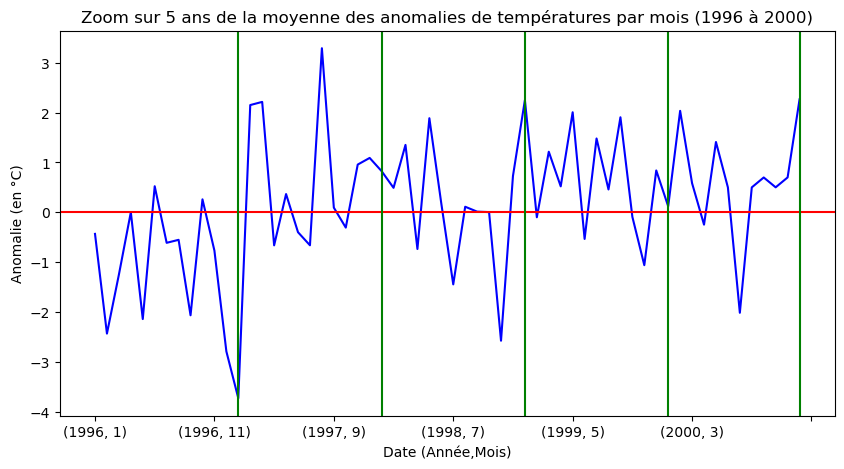

In [51]:
## Zoom sur 5 ans : Janvier 1996 - Décembre 2000

df_96_00 = df[(df['year'] < 2001) & (df['year'] > 1995)]

df4 = df_96_00.groupby([(df.date.dt.year), (df.date.dt.month)])['anomalie en t'].mean()

ax = df4.plot(color = 'blue', title = "Zoom sur 5 ans de la moyenne des anomalies de températures par mois (1996 à 2000)")
ax.axhline(0, color = 'red')
plt.axvline(x = 12, color = 'green')
plt.axvline(x = 24, color = 'green')
plt.axvline(x = 36, color = 'green')
plt.axvline(x = 48, color = 'green')
plt.axvline(x = 59, color = 'green')

ax.set_xlabel("Date (Année,Mois)")
ax.set_ylabel("Anomalie (en °C)")

**L'anomalie de température semble périodique, de période égale à 1 an (365 jours)**.\
L'anomalie de température semble être **centrée autour de 0**, ce qui confirme l'espérance très proche de 0 que nous avons obtenu au préalable.\
L'anomalie de tempéature semble être également périodique en ce que les mêmes mouvements se répètent chaque année. Le zoom sur 5 ans nous permet de le voir encore plus clairement. Ainsi, nous pouvons dire que l'anomalie de température apparaît **365-périodique** et ne semble pas être déterminée en fonction de l'année.\
Il reste alors un motif *déterministe* dans les anomalies. Or, l'objectif, lorsqu'on retire la *normale de saison* à la température obtenue, est de retirer le maximum d'information déterministe. **Nous n'avons donc pas retirer assez d'information**.

#### II.3.2.1. Distribution de l'anomalie de température jour par jour, pour tout année a

In [52]:
import scipy.stats as stats

In [53]:
df['anomalie en t'].std()

3.3336351216926245

On remarque immédiatement que **l'anomalie de température est très volatile** puisque son écart moyen à la moyenne est de -3°C ; +3°C.

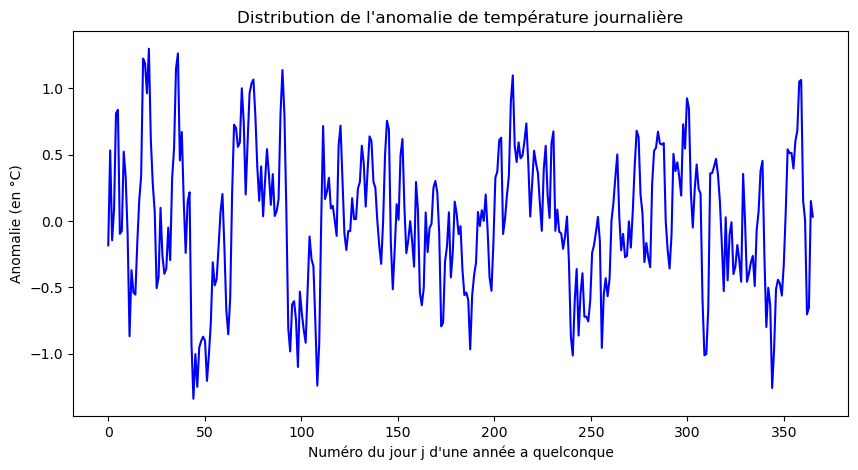

In [54]:
df_jour = df.groupby([df.day_number])['anomalie en t'].mean()

x = np.linspace(0,365, 365)
plt.plot(x, df_jour.values, label = "Distribution de l'anomalie", color = 'blue')

plt.title("Distribution de l'anomalie de température journalière")
plt.xlabel("Numéro du jour j d'une année a quelconque")
plt.ylabel("Anomalie (en °C)")

plt.show()

In [55]:
def nom_mois(i):
        if i == 1:
            nom_mois = 'janvier'
        if i == 2:
            nom_mois = 'février'
        if i == 3:
            nom_mois = 'mars'
        if i == 4:
            nom_mois = 'avril'
        if i == 5:
            nom_mois = 'mai'
        if i == 6:
            nom_mois = 'juin'
        if i == 7:
            nom_mois = 'juillet'
        if i == 8:
            nom_mois = 'août'
        if i == 9:
            nom_mois = 'septembre'
        if i == 10:
            nom_mois = 'octobre'
        if i == 11:
            nom_mois = 'novembre'
        if i == 12:
            nom_mois = 'décembre'
            
        return(nom_mois)

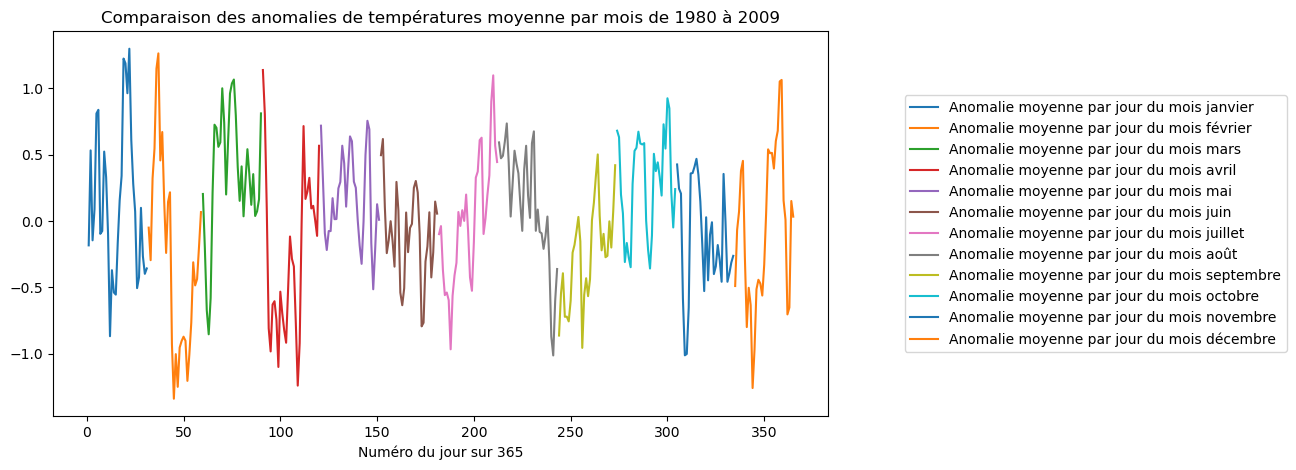

In [56]:
for i in range(12):
    a = df[df.date.dt.month == i+1]
    a_mean_day = a.groupby([a.day_number])['anomalie en t'].mean()
    a_mean_day.plot(label = 'Anomalie moyenne par jour du mois ' + nom_mois(i+1))

plt.xlabel('Numéro du jour sur 365')
plt.legend(loc = 'center right', bbox_to_anchor = (1.6, 0.5))
plt.title('Comparaison des anomalies de températures moyenne par mois de 1980 à 2009')
plt.show()

Les graphiques ci-dessus nous montrent que :
* **l'anomalie de température est fonction du temps et n'est pas stationnaire sur l'année**.
* **l'anomalie de température semble plus importante en été qu'en hiver, et semble similaire selon les mois / les trimestres**.

Nous allons vérifier cette similarité par trimestres et par mois. Nous observons que nous pouvons découper l'année selon la variation des anomalies de températures comme ce qui suit :
* hiver : janvier, février, mars, novembre, décembre (soit 1, 2, 3, 11, 12).
* printemps : avril, mai (soit 4, 5).
* été : juin, juillet, août (soit 6, 7, 8).
* automne : septembre, octobre (soit 9, 10).

#### II.3.2.2. Distribution de l'anomalie de température moyenne journalière mois par mois

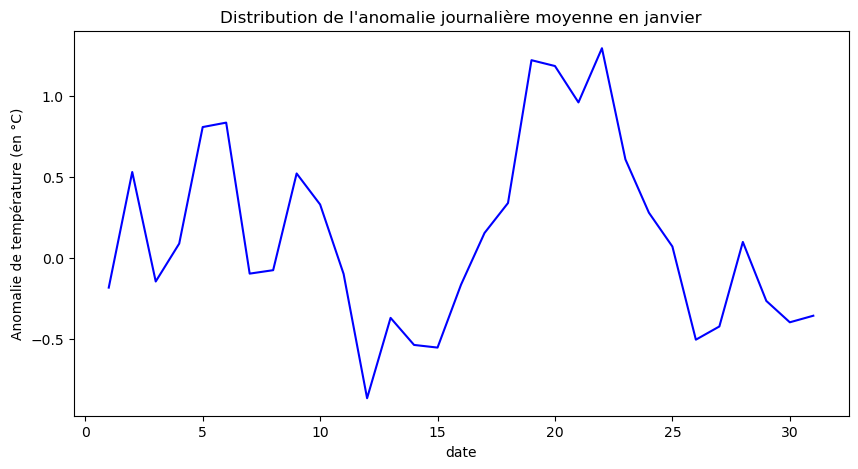

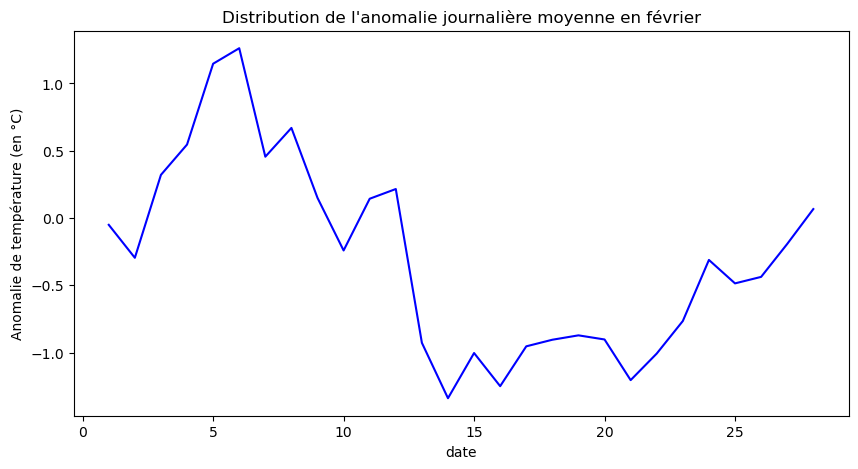

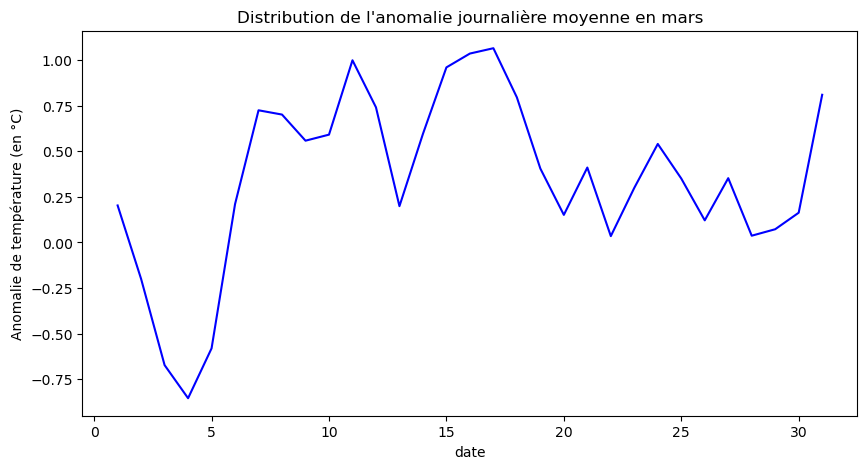

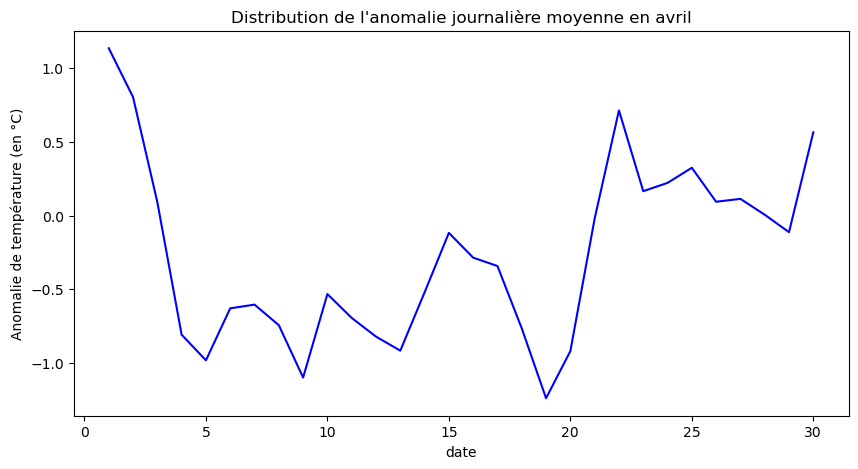

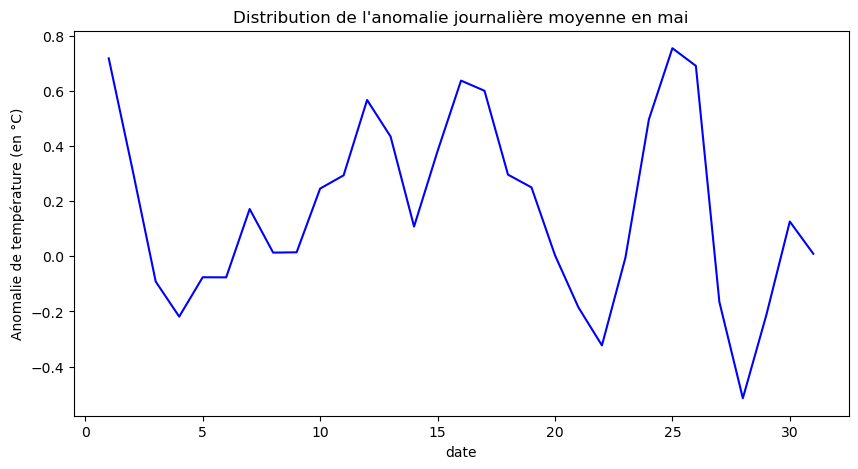

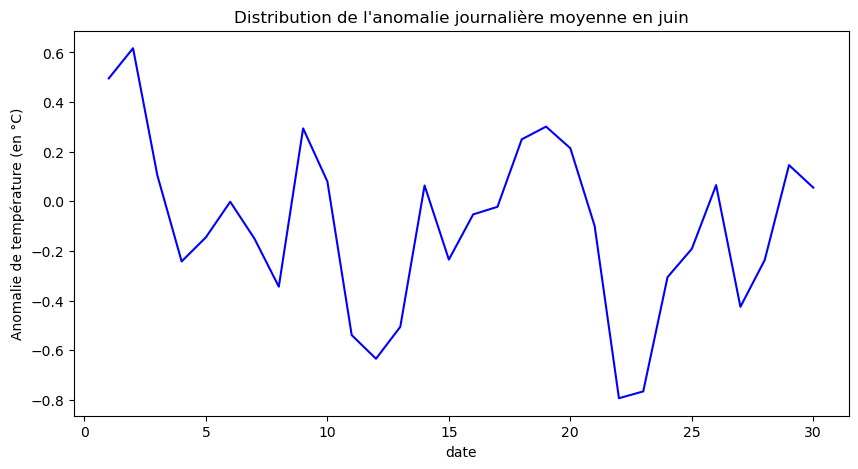

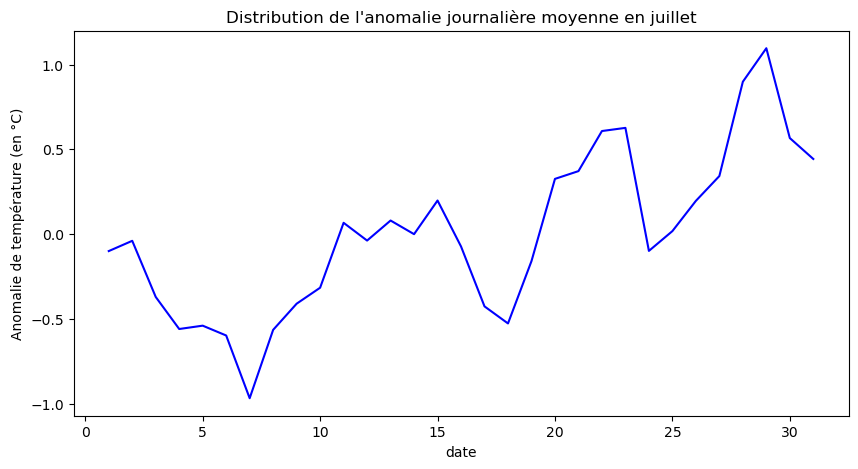

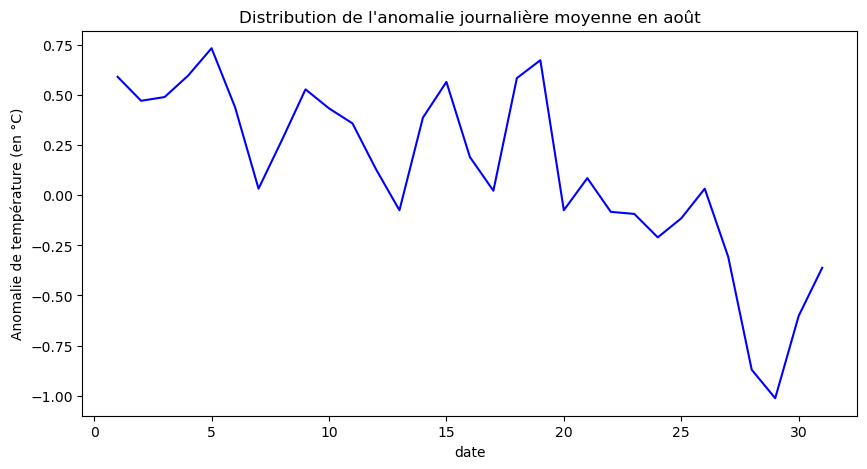

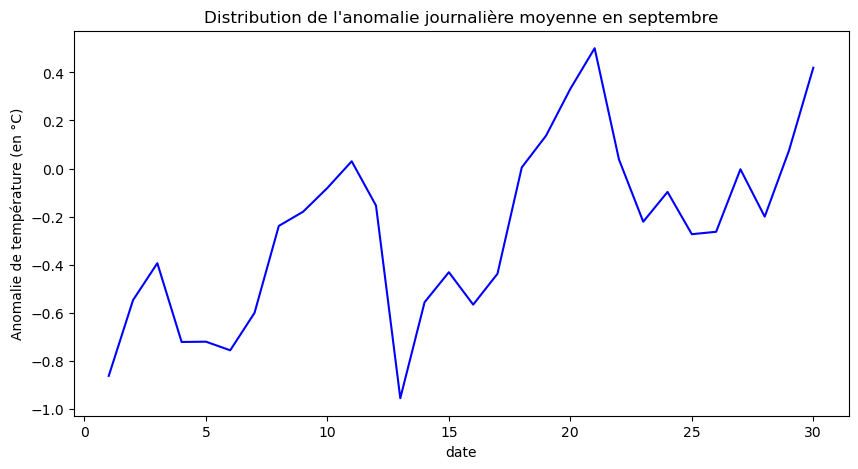

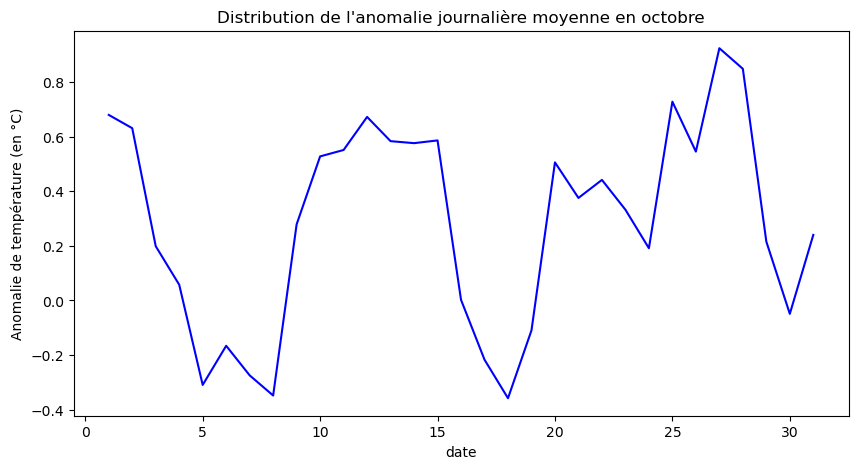

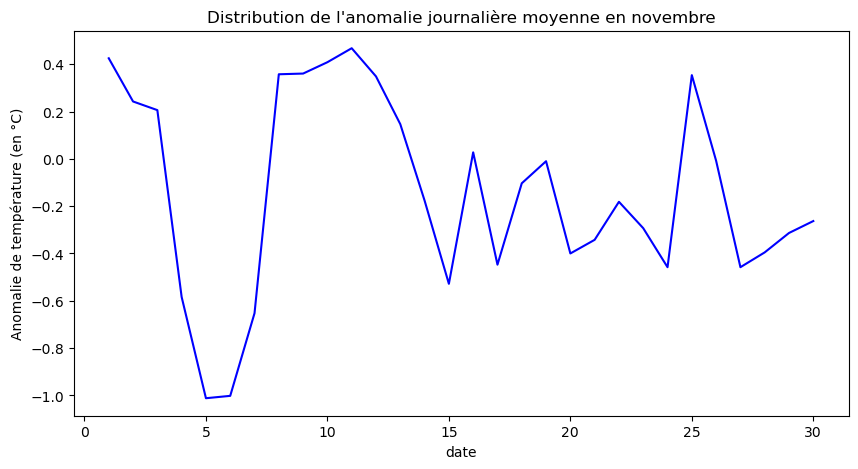

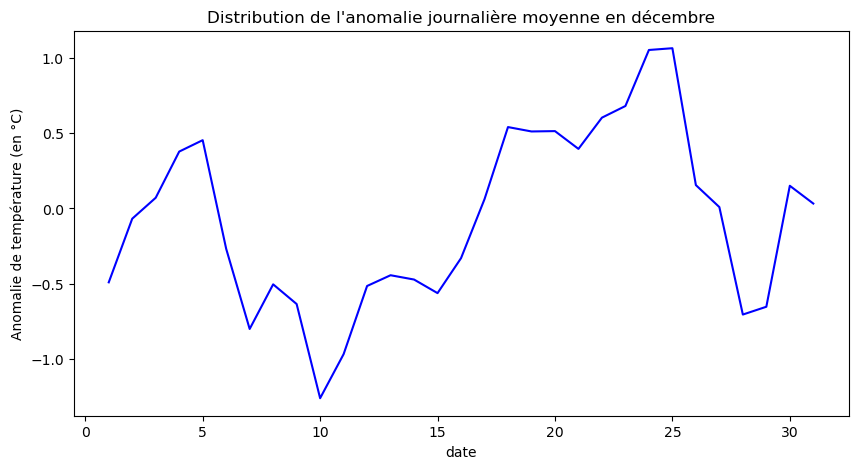

In [57]:
for i in range(12):
    a = df[df.date.dt.month == i+1]
    a_mean = a.groupby([a.date.dt.day])['anomalie en t'].mean()
    a_mean.plot(color = 'blue')
    
    plt.ylabel('Anomalie de température (en °C)')
    plt.title("Distribution de l'anomalie journalière moyenne en "+ nom_mois(i+1))
    plt.show()

Nous vérifierons la **stationnarité mensuelle des anomalies de température**.\
En effet, la stationnarité des anomalies de température est indispensable à la construction d'un modèle auto-régressif pour leur prédiciton par la suite. La vérifier est donc indispensable.


Pour vérifier la stationnarité mensuelle des anomalies de température, nous utiliserons la fonction `adfuller`qui réalise un test de Dickey-Fuller augmenté pour tester que les racines unitaires de nos données sont bien nulle. Plus précisement, nous réalisons le test :
<center> 
$ \mathbf{H_0} :$ La série comporte au moins une racine unitaire. || $\mathbf{H_1} :$ La série ne comporte pas racine unitaire. La série est stationnaire.

La fonction `adfuller` prendra ici comme argument les données de températures `df_mois['anomalie en t']` (où `mois`est à remplacer par le mois concerné) et le critère d'information d'Akaike `autolag = AIC` pour garantir l'utilisation d'un modèle qui s'ajuste le mieux à nos données.\
La fonction `adfuller` donne en sortie un vecteur contenant, notamment, la statistique de test utilisé pour conduire les test de Dickey-Fuller sur les racines unitaires, la p-value de ce test, et le nombre de données utilisées pour conduire ce test. 

C'est le deuxième coefficient de ce vecteur de sortie, la p-value, qui nous intéressera. En effet, si cette p-value est inférieure à 0.05, nous devrons rejeter, avec un niveau de confiance de 95%, l'hypothèse $\mathbf{H_0}$ et donc considérer l'hypothèse alternative $\mathbf{H_1}$.

In [58]:
from statsmodels.tsa.stattools import adfuller

for i in range(12):
    df_stationarityTest = adfuller(df[df.date.dt.month == i+1]['anomalie en t'], autolag='AIC')
    print("P-value de l'anomalie du mois de " + nom_mois(i+1) + " : ", df_stationarityTest[1])

P-value de l'anomalie du mois de janvier :  2.4262832010523982e-14
P-value de l'anomalie du mois de février :  1.877415332485163e-13
P-value de l'anomalie du mois de mars :  1.0276455334687085e-18
P-value de l'anomalie du mois de avril :  2.0128540538870175e-16
P-value de l'anomalie du mois de mai :  8.761525083128167e-20
P-value de l'anomalie du mois de juin :  4.292783986639921e-19
P-value de l'anomalie du mois de juillet :  2.127460309052891e-18
P-value de l'anomalie du mois de août :  8.017872649307585e-19
P-value de l'anomalie du mois de septembre :  2.7591622996795775e-11
P-value de l'anomalie du mois de octobre :  4.803504215130972e-16
P-value de l'anomalie du mois de novembre :  3.601129818545732e-18
P-value de l'anomalie du mois de décembre :  1.107774644699429e-17


Pour chaque mois, la p-value est largement inférieur à 0,0001. Nous pouvons donc **affirmer à un niveau de confiance de 99,9% que nos données de température sont belles et bien stationnaires mensuellement**.

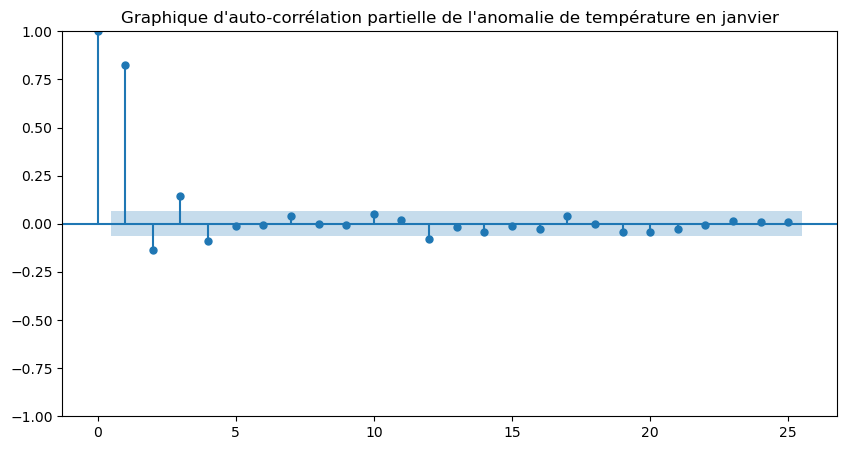

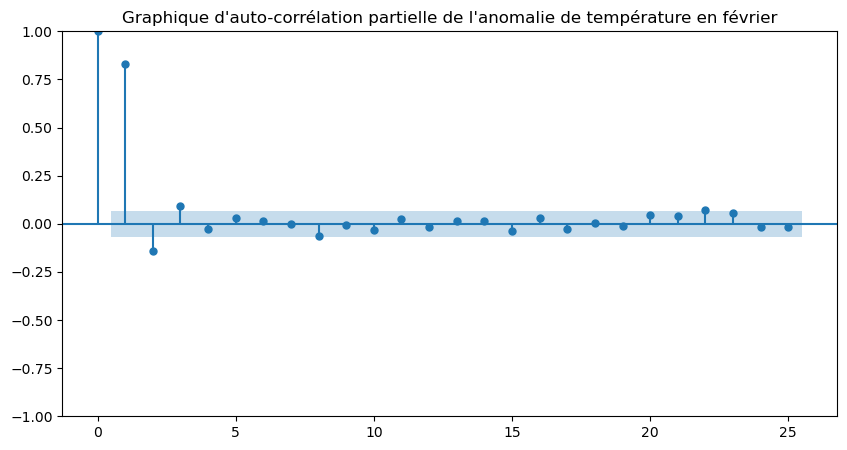

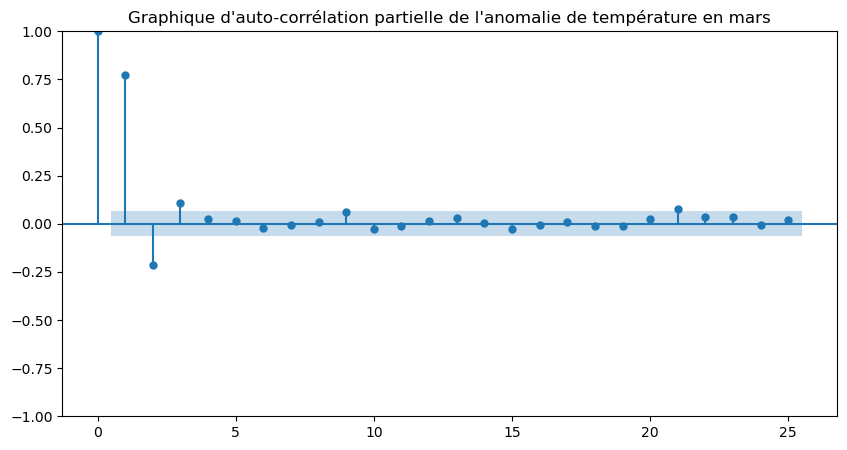

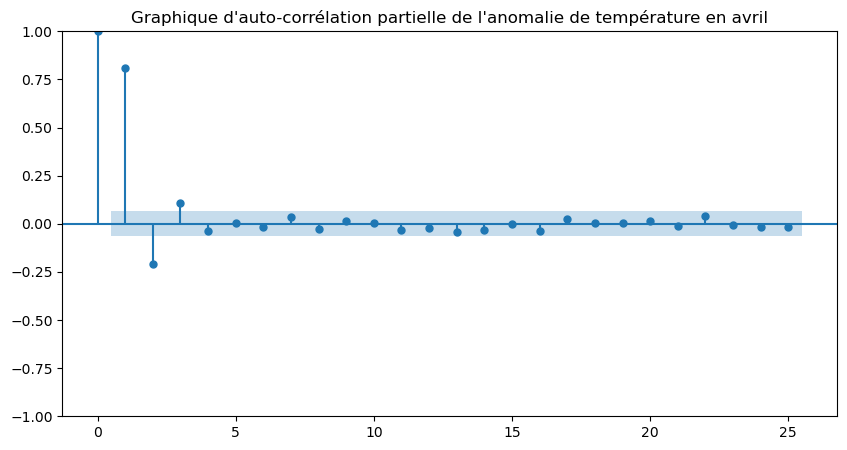

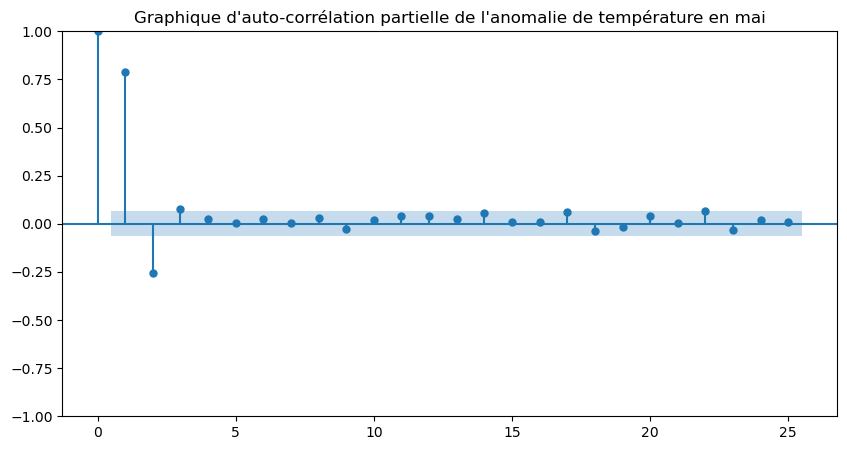

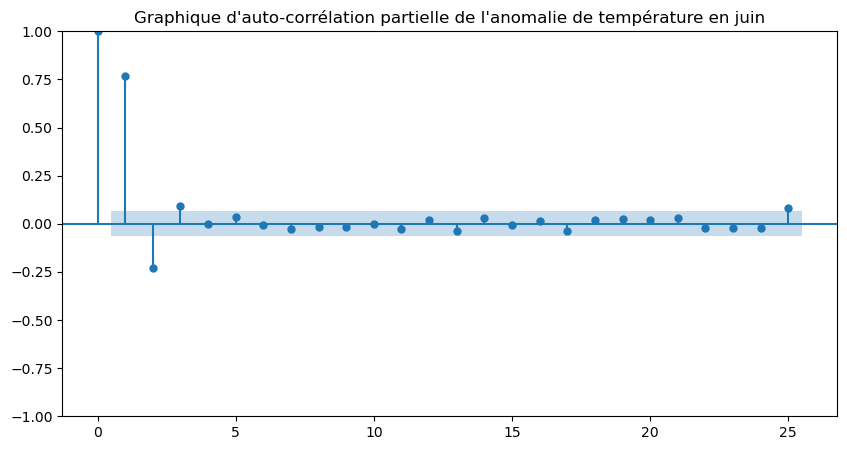

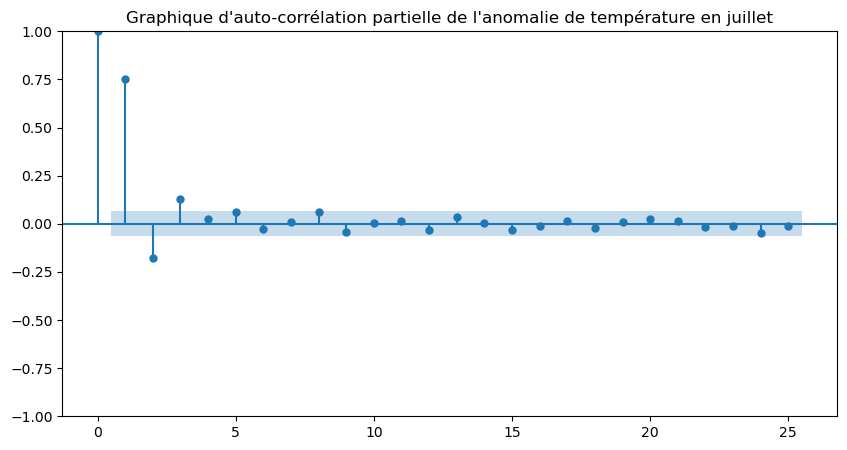

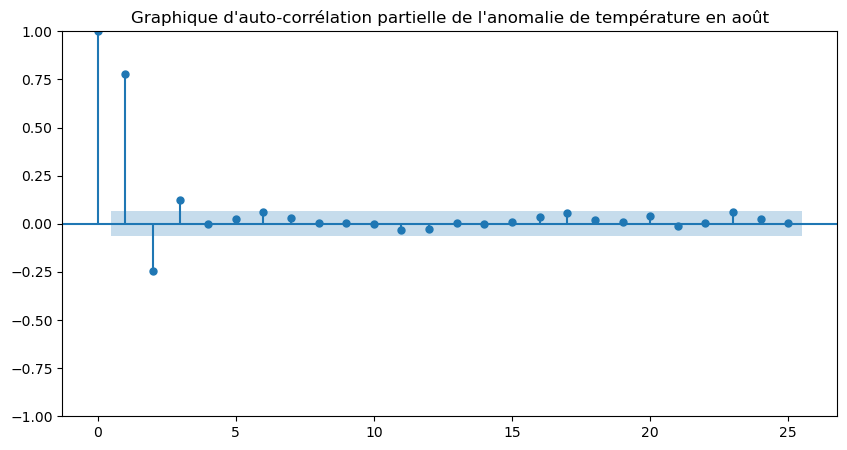

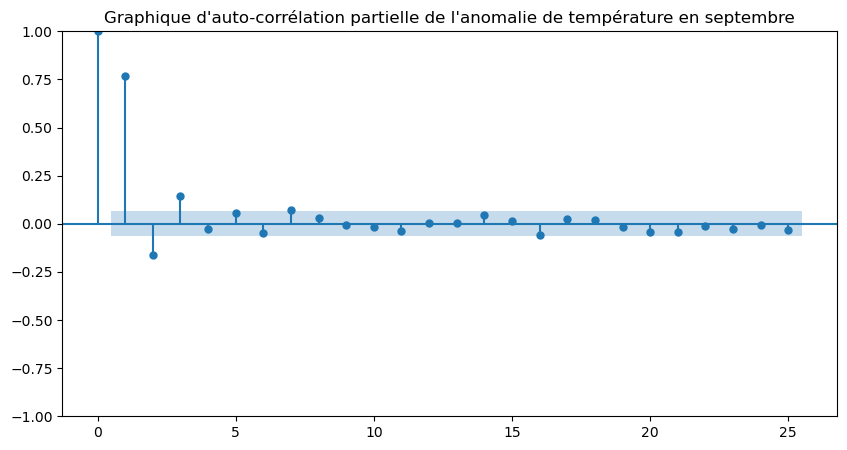

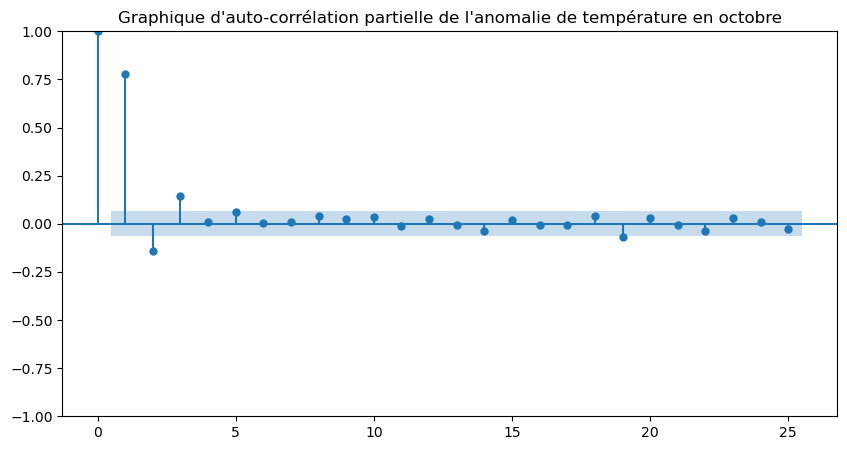

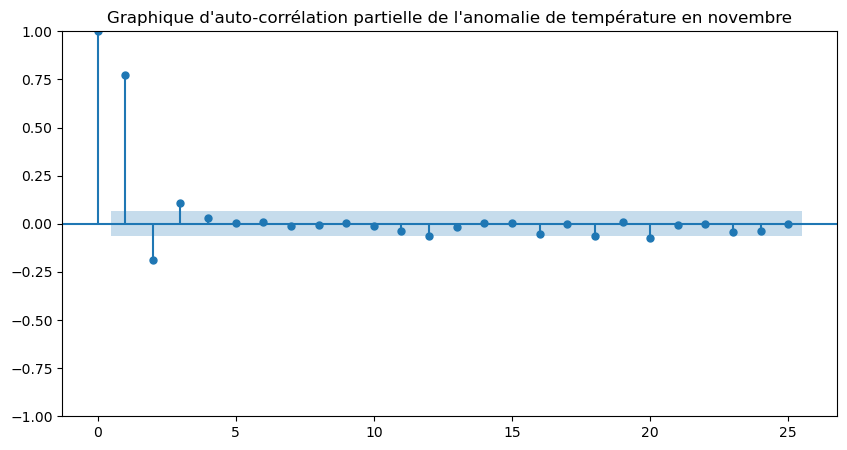

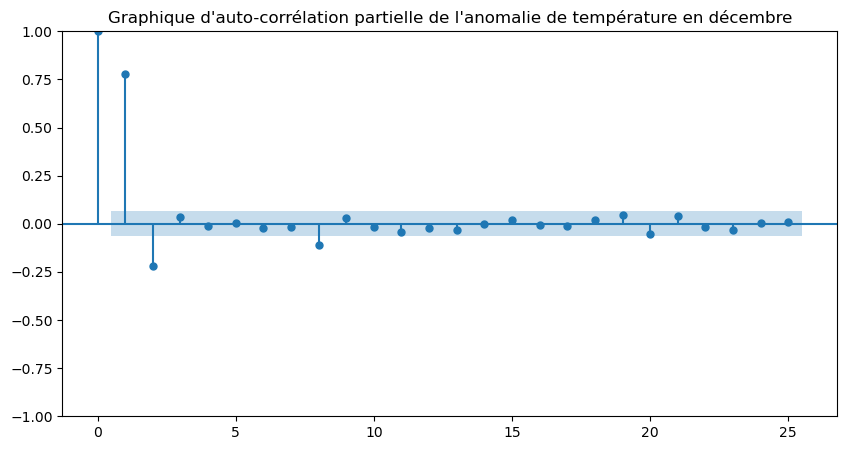

In [59]:
from statsmodels.graphics.tsaplots import plot_pacf
# Notons que pacf signifie "Partial AutoCorrelation function" soit fonction d'auto-corrélation partielle

for i in range(12):
    df_mois = df[df.date.dt.month == i+1]
    df_mois = df_mois.reset_index(drop=True)
    pacf = plot_pacf(df_mois['anomalie en t'], lags=25)
    plt.title("Graphique d'auto-corrélation partielle de l'anomalie de température en " + nom_mois(i+1))
    plt.show()

#### II.3.2.3. Distribution de l'anomalie de température journalière par saison

In [60]:
hiver = [1,2,3,11,12]
printemps = [4,5]
ete = [6,7,8]
automne = [9,10]

In [61]:
def nom_saison(saison):
    if saison == hiver:
        nom_saison = 'en hiver'
    if saison == printemps:
        nom_saison = 'au printemps'
    if saison == ete:
        nom_saison = 'en été'
    if saison == automne:
        nom_saison = 'en automne'
    return(nom_saison)

In [62]:
def anomalie_par_saison(saison):
    for i in saison:
        
        a = df[df.date.dt.month == i]
        a_mean = a.groupby([a.date.dt.day])['anomalie en t'].mean()
        a_mean.plot(label = 'Anomalie moyenne en '+nom_mois(i))

    plt.title("Distribution de l'anomalie journalière moyenne "+ nom_saison(saison))
    plt.legend(loc = 'center right', bbox_to_anchor = (1.4,0.5))
    plt.ylabel("Anomalie (en °C)")
        
    return(plt.show())

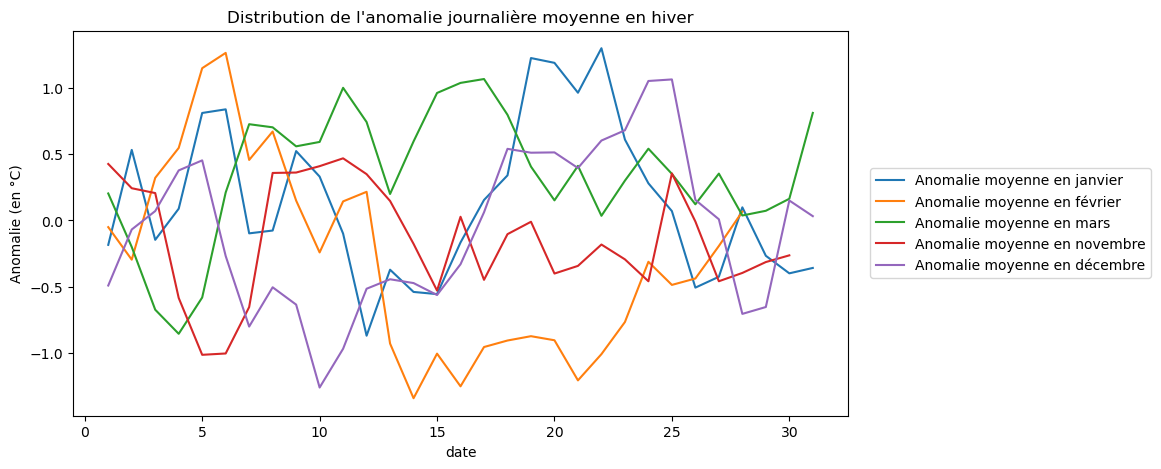

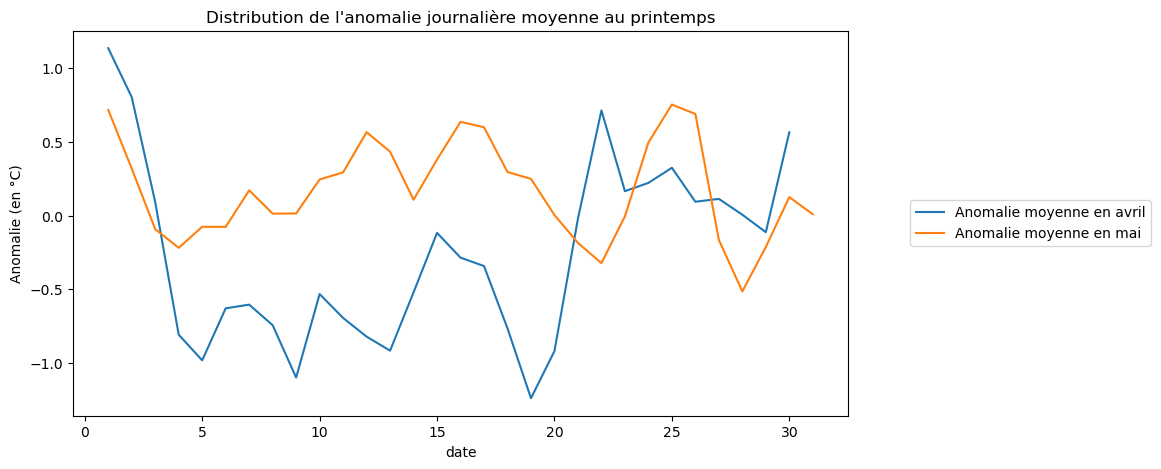

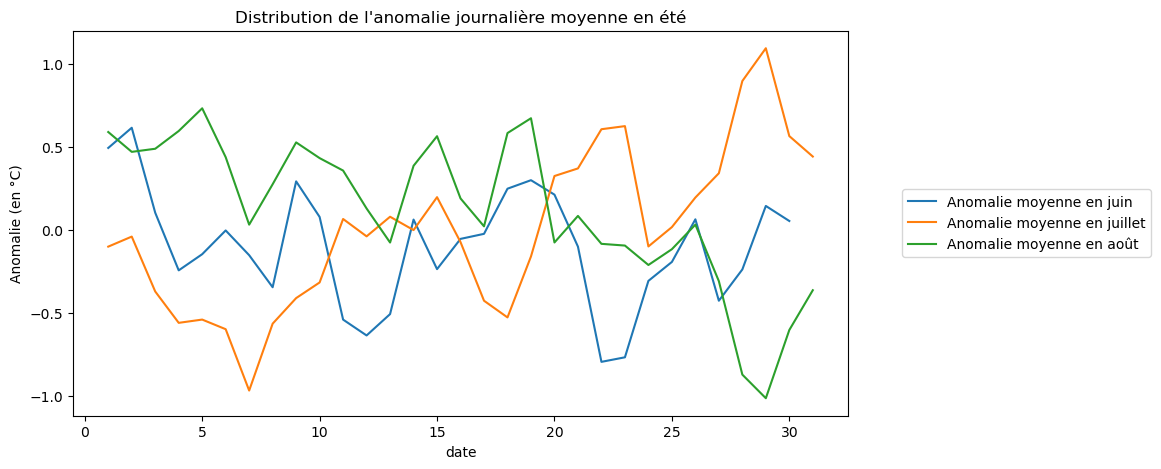

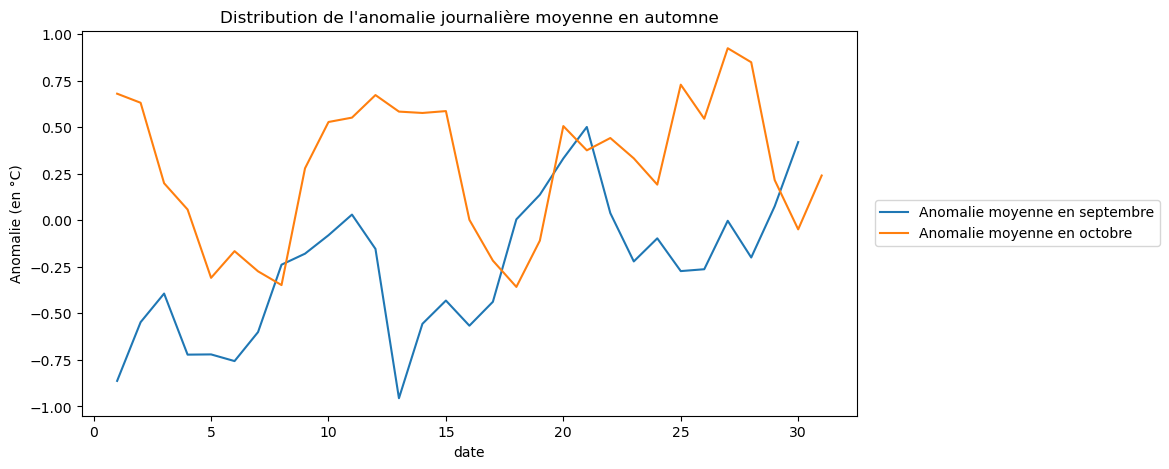

In [63]:
anomalie_par_saison(hiver)
anomalie_par_saison(printemps)
anomalie_par_saison(ete)
anomalie_par_saison(automne)

#### II.3.2.4. Conclusions de l'analyse de l'anomalie de température :

Dans cette partie, nous nous sommes intéressés aux températures journalières relevées par MétéoFrance entre le 1er janvier 1980 et le 31 décembre 2009.

**A FINIR UNE FOIS QU'ON A $S_j$**

Nous avons pu construire un modèle \
$$ X_{a,\,j} = S_j + A_{a,\,j}.$$

    
où :
- $X_{a,\,j}$ est la température du jour $j \in {1,...,365}$ de l'année $a \in {1980,...,2009}$.
- $S_j$ est la température moyenne du jour $j \in {1,...,365}$ sur les trente ans fournies.
- $A_{a,\,j}$ est l'anomalie de température au jour $j \in {1,...,365}$ de l'année $a \in {1980,...,2009}$, c'est-à-dire l'écart entre la température prélevée ce jour et la température théorique *(i.e la température moyenne au jour j)*.


Finalement, nous constatons que sur une période de 30 ans :
- l'espérance de l'anomalie est très proche de 0, ce qui **s'aligne avec la construction centrée de l'anomalie A**. 
- **la distribution des anomalies de températures est sensiblement la même chaque année, et donc considérée 365-périodique**
- l'anomalie de température semble **dépendre de la saison**,
- **l'anomalie de température mensuelle peut être assimilée à un processus stationnaire**, car la volatilité de l'anomalie de température est négligeable (de l'ordre de $e^{-16}$).

Grâce à ce travail, nous sommes prêts à commencer la construction du simulateur de températures.

----------------------------------------------------------------------------------------------------------------

## II.4. Simulateur de températures


Le modèle étant construit, nous sommes prêts à commencer la construction du simulateur de températures.\
Dans cette partie, nous allons utiliser les **méthodes de séries temporelles** afin de construire les modèles que suivent les températures et pouvoir, au final, générer les températures à venir et répondre à notre problématique : quand le froid 2% est-il le plus suceptible d'advenir ?

Nous construirons alors le simulateur en 2 parties :
1. Une première partie sera dédiée à la modélisation des anomalies de température par un modèle AR(1) sur chacun des mois.


2. Une seconde partie viendra "recoller les morceaux", c'est-à-dire faire en sorte de n'avoir qu'un seule simulateur au lieu d'un simulateur de température par saison, et que ce simulateur intègre la normale de saison (déterministe) et l'anomalie de température (stochastique) à chauqe date $t$.

A l'issue de cette partie, nous obtiendrons un **simulateur de températures qui pourra prédire plusieurs scénaris de températures**, ce qui nous mènera à pouvoir étudier le risque en température.

### II.4.1. Simulateur de l'anomalie de température : modèle auto-régressif

***Motivation***


Un modèle autorégressif (AR) est un modèle de série temporelle qui décrit comment les valeurs passées d'une variable particulière influencent sa valeur actuelle. En d'autres termes, un modèle AR tente de **prédire la valeur suivante d'une série en incorporant les valeurs passées les plus récentes et en les utilisant comme données d'entrée**. Les modèles autorégressifs reposent sur l'idée que les événements passés peuvent nous aider à prédire les événements futurs.


La modélisation autorégressive consiste à **former un modèle de régression sur la valeur de la variable de réponse elle-même**. Le terme autorégressif est composé des mots "Auto" et "Régressif" qui représentent la régression linéaire sur elle-même (auto).


Dans le contexte des simulations de températures, **la modélisation autorégressive consiste à créer un modèle dans lequel l'anomalie de température prédite pour une date $t$, $A_t$, dépend des anomalies de température précédentes $A_s$ tel que $s < t$ avec un décalage temporel constant prédéterminé, ici égal à une année (365 jours)** : il fait plus ou moins la même température au 1er janvier de chaque année, 2 janvier de chaque année,..., 31 décembre de chaque année, et les températures sont cohérentes (nous n'avons pas 35°C à Paris un 2 janvier).


L'utilisation d'un modèle auto-régressif est justifié par la **corrélation certaine entre la température à la date $t$ $X_t$ et la température à la date $t-1$ $X_{t-1}$** : les températures ne font pas un bon de 30°C entre aujourd'hui et demain.\
Egalement, soulignons que les températures dans un même mois ou d'une même saison sont plutôt homogènes. Il peut donc être intelligent de **construire un modèle auto-régressif pour chaque mois**.

A partir de l'historique de températures (et d'anomalies de température) construit préalablement, nous sommes alors en mesure de construire un modèle AR(1) de la forme :
$$
A_{t} = \alpha_m + \beta_m A_{t-1} +  \epsilon_m
$$
où :
* $t = (j,m,a)$ est la date $t$ décomposée au format jour $j$, mois $m$, année $a$.
* $\epsilon_m$ est le résidu de la régression et est stochastique.
* $\alpha_m$ et $\beta_m$ sont les coefficients de régression pour chaque mois $m \in {1, ..., 12}$ et sont déterministes.

*Quelle est notre démarche?*

**1.** Nous créons une **copie de notre historique de températures** `df` afin de pouvoir manipuler les données sans risquer de les perdre définitivement, et nous ajoutons à ce nouveau dataframe une **colonne `anomalie en t-1`** qui est un simple shift de l'anomalie de température en t `anomalie en t` de 1. Cela signifie que par exemple, au 2 janvier 1980, la colonne anomalie en t contient l'anomalie de température du 2 janvier 1980 et la colonne anomalie de température en t-1 contient l'anomalie de température du 1er janvier 1980. On remarque qu'un `NaN`apparaîtra au 1er janvier 1980. On pourra retirer cette unique ligne sans préoccupation puisqu'il s'agit d'une observation parmi 31 jours observés sur 30 ans pour le mois de janvier (soit 1 parmi 930 observations). Cette manipulation va nous permettre d'**effectuer la régression de $A_{t-1}$ sur $A_t$** et donc d'**obtenir les coefficients de régression recherchés**.


**2.** Nous créons la **liste des coefficients $\beta_m$** en effectuant, mois par mois, la **régression linéaire** de l'anomalie en t sur l'anomalie en t-1. Nous créons par la même la **liste des résidus $\epsilon_t$** de chaque régression de l'anomalie en t sur l'anomalie en t_1. On obtient alors une liste de de $365 \times N$ résidus possibles, où $N$ est le nombre d'années simulées.

**3.** Nous créons une **liste `nb_jours` qui donne le nombre de jour contenu dans chaque mois**. Par exemple, `nb_jours[0]` donne 31 car il y a bien 31 jours en janvier. On considérera que pour tous les mois de février sont à 28 jours pour les mêmes raisons évoquées pour le retrait des 29 févriers.

**4.** Nous créons une matrice qui va **stocker toutes les anomalies de température prédites par régression linéaire de $A_{t-1}$ sur $A_t$ avec les coefficients et les résidus définis en étape 2**. 

**5.** Nous proposons enfin une **représentation graphique** des anomalies de températures simulées sur 2 années.

**Pour mieux comprendre la matrice formée pendant la quatrième étape**, notons que :
* chaque colonne de la matrice représente un scénario (par exemple, N = 2 simule deux scénari de température). 
* chauque ligne de la matrice représente, elle, le jour (par exemple, i = 2 pour le 2 janvier). 
* chaque coefficient est égale à l'anomalie de température prédite sous le mode $A_t = \beta_m \times A_{t-1} + \epsilon_m$.

**Pour la compréhension de ce que représente chaque coefficient matriciel**, soulignons que :
* Le coefficient $(i,j)$ de la matrice représente l'anomalie au jour i ($i \in {1, ..., 365})$ du scénario ($j \in {1, ..., N}$).
* Le coefficient $(i-1,j)$ de la matrice représente l'anomalie température de la veille.
* Les premiers coefficients de chaque colonne $2 \leq j$, c'est-à-dire chaque premier janvier, sera simulé grâce au coefficient $(365,j-1)$.
* Le premier coefficient de la première colonne, c'est-à-dire le premier janvier de la simulation, ne peut lui être simulé par une valeur antérieur. En conséquence, on attribue la valeur 0 à l'anomalie de la veille ($A_{0}$ = 0) ce qui peut être justifié par le fait que l'anomalie est centrée par construction, et attribué sa valeur espérée lorsque la donnée est inconnue paraît assez cohérant.


Ajoutons que **les coefficients $\beta_m$ sont soigneusement attribué à chauque date $t$**. Par exemple, les 31 jours de janvier sont tous simulés avec les valeurs $\beta_1$.

Enfin, **les résidus, $\epsilon_m$ sont tirés aléatoirement dans la liste de $365 \times N$ valeurs de résidus** crée en étape 2 et ajoutés dans la prédiction.

In [64]:
# Etape 1 : copie du df et ajout de l'anomalie de température en t-1

X = df.copy()

X['anomalie en t-1'] = X['anomalie en t'].shift(1)
X.dropna(axis = 0, inplace = True)
X['mois']=[u.month for u in X.date]

X.head()

date      temp  year  day_number  day_mean_temp  t  normale saison   
1 1980-01-02 -0.363261  1980           2       4.369727  1        3.838604  \
2 1980-01-03 -0.390026  1980           3       3.670631  2        3.816601   
3 1980-01-04  5.142656  1980           4       3.884985  3        3.796550   
4 1980-01-05  4.560850  1980           5       4.587571  4        3.778447   
5 1980-01-06  5.544065  1980           6       4.598839  5        3.762287   

   anomalie en t  anomalie en t-1  mois  
1      -4.201864        -3.667656     1  
2      -4.206627        -4.201864     1  
3       1.346106        -4.206627     1  
4       0.782403         1.346106     1  
5       1.781778         0.782403     1

In [65]:
## Etape 2 : liste des coefficients Beta_m pour chaque mois m entre 1 et 12

#Liste de 12 éléments égaux à 0 pour l'instant
Beta=[0]*12
Res=[0]*12

for mois in range(12):
    
    #Sélection des données mois par mois
    X_loc = X[X.mois==(mois+1)]
    
    #Régression de l'anomalie en t sur l'anomalie en t-1
    Y = np.array(X_loc['anomalie en t-1']).reshape(-1,1)
    x = X_loc['anomalie en t']
    reg_ano=None
    reg_ano=lm(fit_intercept=False).fit(Y, x)
    
    #Coefficient Beta_m et Résidu Epsilon_m pour le mois m=mois
    Beta[mois]=reg_ano.coef_[0]
    Res[mois]= list(x - reg_ano.predict(Y))
    
print('Liste des coefficients de régression Beta_m :', Beta)

Liste des coefficients de régression Beta_m : [0.8456874929352376, 0.859578642081996, 0.8040129823464731, 0.8264771449282927, 0.8126945069005477, 0.8049691736771238, 0.7798664471872799, 0.7956313766786474, 0.7713550851843418, 0.8040176708165917, 0.8076322804672478, 0.8096894737486541]


In [66]:
##Etape 3 : Création de la liste qui donne le nombre de jour par mois

import datetime

## dates_th donne toutes les dates entre le 1er janvier 2201 et le 31 décembre 2201
dates_th = pd.date_range(start=datetime.datetime(2201,1,1),end = datetime.datetime(2201,12,31))

## Z est un dataframe qui prend comme index les dates données par dates_th => len(Z) = 365
Z=pd.DataFrame(index=dates_th)

## Création de la colonne de constante remplie de 1
Z['un']=1

## Création de la colonne qui donne explicitement le mois de chaque date t donnée en index
Z['mois']=[u.month for u in Z.index]

## Création de la liste donnant le nombre de jour par mois
nb_jours=Z.groupby('mois').sum()['un']
nb_jours=list(nb_jours)
print('Liste du nombre de jours par mois : ', nb_jours)

## Suppression des colonnes inutiles dans Z maintenant que l'on a récupéré le nombre de jour dans chaque mois
Z.drop('un', axis=1, inplace=True)
Z.drop('mois', axis=1, inplace=True)


Z.head()

Liste du nombre de jours par mois :  [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]


Empty DataFrame
Columns: []
Index: [2201-01-01 00:00:00, 2201-01-02 00:00:00, 2201-01-03 00:00:00, 2201-01-04 00:00:00, 2201-01-05 00:00:00]

In [67]:
## Création d'une matrice remplie de zéros de 365 lignes et N colonnes ? Mais ça sert à quoi ce bloc?

Z_array=z=np.zeros((sum(nb_jours),N))
Z_array=2

In [68]:
## Etape 4 : création de la matrice stockant les prédicitons des anomalies de température

import random

N=10

## Création d'une matrice remplie de zéros de 365 lignes et N colonnes
Z_array=z=np.zeros((sum(nb_jours),N))
## Initialisation de la première anomalie de température x_0 à 0
x_0=0

## Tous les coefficients de la matrice prennent pour valeur -9999
for i in range(sum(nb_jours)):
    for j in range(N):
        Z_array[i,j]=-9999

## On simule N année, chaque colonne correspondant à une année de 365 jours.
for n in range(N):
    ## Initialisation de l'index à 0
    idx=0
    
    ## Association des bons coefficients de régression à chaque date
    for m in range(12):
        ## Le coefficient beta prend la valeur beta_m correspond à son mois
        beta=Beta[m]
        ## Le coefficient residus prend la valeur epsilon_m correspond à son mois
        residus=Res[m]
        ## Le nb_j prend la valeur du nombre de jours contenu dans son mois
        nb_j=nb_jours[m]
        
        ## Pour chaque jour dans le mois, la température prédite vaut température de la veille * beta + résidu
        for i in range(nb_j):
            x_1 = x_0*beta + random.sample(residus,k=1)
            Z_array[idx,n] = x_1[0]
            idx+=1
            x_0 = x_1
        

## On met les dates en index et on retourne le dateframe des anomalies de température simulées
idx = Z.index
Z = pd.DataFrame(Z_array)
Z.index = idx

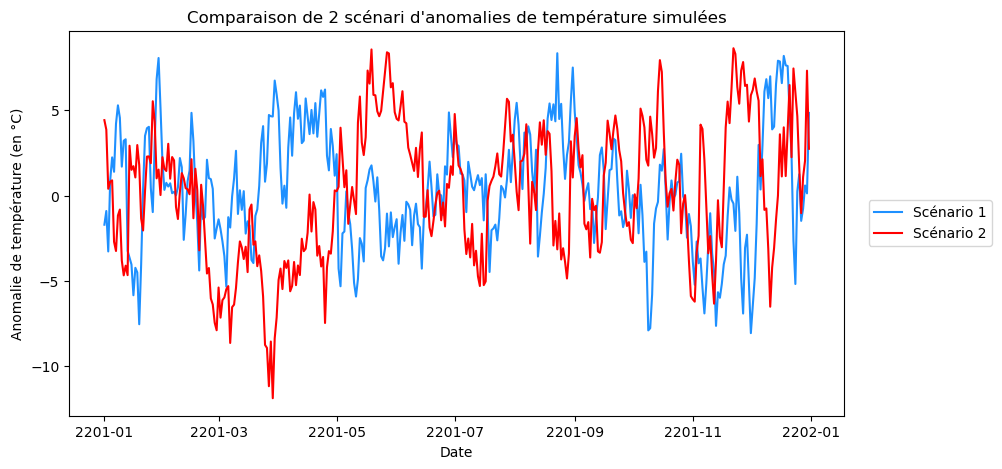

In [69]:
## Etape 5 : Représentation graphique sur 2 années simulées

plt.plot(Z.iloc[:,1],color='dodgerblue', label = 'Scénario 1')
plt.plot(Z.iloc[:,2],color='red', label = 'Scénario 2')

plt.title("Comparaison de 2 scénari d'anomalies de température simulées")
plt.xlabel('Date')
plt.ylabel('Anomalie de température (en °C)')

plt.legend(loc = 'center right', bbox_to_anchor = (1.2, 0.5))
plt.show()

Nous avons bel et bien réussi à simuler une anomalie de température stochastique donnant différent scénari possible à une même date donnée.\
Nous allons maintenant pouvoir ajouter cette anomalie de température simulée à la normale de saison détemriniste donnée préalablement et donc finir le simulateur de température.

### II.4.2 Simulateur de températures

Les étapes précédentes nous ont permis de construire un modèle :
$$ X_{t} = S_t + A_{t}$$
où :
- $t$ est la date d'entrée pouvant être décomposée comme $(j, m, a)$ pour le format jour, mois, année.
- $X_t$ est la température à la date $t$, ce que l'on cherche à prédire.
- $S_t$ est la normale de saison donnée au jour $j$ du mois $m$ de cette date. $S_t$ est donnée par la fonction $f$ définie préalablement par régression linéaire et séries de Fourier.
- $A_t$ est l'anomalie de température à la date $t$, c'est-à-dire l'écart à la normale de saison. Elle est modélisée par un modèle AR(1) tel que donné précédemment.

Tous les éléments ont été définis précédemment. Nous pouvons donc désormais construire notre simulateur de température.

*Quelle est notre démarche ?*

1. Nous créons une fonction `simu_anomalie` qui prend en entrée un nombre N de scenari de température souhaités, une date de début et une date de fin de la simulation (quand veut-on que commence et s'arrête la prédicition ?) et permet de sortir N scenari d'anomalies de températures simulées telles que définies dans la partie précédente.


2. Nous définissons ensuite la fonction `simulateur` qui prend en entrée un nombre N de scenari de température souhaités, une date de début et une date de fin de la simulation, et permet de sortir N scenari de températures prédites pour chaque date $t$ comprise entre les bornes temporelles. Cette fonction est simplement la somme du terme déterministe de la normale de saison obtenu par la fonction $f$ avec le terme stochastique de l'anomalie de température obtenu par la fonction `simu_anomalie`.


3. Nous lançons nos simulations sur la période 1er janvier 1980 - 31 décembre 2009 pour les comparer avec les données empiriques.

In [70]:
# Etape 1 : Simulateur de l'anomalie de température sous forme fonctionnelle

def simu_anomalie(nombre_scenari, start_year, start_month, start_day , end_year, end_month, end_day):
    dates_th = pd.date_range(start = datetime.datetime(start_year, start_month, start_day), 
                             end = datetime.datetime(end_year, end_month, end_day))
    dates_th = dates_th[dates_th.strftime('%m-%d') != '02-29']
    
    Z=pd.DataFrame(index=dates_th)
    
    Z['un'] = 1
    Z['mois'] = [u.month for u in Z.index]
    nb_jours = Z.groupby('mois').sum()['un']
    nb_jours = list(nb_jours)
    Z.drop('un', axis=1, inplace=True)
    Z.drop('mois', axis=1, inplace=True)
    
    Z_array=z=np.zeros((sum(nb_jours),nombre_scenari))
    x_0=0
    
    for i in range(sum(nb_jours)):
        for j in range(nombre_scenari):
            Z_array[i,j]=-9999
    
    for n in range(nombre_scenari):
        idx=0
        for m in range(12):
            beta=Beta[m]
            residus=Res[m]
            nb_j=nb_jours[m]
        
            for i in range(nb_j):
                x_1 = x_0*beta + random.sample(residus,k=1)
                Z_array[idx,n] = x_1[0]
                idx+=1
                x_0 = x_1
    idx = Z.index
    Z = pd.DataFrame(Z_array)
    Z.index = idx
    return(Z)

In [71]:
simu_anomalie(4,1980,1,1,2009,12,31)

0         1         2         3
1980-01-01 -1.105106  1.647050 -2.888244 -1.964076
1980-01-02  1.011599  8.262256  0.506613 -2.255877
1980-01-03  0.395697  6.893189  0.988890 -2.612128
1980-01-04  3.996229  1.797550  1.029078 -3.314150
1980-01-05  4.144483  1.118362  0.864370 -3.888931
...              ...       ...       ...       ...
2009-12-27 -0.864475 -1.592061 -1.394385  1.748071
2009-12-28  0.953550 -0.980252  3.333055  3.116316
2009-12-29  1.819487 -3.053019  3.867013  0.932105
2009-12-30  0.891096 -2.160312 -0.896889 -1.691047
2009-12-31 -0.459955 -5.281503 -1.437530 -4.067135

[10950 rows x 4 columns]

In [72]:
from datetime import date

In [73]:
# Etape 2 : Simulateur de température

def simulateur(nombre_scenari, start_year, start_month, start_day , end_year, end_month, end_day):
    
    Z = simu_anomalie(nombre_scenari, start_year, start_month, start_day , end_year, end_month, end_day)
    
    Z['date'] = Z.index
    Z['date'] = pd.to_datetime(Z['date'])
    Z = Z[(Z.date.dt.month != 2) | (Z.date.dt.day != 29)]
    Z['day_number'] = 0
    Z['normale saison'] = 0
    for i in range(len(Z)):
        month = Z.date.dt.month[i]
        day = Z.date.dt.day[i]
        days = [0,31,59,90,120,151,181,212,243,273,304,334,365]
        Z['day_number'][i] = days[month -1] + day
        Z['normale saison'][i] = normale_saison(Z['day_number'][i])
    
    for i in range(nombre_scenari):
        Z.iloc[:,i] = Z.iloc[:,i] + Z['normale saison']
        
    Z.drop('normale saison', axis = 1, inplace = True)
    Z.drop('date', axis = 1, inplace = True)
    Z.drop('day_number', axis = 1, inplace = True)
    
    return(Z)

In [74]:
# Etape 3 : Simulation sur la période 01/01/1980 - 31/12/2009 et comparaison avec les données empiriques

anomalies_simu = simu_anomalie(4,1980,1,1,2009,12,31)
anomalies_simu['théorie'] = df['anomalie en t'].values
anomalies_simu

0         1          2         3   théorie
1980-01-01  4.732870 -1.635042  -0.745075  7.866009 -3.667656
1980-01-02 -0.634145 -4.141880   3.133626  6.223978 -4.201864
1980-01-03 -0.505389 -7.736575   3.770177  3.361632 -4.206627
1980-01-04 -0.676541 -8.213085   3.217227  1.958987  1.346106
1980-01-05 -0.782163 -8.463985   7.480618  4.264484  0.782403
...              ...       ...        ...       ...       ...
2009-12-27 -5.585927  3.446438   3.148767  4.413497  0.968717
2009-12-28 -7.290806  5.218402   3.963157  1.266477 -1.160527
2009-12-29 -2.676991  5.623466   3.585330  4.128839  4.238144
2009-12-30 -1.171632  2.253210   8.573517  0.765228  5.708240
2009-12-31 -1.016876  0.393347  11.020750  2.034986  3.402832

[10950 rows x 5 columns]

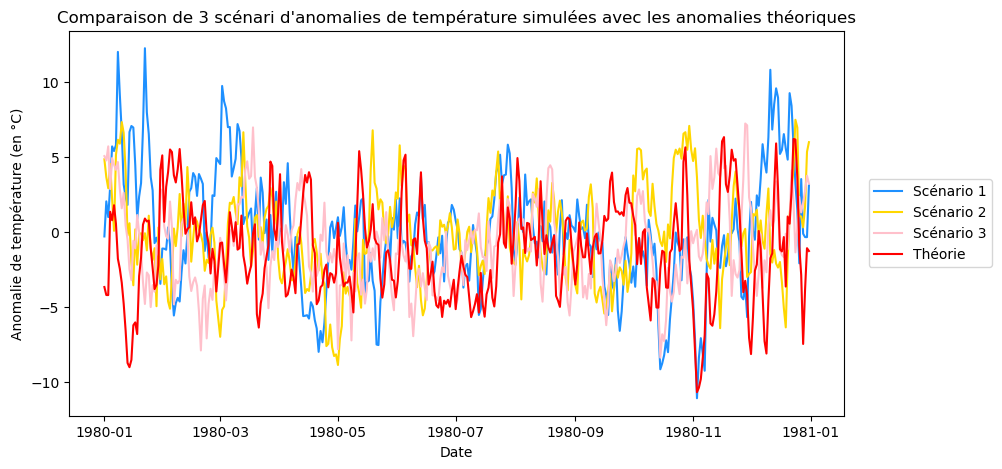

In [75]:
## Zoom sur 1 ans

anomalies_simu = simu_anomalie(4,1980,1,1,1980,12,31)
plt.plot(anomalies_simu.iloc[:,1],color='dodgerblue', label = 'Scénario 1')
plt.plot(anomalies_simu.iloc[:,2],color='gold', label = 'Scénario 2')
plt.plot(anomalies_simu.iloc[:,3],color='pink', label = 'Scénario 3')

df_80 = df[df.date.dt.year == 1980]
plt.plot(df_80['date'], df_80['anomalie en t'], color = 'red', label = 'Théorie')

plt.title("Comparaison de 3 scénari d'anomalies de température simulées avec les anomalies théoriques")
plt.xlabel('Date')
plt.ylabel('Anomalie de température (en °C)')

plt.legend(loc = 'center right', bbox_to_anchor = (1.2, 0.5))
plt.show()

**Les anomalies de températures simulées miment très bien la réalité, au point où on ne sait plus quelle était l'anomalie prélevée dans la réalité et l'anomalie de température simulée par notre simulateur.**

In [76]:
simu = simulateur(4,1980,1,1,2009,12,31)
simu

0          1          2          3
1980-01-01  3.619927   2.387623   4.738986   8.327138
1980-01-02  5.612194   0.203906   4.521465   4.149507
1980-01-03  2.712831   1.037301   4.965389   1.692169
1980-01-04  4.319036   3.682130   1.638378   5.877503
1980-01-05  2.792590   5.745972   1.984207   6.298677
...              ...        ...        ...        ...
2009-12-27 -1.225110  10.932364   9.410742   7.792752
2009-12-28 -2.223087  12.921600   8.440178  11.566713
2009-12-29  5.750443  10.943774  10.008897  13.430767
2009-12-30  6.335677   8.104766   7.036984  12.494790
2009-12-31  2.769211   3.300240   4.752592  12.544716

[10950 rows x 4 columns]

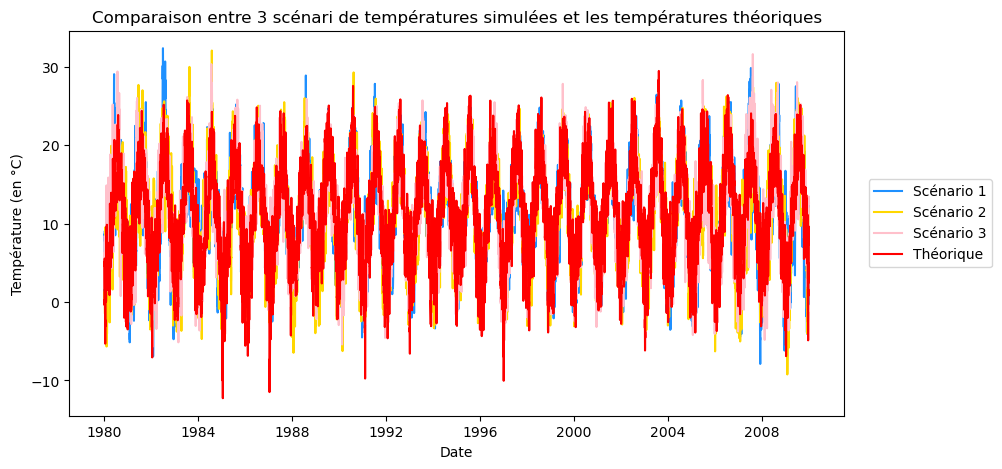

In [77]:
plt.plot(simu.iloc[:,1],color='dodgerblue', label = 'Scénario 1')
plt.plot(simu.iloc[:,2],color='gold', label = 'Scénario 2')
plt.plot(simu.iloc[:,3],color='pink', label = 'Scénario 3')

plt.plot(df['date'], df['temp'], color = 'red', label = 'Théorique')

plt.legend(loc = 'center right',bbox_to_anchor = (1.2, 0.5))
plt.title('Comparaison entre 3 scénari de températures simulées et les températures théoriques')
plt.xlabel('Date')
plt.ylabel('Température (en °C)')

plt.show()

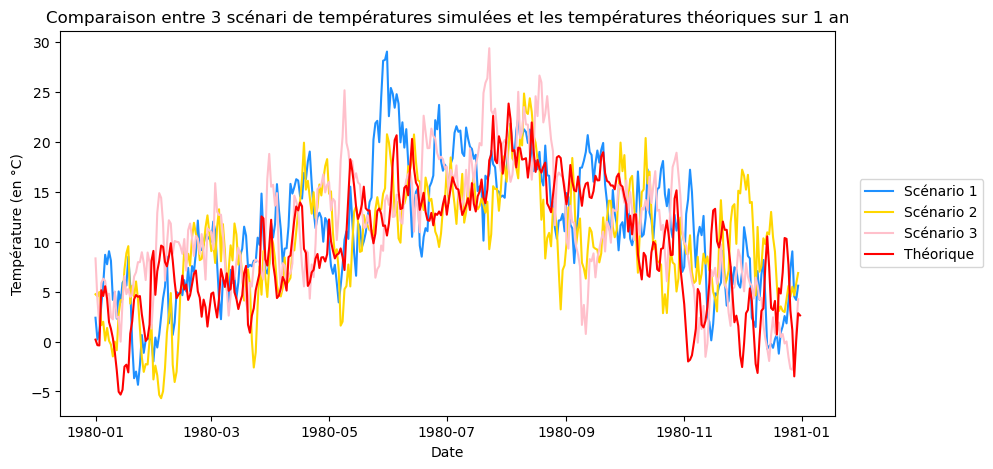

In [78]:
## Zoom sur 1 an

simu_1an = simu.iloc[0:364,:]
plt.plot(simu_1an.iloc[:,1],color='dodgerblue', label = 'Scénario 1')
plt.plot(simu_1an.iloc[:,2],color='gold', label = 'Scénario 2')
plt.plot(simu_1an.iloc[:,3],color='pink', label = 'Scénario 3')

df_80 = df[df.date.dt.year == 1980]
plt.plot(df_80['date'], df_80['temp'], color = 'red', label = 'Théorique')

plt.legend(loc = 'center right',bbox_to_anchor = (1.2, 0.5))
plt.title('Comparaison entre 3 scénari de températures simulées et les températures théoriques sur 1 an')
plt.xlabel('Date')
plt.ylabel('Température (en °C)')

plt.show()

**Les températures simulées miment très bien la réalité, au point où on ne sait plus quelle était la température prélevée dans la réalité et la température simulée par notre simulateur.**

----------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------

# III. Risques en température

----------------------------------------------------------------------------------------------------------------

Comme tout énergéticien, ENGIE se doit de respecter les OPS (obligation de services publics) : connaître les températures extrêment froides 
(telles qu'elles n'arrivent que tous les 50 ans), calculer des scénarios d'hiver très froid, plutôt froid, etc 
pour voir si les stockages et approvisionnements sont capables de fournir la demande en gaz.

Il est nécessaire de calculer des températures (par mois) à, par exemple, 20% froid (entre autres...)
Nous prendrons donc cet exemple ci-desous, en montrant la convergence, comme en partie I.




### Quantiles 20% et 80% par mois par Monte-Carlo

In [79]:
data = pd.DataFrame()

for i in range(12):
    Q1 = list()
    Q2 = list()
    
    for N in range(1, 2000, 20):
        A = simulateur(N,1980,1,1, 1983,12,31)
        x = A[A.index.month == i+1]
        X = list()
        X.append(x.values)
        Q1.append(np.quantile(X,0.80))
        Q2.append(np.quantile(X,0.20))
        
    data["Q 80% " + nom_mois(i+1)] = Q1
    data["Q 20% " + nom_mois(i+1)] = Q2

In [80]:
data.index=[u for u in range(1,2000,20)]
data.tail(10)

Q 80% janvier  Q 20% janvier  Q 80% février  Q 20% février  Q 80% mars   
1801       6.579633       1.057412       7.442884       1.861760    9.682647  \
1821       6.550948       1.037891       7.427288       1.868484    9.688067   
1841       6.536991       1.079577       7.446609       1.861882    9.724747   
1861       6.530823       1.016103       7.478229       1.926789    9.691491   
1881       6.576346       1.070815       7.451725       1.872252    9.731246   
1901       6.508302       1.052782       7.438767       1.874152    9.695018   
1921       6.535685       1.040413       7.451321       1.871280    9.710593   
1941       6.539753       1.018215       7.445218       1.868087    9.656667   
1961       6.577292       1.044626       7.421304       1.876875    9.692382   
1981       6.512346       1.003399       7.429626       1.828393    9.693730   

      Q 20% mars  Q 80% avril  Q 20% avril  Q 80% mai  Q 20% mai  ...   
1801    3.992526    12.808978     7.027571  16.236801  10.361937  ...  \
1821    3.977908    12.797377     6.995011  16.187827  10.330411  ...   
1841    4.007848    12.817624     7.028355  16.193481  10.355193  ...   
1861    3.992576    12.817810     7.041672  16.201350  10.344153  ...   
1881    4.028738    12.817752     7.014071  16.154460  10.331958  ...   
1901    3.962104    12.782303     7.073314  16.207531  10.345808  ...   
1921    4.008097    12.772154     7.014278  16.203421  10.344739  ...   
1941    3.987072    12.762875     7.053351  16.158562  10.296324  ...   
1961    4.008896    12.802272     7.042014  16.196097  10.307860  ...   
1981    4.028165    12.842564     7.096062  16.185074  10.335147  ...   

      Q 80% août  Q 20% août  Q 80% septembre  Q 20% septembre  Q 80% octobre   
1801   21.095668   15.460060        18.312083        12.767766      14.110944  \
1821   21.055441   15.438798        18.324839        12.820802      14.131539   
1841   21.101634   15.504141        18.362184        12.796118      14.096196   
1861   21.095857   15.517196        18.345653        12.757573      14.126188   
1881   21.048223   15.468882        18.361316        12.793343      14.133825   
1901   21.088953   15.489111        18.331498        12.786989      14.104478   
1921   21.041783   15.435011        18.353427        12.773612      14.118799   
1941   21.110954   15.494962        18.328340        12.767431      14.096790   
1961   21.050725   15.466533        18.359600        12.783908      14.130691   
1981   21.112576   15.499985        18.337417        12.759772      14.098658   

      Q 20% octobre  Q 80% novembre  Q 20% novembre  Q 80% décembre   
1801       8.429453        9.963793        4.488118        7.275598  \
1821       8.436090        9.968133        4.495473        7.259928   
1841       8.421903        9.965273        4.447190        7.284290   
1861       8.404679        9.997261        4.504843        7.256877   
1881       8.448929        9.965664        4.482178        7.271999   
1901       8.414613        9.926979        4.470232        7.298589   
1921       8.423130        9.981041        4.485327        7.294107   
1941       8.383950        9.980545        4.490594        7.257022   
1961       8.428145        9.991166        4.471310        7.242831   
1981       8.397827        9.968637        4.458122        7.229699   

      Q 20% décembre  
1801        1.985274  
1821        1.963400  
1841        1.991619  
1861        1.955336  
1881        1.993430  
1901        1.975699  
1921        1.995364  
1941        1.974044  
1961        1.958282  
1981        1.975888  

[10 rows x 24 columns]

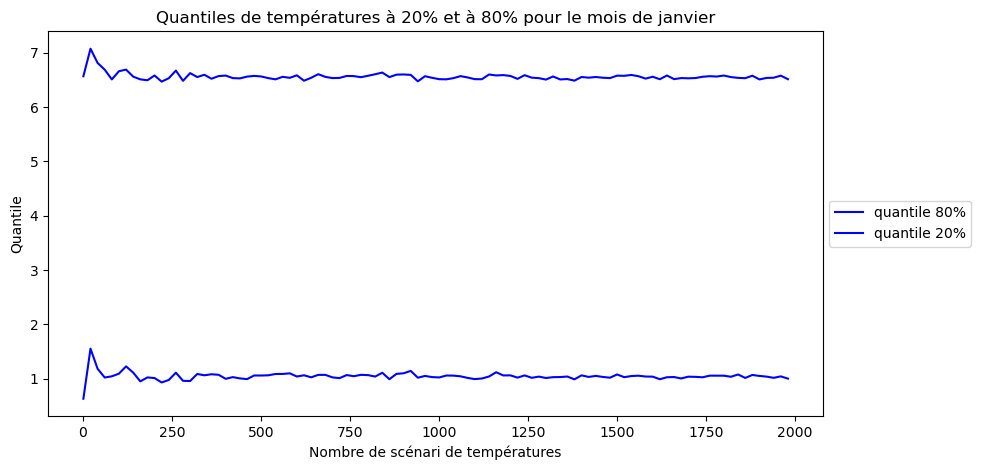

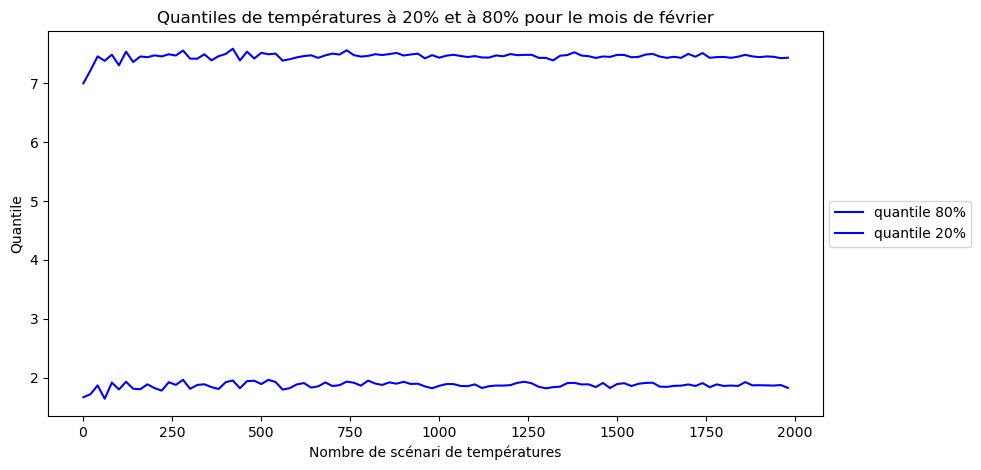

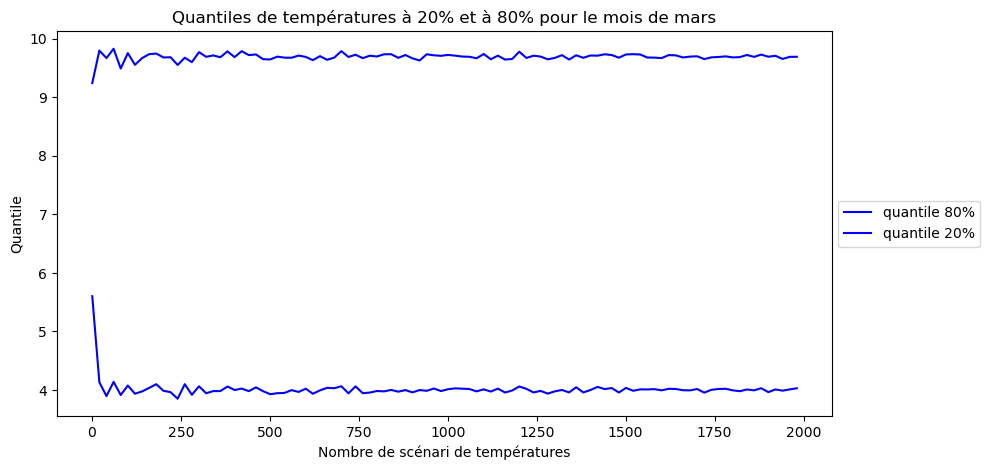

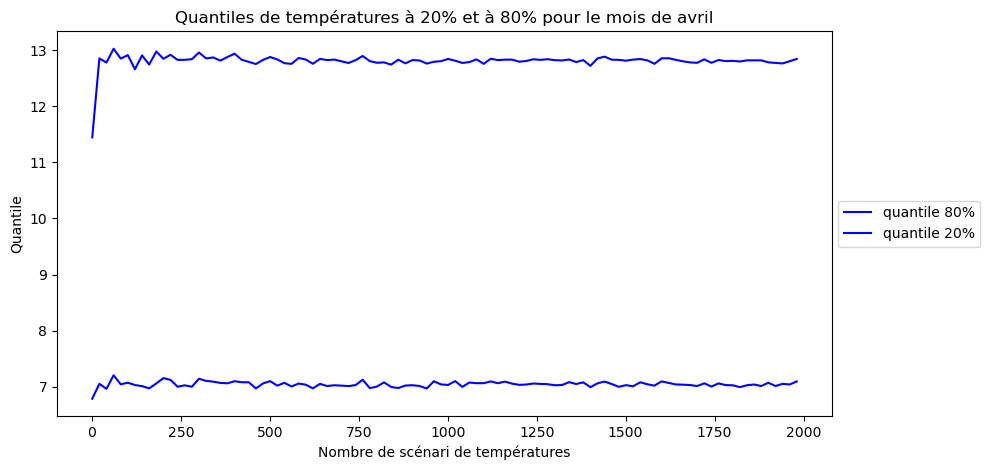

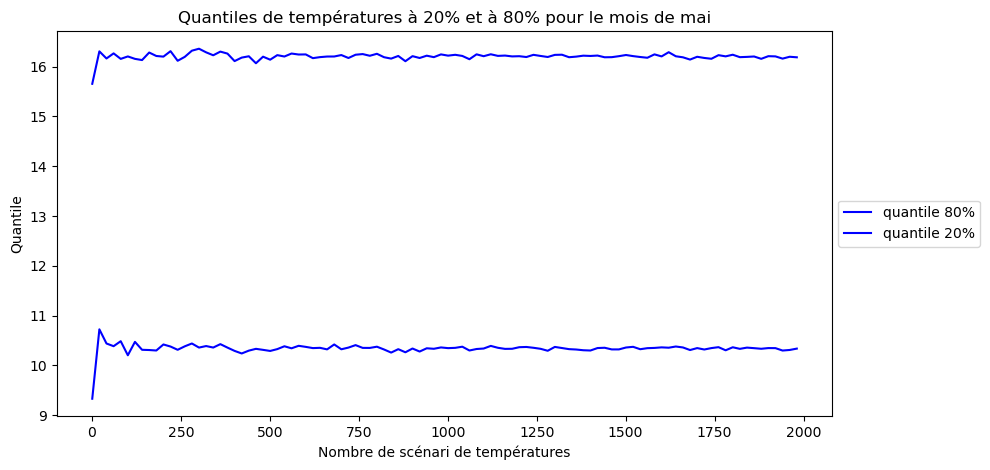

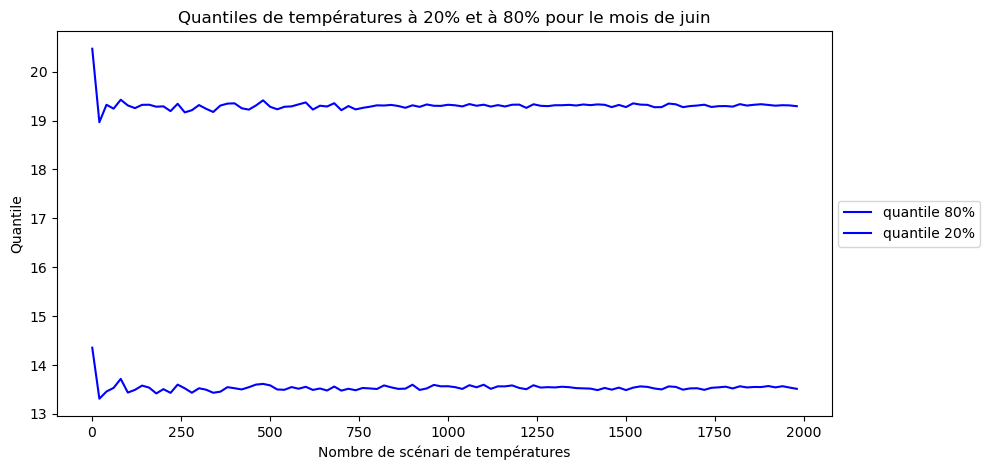

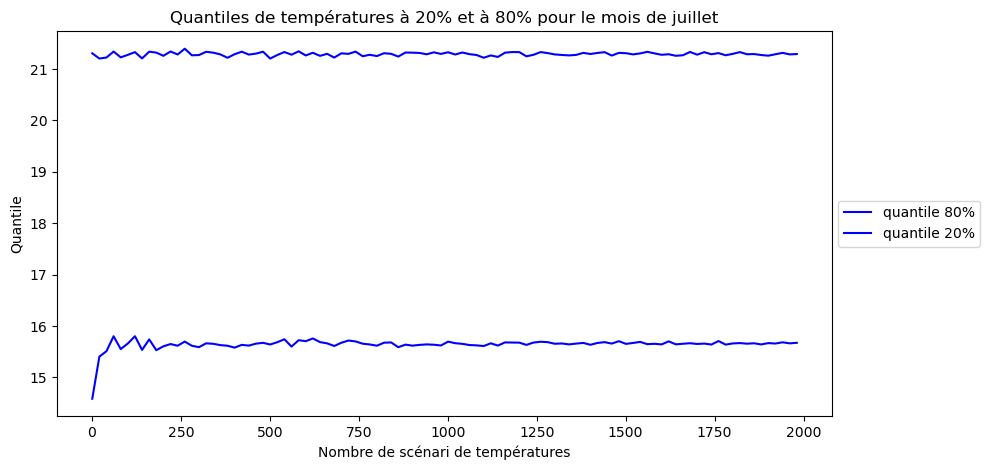

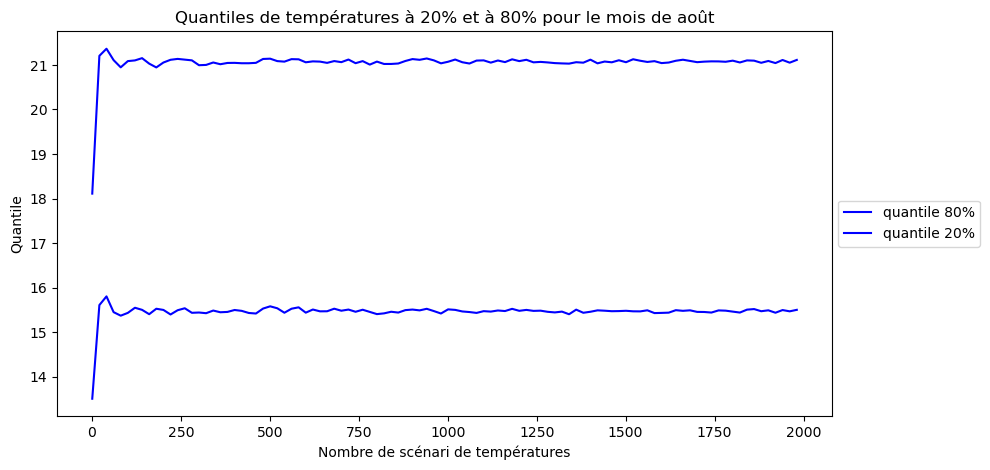

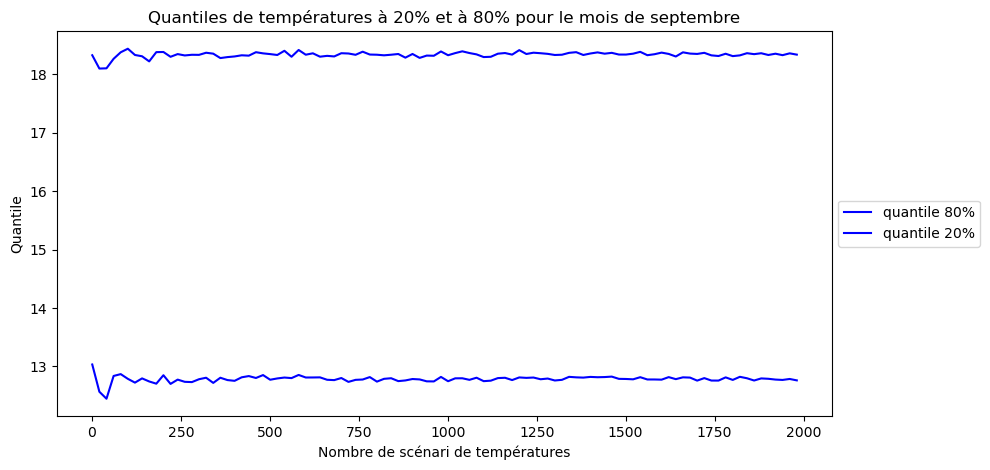

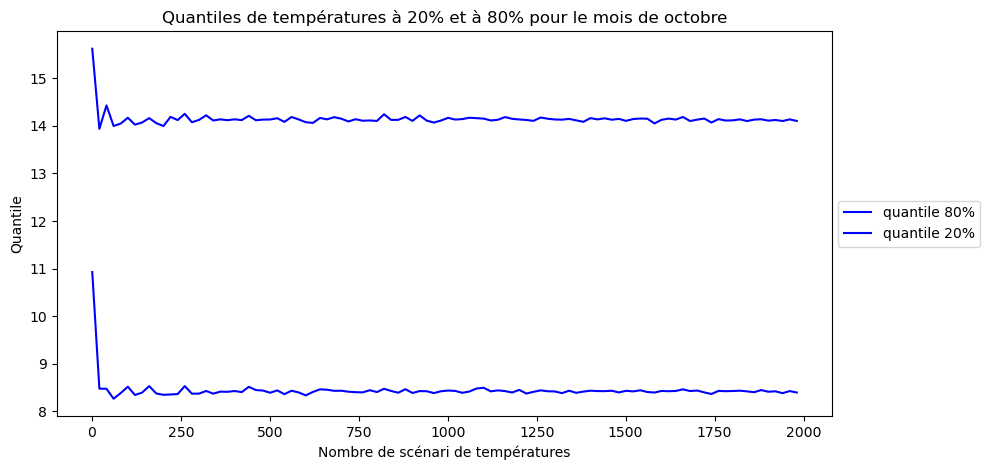

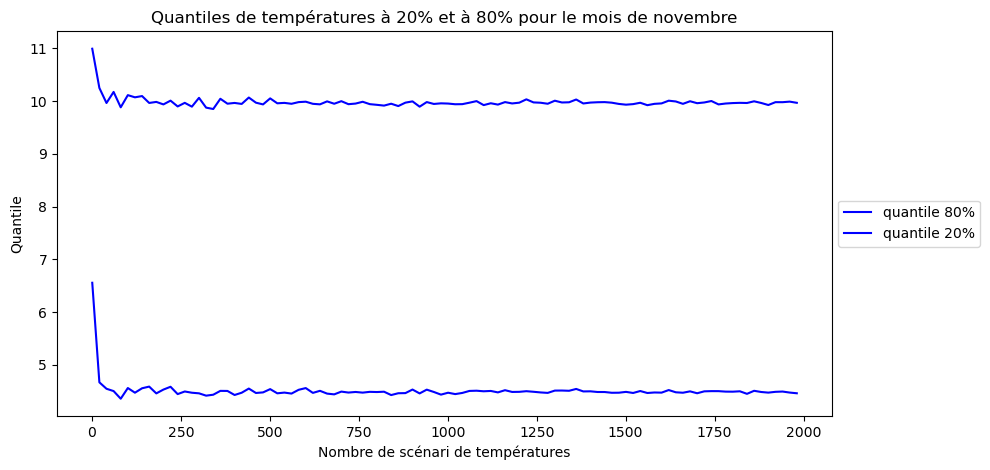

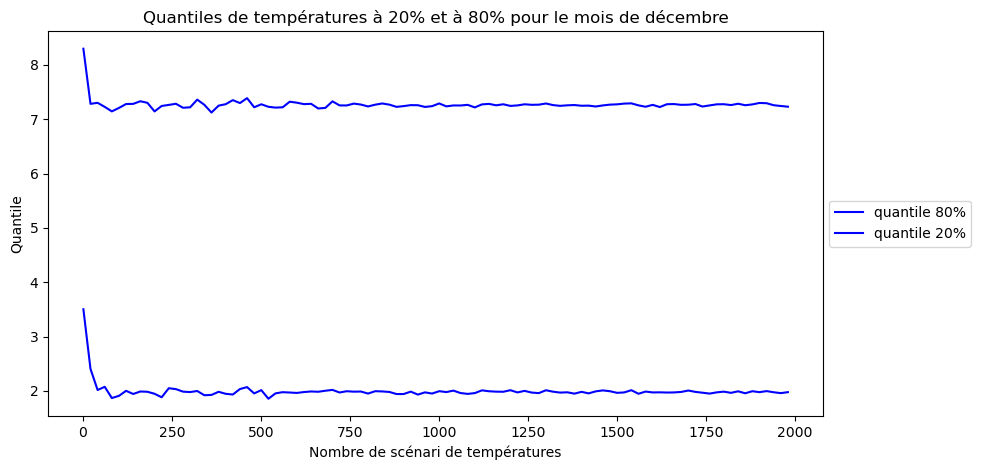

In [81]:
for i in range(12):
    plt.plot(data.index, data["Q 80% " + nom_mois(i+1)], color='blue')
    plt.plot(data.index, data["Q 20% " + nom_mois(i+1)], color='blue')

    V=['quantile 80%','quantile 20%']
    plt.legend(V, loc = 'center right', bbox_to_anchor = (1.2,0.5))

    plt.xlabel("Nombre de scénari de températures")
    plt.ylabel('Quantile')
    plt.title('Quantiles de températures à 20% et à 80% pour le mois de '+nom_mois(i+1))

    plt.show()

In [82]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error

In [83]:
data = data.reset_index()
data['un'] = 1
data['sqrt_n'] = 1/np.sqrt(data['index'])
data.head() 

index  Q 80% janvier  Q 20% janvier  Q 80% février  Q 20% février   
0      1       6.566467       0.633675       6.994754       1.670238  \
1     21       7.073019       1.554741       7.214939       1.721863   
2     41       6.811070       1.183662       7.452071       1.870923   
3     61       6.687086       1.023752       7.376782       1.645050   
4     81       6.508227       1.045629       7.481208       1.917724   

   Q 80% mars  Q 20% mars  Q 80% avril  Q 20% avril  Q 80% mai  ...   
0    9.243311    5.601948    11.446093     6.788244  15.652971  ...  \
1    9.799957    4.129470    12.852958     7.053778  16.304427  ...   
2    9.671170    3.893547    12.778484     6.964336  16.161437  ...   
3    9.831474    4.137814    13.025008     7.206068  16.263889  ...   
4    9.493153    3.912968    12.849253     7.044551  16.153293  ...   

   Q 80% septembre  Q 20% septembre  Q 80% octobre  Q 20% octobre   
0        18.327122        13.031866      15.614313      10.927059  \
1        18.099125        12.565260      13.932914       8.479735   
2        18.103153        12.445689      14.423918       8.476594   
3        18.266050        12.835354      13.992675       8.267666   
4        18.377990        12.867090      14.043174       8.387201   

   Q 80% novembre  Q 20% novembre  Q 80% décembre  Q 20% décembre  un   
0       10.994928        6.554580        8.296877        3.502128   1  \
1       10.250783        4.665749        7.282534        2.403389   1   
2        9.965074        4.543539        7.301306        2.015470   1   
3       10.175180        4.499566        7.226613        2.074300   1   
4        9.883316        4.354542        7.143459        1.867676   1   

     sqrt_n  
0  1.000000  
1  0.218218  
2  0.156174  
3  0.128037  
4  0.111111  

[5 rows x 27 columns]

In [84]:
X=pd.DataFrame(data['sqrt_n'])

for i in range(12):
    y = data["Q 80% " + nom_mois(i+1)]
    lm = LR()
    model=lm.fit(X, y)
    beta1=model.coef_[0]
    QQ1=model.predict(X) 
    data['QQ 80% ' +nom_mois(i+1)]=QQ1
    print("Le coefficient beta avec les données Q 80% de " + nom_mois(i+1) + " vaut : " + str(beta1))
    
    y = data["Q 20% " + nom_mois(i+1)]
    model=lm.fit(X, y)
    beta2=model.coef_[0]
    QQ2=model.predict(X) 
    data['QQ 20% ' + nom_mois(i+1)]=QQ2
    print("Le coefficient beta avec les données Q 20% de "+nom_mois(i+1)+" vaut : " + str(beta2))
    
    





Le coefficient beta avec les données Q 80% de janvier vaut : 0.15112917456038324
Le coefficient beta avec les données Q 20% de janvier vaut : -0.28696128596062753
Le coefficient beta avec les données Q 80% de février vaut : -0.4964351291191375
Le coefficient beta avec les données Q 20% de février vaut : -0.24964667126491344
Le coefficient beta avec les données Q 80% de mars vaut : -0.4265074388148991
Le coefficient beta avec les données Q 20% de mars vaut : 1.5522412476859277
Le coefficient beta avec les données Q 80% de avril vaut : -1.2729363258114972
Le coefficient beta avec les données Q 20% de avril vaut : -0.23547132970019757
Le coefficient beta avec les données Q 80% de mai vaut : -0.5106368018141634
Le coefficient beta avec les données Q 20% de mai vaut : -0.8776014512122039
Le coefficient beta avec les données Q 80% de juin vaut : 1.0543829164616143
Le coefficient beta avec les données Q 20% de juin vaut : 0.7341739138834368
Le coefficient beta avec les données Q 80% de juille

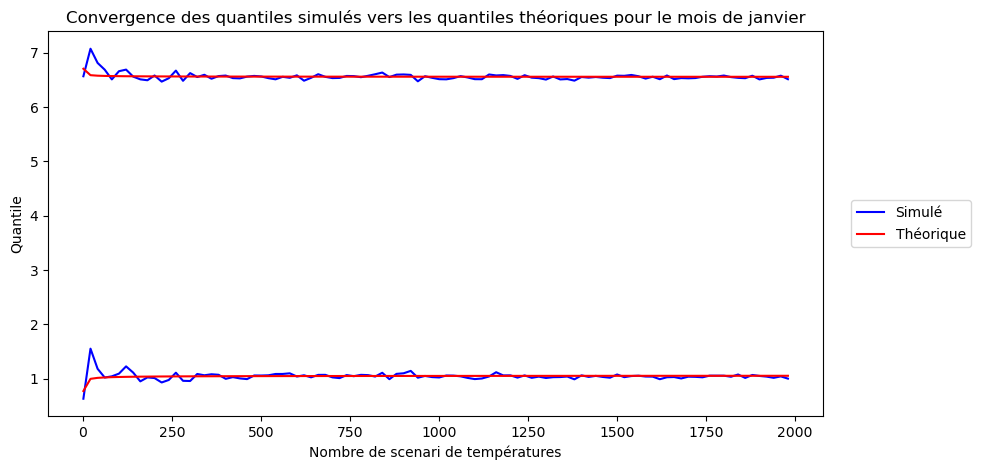

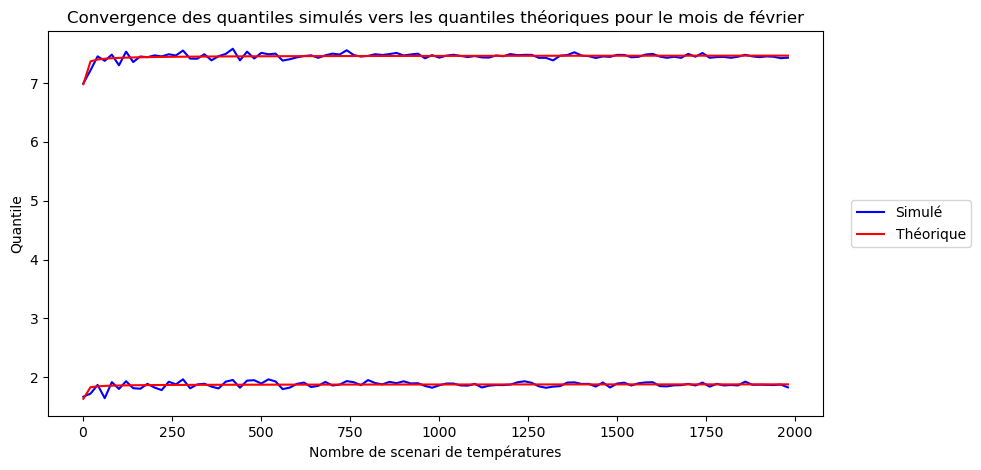

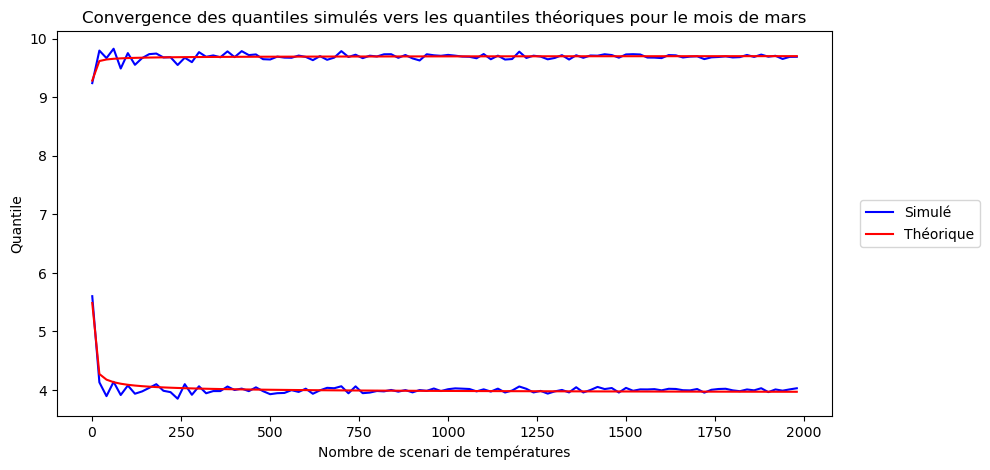

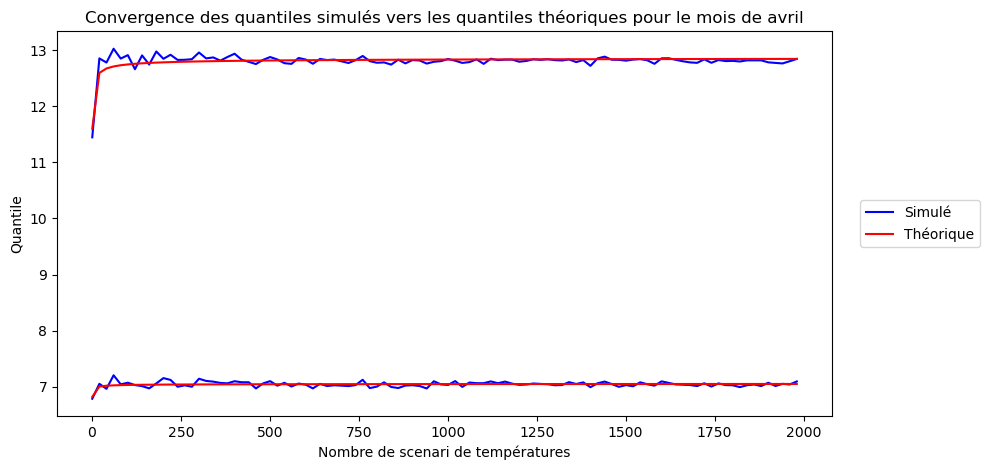

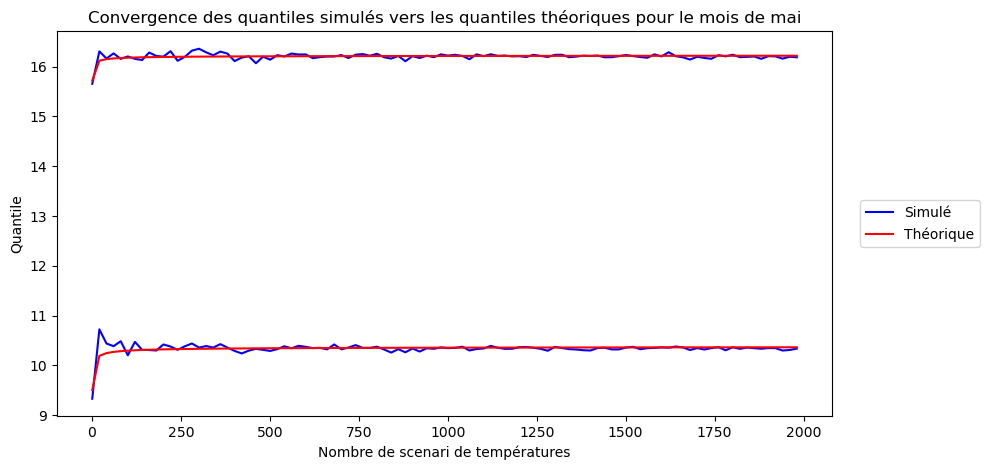

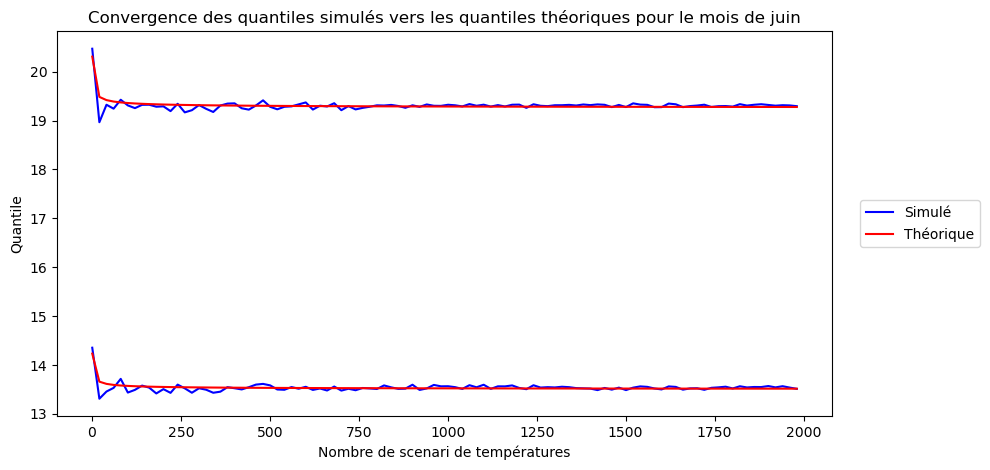

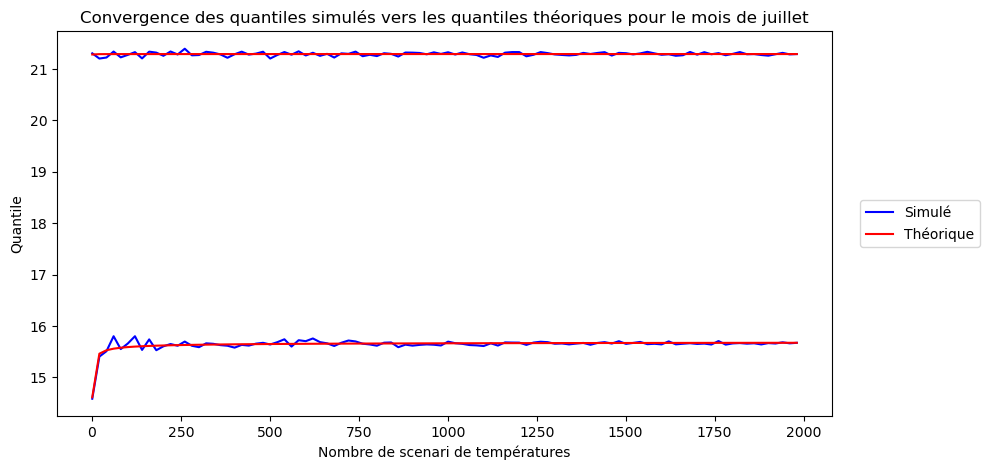

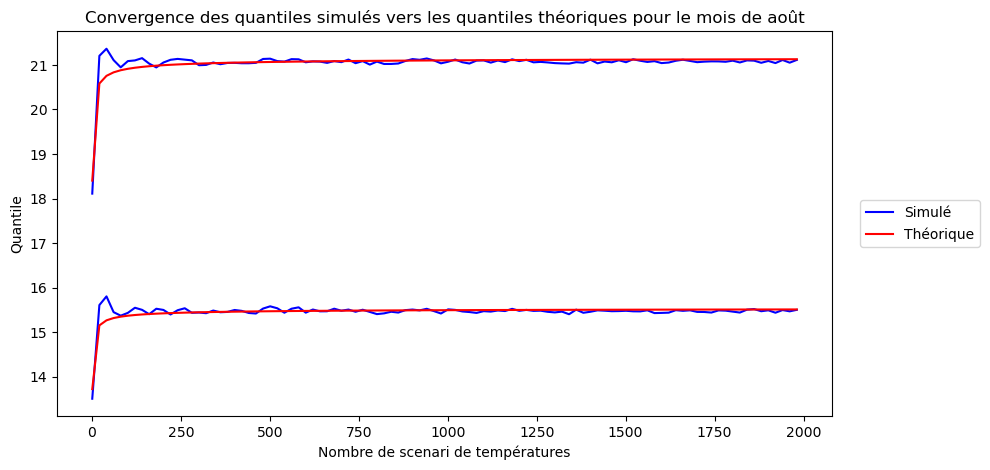

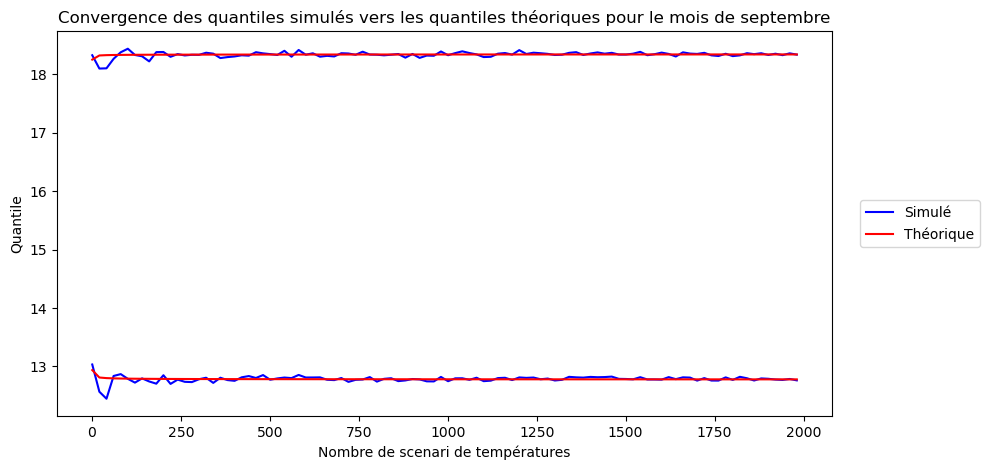

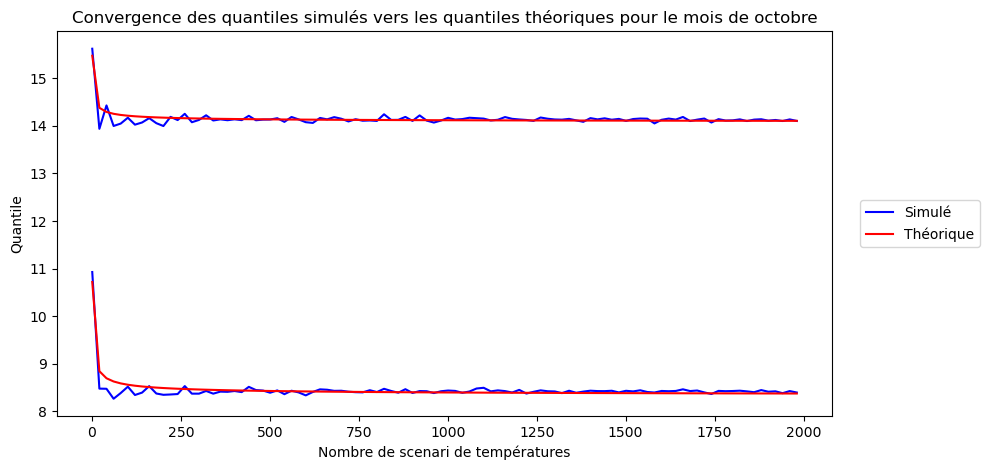

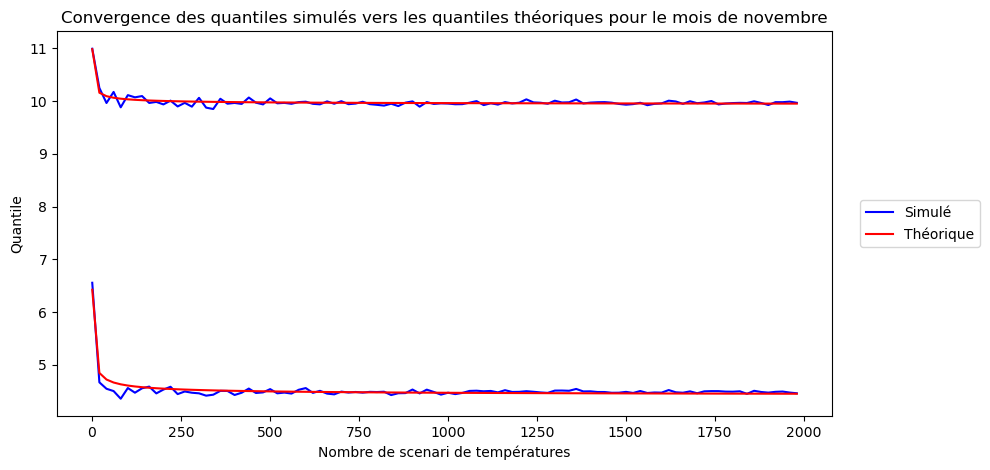

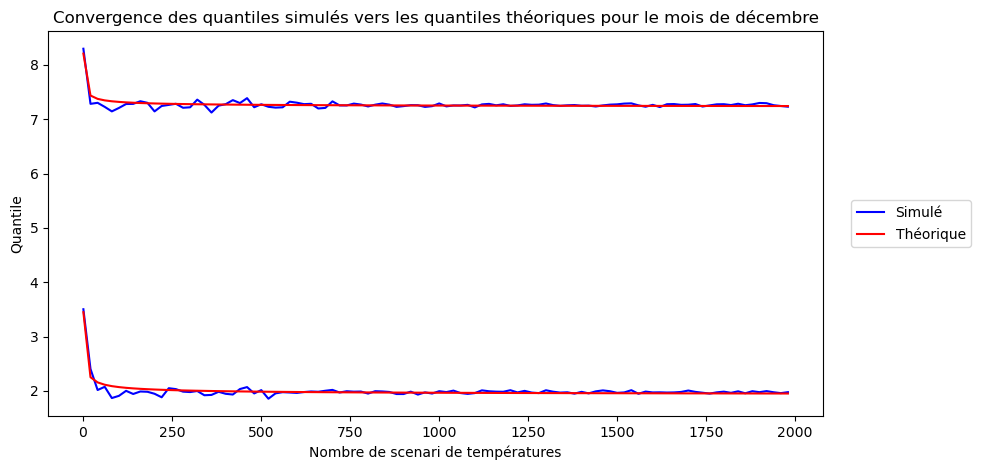

In [85]:
for i in range(12):
    plt.plot(data['index'], data["Q 20% " + nom_mois(i+1)],color='blue')
    plt.plot(data['index'], data['QQ 20% ' + nom_mois(i+1)],color='red')

    plt.plot(data['index'], data["Q 80% " + nom_mois(i+1)],color='blue')
    plt.plot(data['index'], data['QQ 80% ' +nom_mois(i+1)],color='red')

    V=['Simulé','Théorique']
    plt.legend(V, loc = 'center right', bbox_to_anchor = (1.2, 0.5))

    plt.xlabel("Nombre de scenari de températures")
    plt.ylabel("Quantile")
    plt.title("Convergence des quantiles simulés vers les quantiles théoriques pour le mois de " + nom_mois(i+1))

    plt.show()

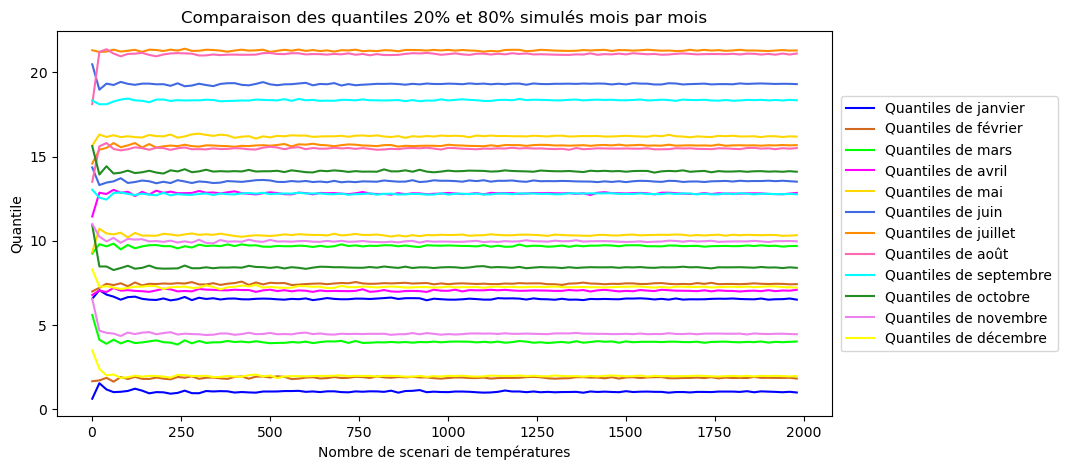

In [86]:
colors = ['blue', 'chocolate', 'lime', 'fuchsia', 'gold', 'royalblue', 'darkorange', 'hotpink', 'cyan', 'forestgreen', 'violet', 'yellow']

for i in range(12):
    plt.plot(data['index'], data["Q 80% " + nom_mois(i+1)],color=colors[i])
    
    plt.plot(data['index'], data["Q 20% " + nom_mois(i+1)],color= colors[i], label = 'Quantiles de ' + nom_mois(i+1))


plt.legend(loc = 'center right', bbox_to_anchor = (1.3, 0.5))
plt.xlabel("Nombre de scenari de températures")
plt.ylabel("Quantile")
plt.title("Comparaison des quantiles 20% et 80% simulés mois par mois")

plt.show()

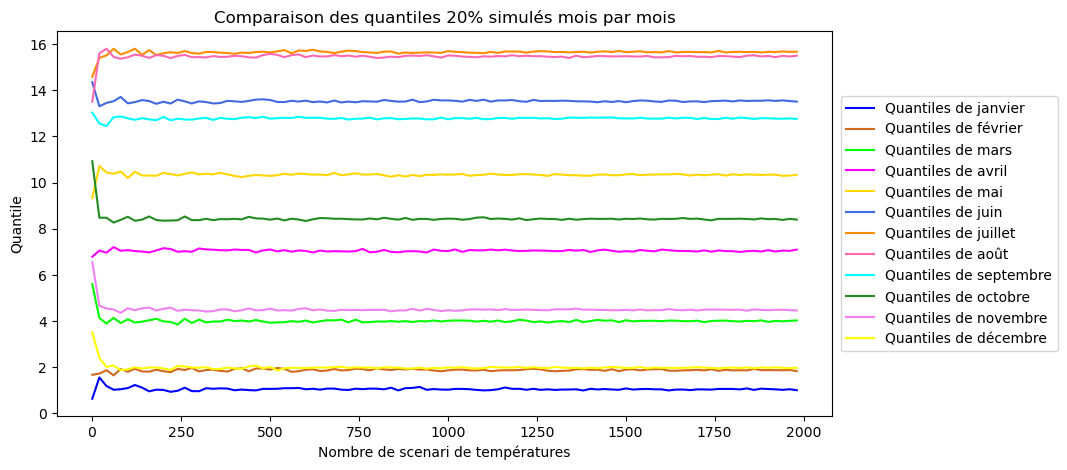

In [87]:
colors = ['blue', 'chocolate', 'lime', 'fuchsia', 'gold', 'royalblue', 'darkorange', 'hotpink', 'cyan', 'forestgreen', 'violet', 'yellow']

for i in range(12):    
    plt.plot(data['index'], data["Q 20% " + nom_mois(i+1)],color= colors[i], label = 'Quantiles de ' + nom_mois(i+1))


plt.legend(loc = 'center right', bbox_to_anchor = (1.3, 0.5))
plt.xlabel("Nombre de scenari de températures")
plt.ylabel("Quantile")
plt.title("Comparaison des quantiles 20% simulés mois par mois")

plt.show()

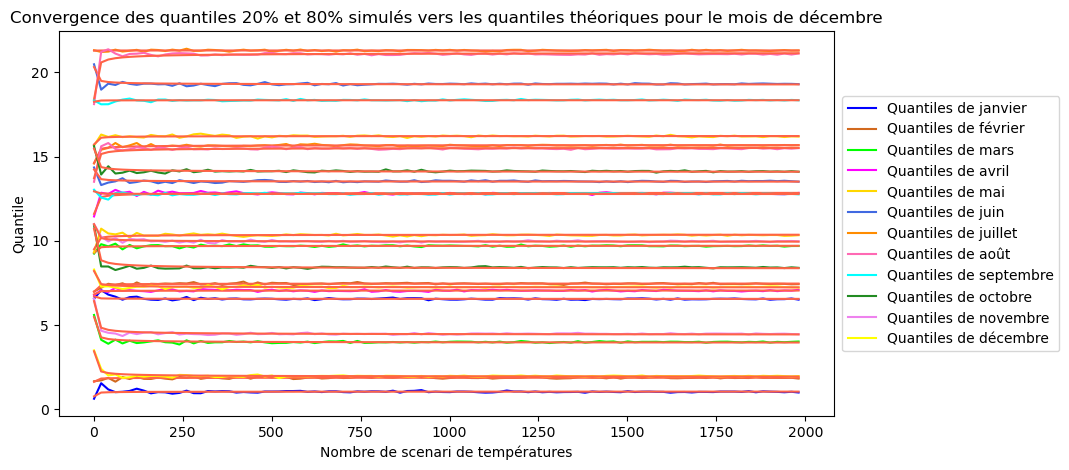

In [88]:
colors = ['blue', 'chocolate', 'lime', 'fuchsia', 'gold', 'royalblue', 'darkorange', 'hotpink', 'cyan', 'forestgreen', 'violet', 'yellow']

for i in range(12):    
    plt.plot(data['index'], data["Q 20% " + nom_mois(i+1)],color= colors[i], label = 'Quantiles de ' + nom_mois(i+1))
    plt.plot(data['index'], data['QQ 20% ' + nom_mois(i+1)],color='tomato')
    
    plt.plot(data['index'], data["Q 80% " + nom_mois(i+1)],color= colors[i])
    plt.plot(data['index'], data['QQ 80% ' + nom_mois(i+1)],color='tomato')


plt.legend(loc = 'center right', bbox_to_anchor = (1.3, 0.5))
plt.xlabel("Nombre de scenari de températures")
plt.ylabel("Quantile")
plt.title("Convergence des quantiles 20% et 80% simulés vers les quantiles théoriques pour le mois de " + nom_mois(i+1))

plt.show()

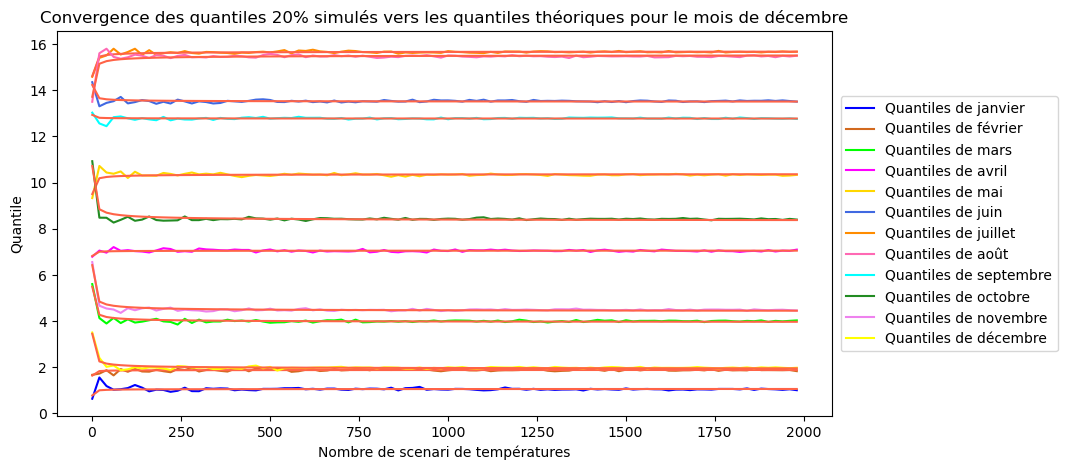

In [89]:
colors = ['blue', 'chocolate', 'lime', 'fuchsia', 'gold', 'royalblue', 'darkorange', 'hotpink', 'cyan', 'forestgreen', 'violet', 'yellow']

for i in range(12):    
    plt.plot(data['index'], data["Q 20% " + nom_mois(i+1)],color= colors[i], label = 'Quantiles de ' + nom_mois(i+1))
    plt.plot(data['index'], data['QQ 20% ' + nom_mois(i+1)],color='tomato')


plt.legend(loc = 'center right', bbox_to_anchor = (1.3, 0.5))
plt.xlabel("Nombre de scenari de températures")
plt.ylabel("Quantile")
plt.title("Convergence des quantiles 20% simulés vers les quantiles théoriques pour le mois de " + nom_mois(i+1))

plt.show()

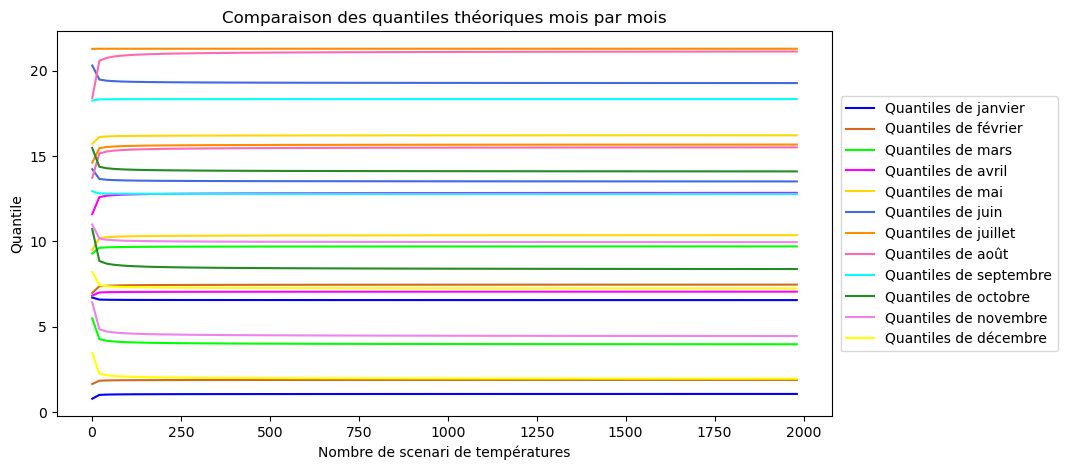

In [90]:
colors = ['blue', 'chocolate', 'lime', 'fuchsia', 'gold', 'royalblue', 'darkorange', 'hotpink', 'cyan', 'forestgreen', 'violet', 'yellow']

for i in range(12):
    plt.plot(data['index'], data["QQ 80% " + nom_mois(i+1)],color=colors[i])
    
    plt.plot(data['index'], data['QQ 20% ' + nom_mois(i+1)],color= colors[i], label = 'Quantiles de ' + nom_mois(i+1))


plt.legend(loc = 'center right', bbox_to_anchor = (1.3, 0.5))
plt.xlabel("Nombre de scenari de températures")
plt.ylabel("Quantile")
plt.title("Comparaison des quantiles théoriques mois par mois")

plt.show()

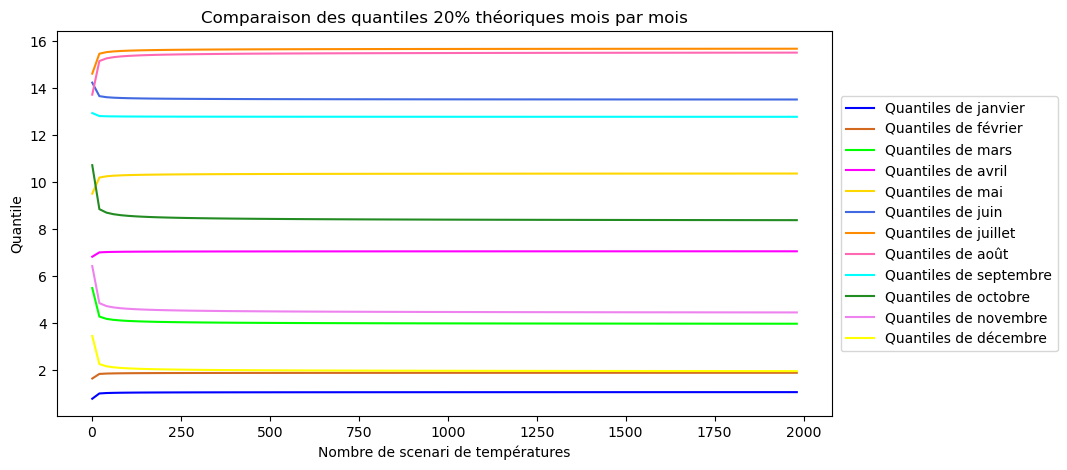

In [91]:
colors = ['blue', 'chocolate', 'lime', 'fuchsia', 'gold', 'royalblue', 'darkorange', 'hotpink', 'cyan', 'forestgreen', 'violet', 'yellow']

for i in range(12):    
    plt.plot(data['index'], data["QQ 20% " + nom_mois(i+1)],color= colors[i], label = 'Quantiles de ' + nom_mois(i+1))


plt.legend(loc = 'center right', bbox_to_anchor = (1.3, 0.5))
plt.xlabel("Nombre de scenari de températures")
plt.ylabel("Quantile")
plt.title("Comparaison des quantiles 20% théoriques mois par mois")

plt.show()

### Moyenne glissante sur 3 jours par année

In [92]:
moyenne_glissante = pd.DataFrame()


Q1 = list()
Q2 = list()
    
for N in range(1, 2000, 20):
    A = simulateur(N,1980,1,1, 1983,12,31)
        
    for j in range(N):
        x = A.iloc[:,j]
        X = list()
            
        for i in range(len(x)-2):
            y = (x.iloc[i] + x.iloc[i+1] + x.iloc[i+2])/3
            X.append(y)
                
        last = (x[363]+x[364])/2
        X.append(last)
            
    Q1.append(np.quantile(X,0.98))
    Q2.append(np.quantile(X,0.02))
        
        
moyenne_glissante["Q 98%"] = Q1
moyenne_glissante["Q 2%"] = Q2

In [93]:
moyenne_glissante.index=[u for u in range(1,2000,20)]
moyenne_glissante.head(10)

Q 98%      Q 2%
1    21.558675 -0.485003
21   23.408023 -0.999833
41   21.384344  0.835996
61   22.673250 -0.353399
81   22.969503  1.354471
101  24.601535 -0.846907
121  22.274963 -0.767250
141  23.673377  0.995467
161  22.613247 -0.593317
181  23.205599  0.725985

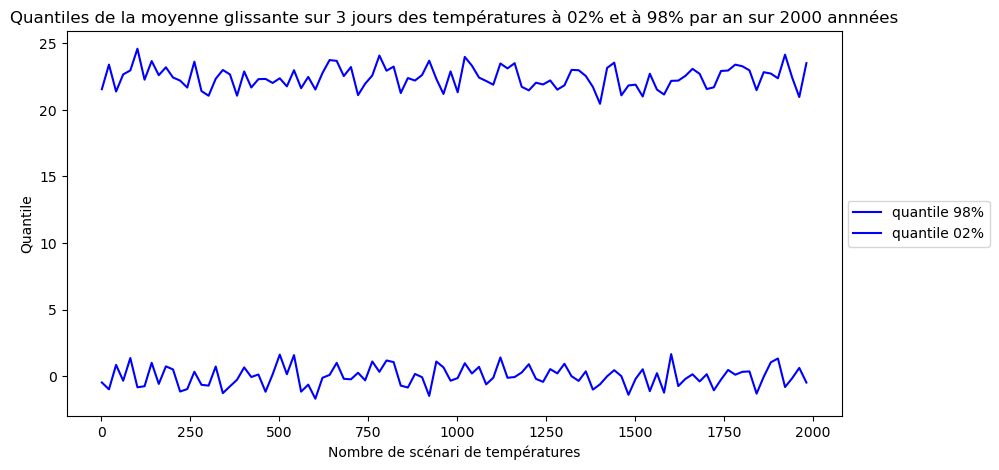

In [94]:
plt.plot(moyenne_glissante.index, moyenne_glissante["Q 98%"], color='blue')
plt.plot(moyenne_glissante.index, moyenne_glissante["Q 2%"], color='blue')

V=['quantile 98%','quantile 02%']
plt.legend(V, loc = 'center right', bbox_to_anchor = (1.2,0.5))

plt.xlabel("Nombre de scénari de températures")
plt.ylabel('Quantile')
plt.title('Quantiles de la moyenne glissante sur 3 jours des températures à 02% et à 98% par an sur 2000 annnées')

plt.show()

In [96]:
moyenne_glissante = moyenne_glissante.reset_index()
moyenne_glissante['un'] = 1
moyenne_glissante['sqrt_n'] = 1/np.sqrt(moyenne_glissante['index'])
moyenne_glissante.head() 

index      Q 98%      Q 2%  un    sqrt_n
0      1  21.558675 -0.485003   1  1.000000
1     21  23.408023 -0.999833   1  0.218218
2     41  21.384344  0.835996   1  0.156174
3     61  22.673250 -0.353399   1  0.128037
4     81  22.969503  1.354471   1  0.111111

In [97]:
X=pd.DataFrame(moyenne_glissante['sqrt_n'])

y = moyenne_glissante["Q 98%"]
lm = LR()
model=lm.fit(X, y)
beta1=model.coef_[0]
QQ1=model.predict(X) 
moyenne_glissante['QQ 98% ']=QQ1
print("Le coefficient beta avec les données Q 98% vaut : " + str(beta1))

y = moyenne_glissante["Q 2%"]
lm = LR()
model=lm.fit(X, y)
beta2=model.coef_[0]
QQ2=model.predict(X) 
moyenne_glissante['QQ 2% ']=QQ2
print("Le coefficient beta avec les données Q 2% vaut : " + str(beta2))

Le coefficient beta avec les données Q 98% vaut : -0.5551802078774968
Le coefficient beta avec les données Q 2% vaut : -0.5703043223756521


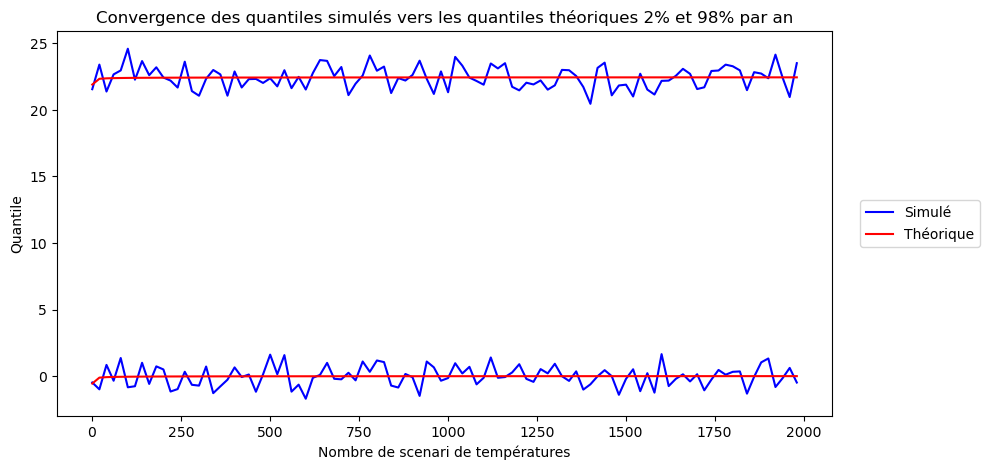

In [98]:
plt.plot(moyenne_glissante['index'], moyenne_glissante["Q 98%"],color='blue')
plt.plot(moyenne_glissante['index'], moyenne_glissante['QQ 98% '],color='red')

plt.plot(moyenne_glissante['index'], moyenne_glissante["Q 2%"],color='blue')
plt.plot(moyenne_glissante['index'], moyenne_glissante['QQ 2% '],color='red')

V=['Simulé','Théorique']
plt.legend(V, loc = 'center right', bbox_to_anchor = (1.2, 0.5))

plt.xlabel("Nombre de scenari de températures")
plt.ylabel("Quantile")
plt.title("Convergence des quantiles simulés vers les quantiles théoriques 2% et 98% par an")

plt.show()

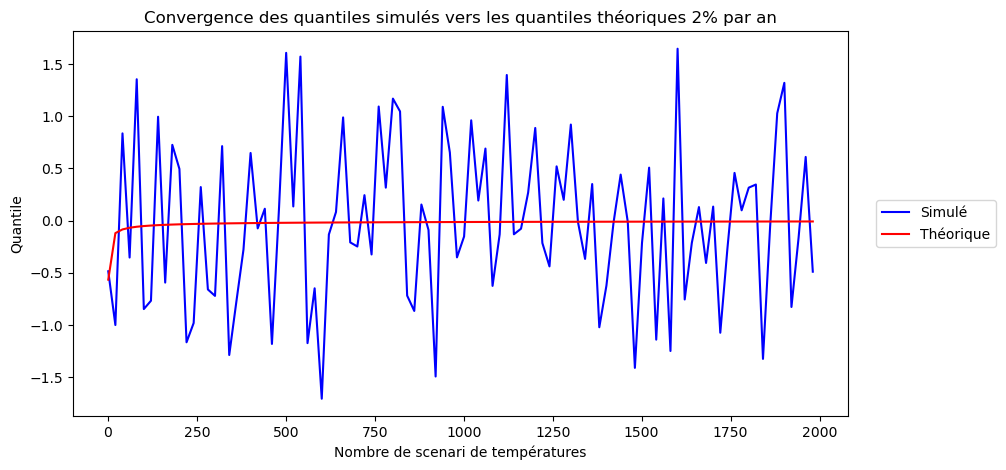

In [99]:
plt.plot(moyenne_glissante['index'], moyenne_glissante["Q 2%"],color='blue')
plt.plot(moyenne_glissante['index'], moyenne_glissante['QQ 2% '],color='red')

V=['Simulé','Théorique']
plt.legend(V, loc = 'center right', bbox_to_anchor = (1.2, 0.5))

plt.xlabel("Nombre de scenari de températures")
plt.ylabel("Quantile")
plt.title("Convergence des quantiles simulés vers les quantiles théoriques 2% par an")

plt.show()

In [100]:
moyenne_glissante.tail(10)

index      Q 98%      Q 2%  un    sqrt_n    QQ 98%     QQ 2% 
90   1801  23.284224  0.316082   1  0.023564  22.449387 -0.008424
91   1821  22.975454  0.346025   1  0.023434  22.449459 -0.008350
92   1841  21.487972 -1.324214   1  0.023306  22.449530 -0.008277
93   1861  22.837520 -0.061120   1  0.023181  22.449600 -0.008205
94   1881  22.734902  1.028068   1  0.023057  22.449668 -0.008135
95   1901  22.379759  1.319943   1  0.022936  22.449736 -0.008065
96   1921  24.156558 -0.826893   1  0.022816  22.449802 -0.007997
97   1941  22.435518 -0.165057   1  0.022698  22.449868 -0.007930
98   1961  20.970235  0.610311   1  0.022582  22.449932 -0.007864
99   1981  23.515364 -0.489001   1  0.022468  22.449995 -0.007798

### Moyenne glissante sur 3 jours sur 2000 ans ($N\times 365$ jours)

In [101]:
moyenne_glissante_general = pd.DataFrame()


Q1 = list()
Q2 = list()
    
for N in range(1, 2001, 20):
    A = simulateur(N,1980,1,1, 1980,12,31)
    
    X = list()
    for j in range(len(A)):
        x = A.iloc[j,:].mean()
        X.append(x)
    
    Y = list()
    for i in range(len(X)-2):
        y = (X[i] + X[i+1] + X[i+2])/3
        Y.append(y)
            
    Q1.append(np.quantile(Y,0.98))
    Q2.append(np.quantile(Y,0.02))
        
        
moyenne_glissante_general["Q 98%"] = Q1
moyenne_glissante_general["Q 2%"] = Q2

In [102]:
moyenne_glissante_general.index=[u for u in range(1,2001,20)]
moyenne_glissante_general.head(10)

Q 98%      Q 2%
1    22.761189 -0.666012
21   19.461400  3.529447
41   19.144589  4.035593
61   19.259919  3.463957
81   19.131932  3.199289
101  19.095644  3.415847
121  18.976859  3.474641
141  19.014857  2.952264
161  18.862275  3.904765
181  19.173885  3.529550

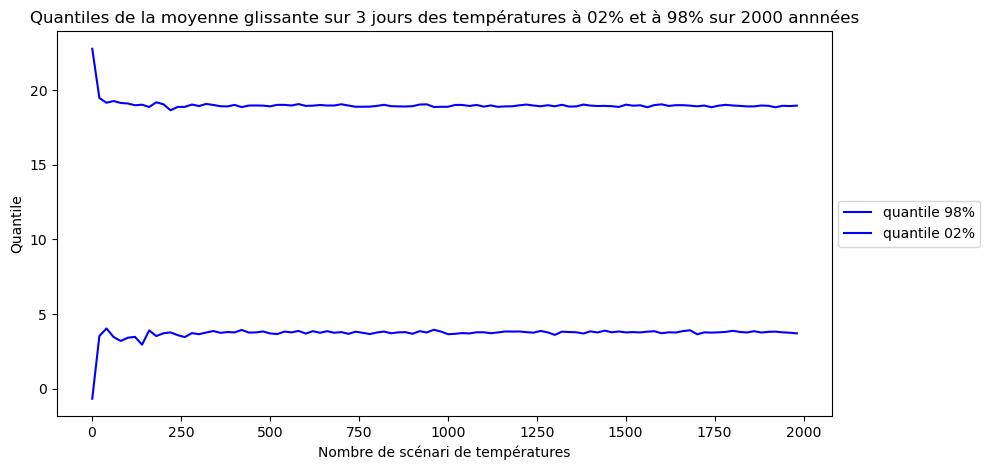

In [103]:
plt.plot(moyenne_glissante_general.index, moyenne_glissante_general["Q 98%"], color='blue')
plt.plot(moyenne_glissante_general.index, moyenne_glissante_general["Q 2%"], color='blue')

V=['quantile 98%','quantile 02%']
plt.legend(V, loc = 'center right', bbox_to_anchor = (1.2,0.5))

plt.xlabel("Nombre de scénari de températures")
plt.ylabel('Quantile')
plt.title('Quantiles de la moyenne glissante sur 3 jours des températures à 02% et à 98% sur 2000 annnées')

plt.show()

In [104]:
moyenne_glissante_general = moyenne_glissante_general.reset_index()
moyenne_glissante_general['un'] = 1
moyenne_glissante_general['sqrt_n'] = 1/np.sqrt(moyenne_glissante_general['index'])
moyenne_glissante_general.head() 

index      Q 98%      Q 2%  un    sqrt_n
0      1  22.761189 -0.666012   1  1.000000
1     21  19.461400  3.529447   1  0.218218
2     41  19.144589  4.035593   1  0.156174
3     61  19.259919  3.463957   1  0.128037
4     81  19.131932  3.199289   1  0.111111

In [111]:
X=pd.DataFrame(moyenne_glissante_general['sqrt_n'])

y = moyenne_glissante_general["Q 98%"]
lm = LR()
model=lm.fit(X, y)
beta1=model.coef_[0]
QQ1=model.predict(X) 
moyenne_glissante_general['QQ 98% ']=QQ1
print("Le coefficient beta avec les données Q 98% vaut : " + str(beta1))

y = moyenne_glissante_general["Q 2%"]
lm = LR()
model=lm.fit(X, y)
beta2=model.coef_[0]
QQ2=model.predict(X) 
moyenne_glissante_general['QQ 2% ']=QQ2
print("Le coefficient beta avec les données Q 2% vaut : " + str(beta2))

Le coefficient beta avec les données Q 98% vaut : 3.806699095248002
Le coefficient beta avec les données Q 2% vaut : -4.397719167039669


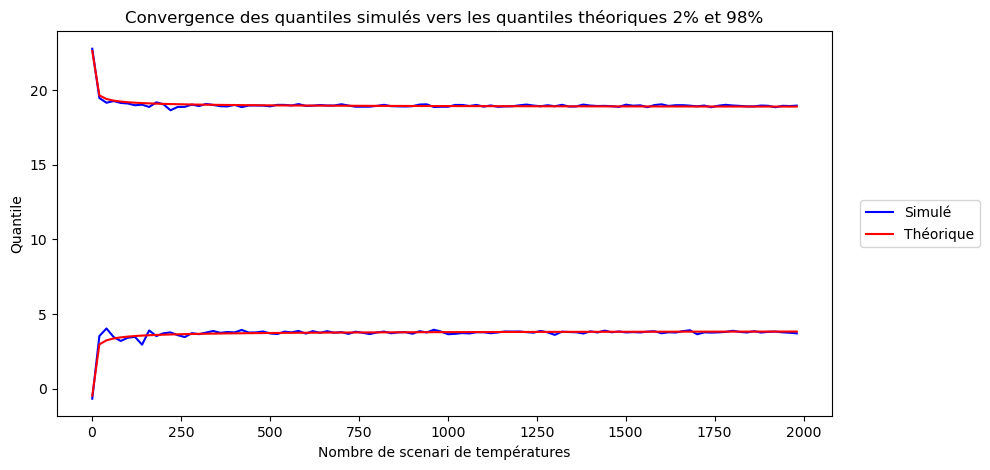

In [112]:
plt.plot(moyenne_glissante_general['index'], moyenne_glissante_general["Q 98%"],color='blue')
plt.plot(moyenne_glissante_general['index'], moyenne_glissante_general['QQ 98% '],color='red')

plt.plot(moyenne_glissante_general['index'], moyenne_glissante_general["Q 2%"],color='blue')
plt.plot(moyenne_glissante_general['index'], moyenne_glissante_general['QQ 2% '],color='red')

V=['Simulé','Théorique']
plt.legend(V, loc = 'center right', bbox_to_anchor = (1.2, 0.5))

plt.xlabel("Nombre de scenari de températures")
plt.ylabel("Quantile")
plt.title("Convergence des quantiles simulés vers les quantiles théoriques 2% et 98%")

plt.show()

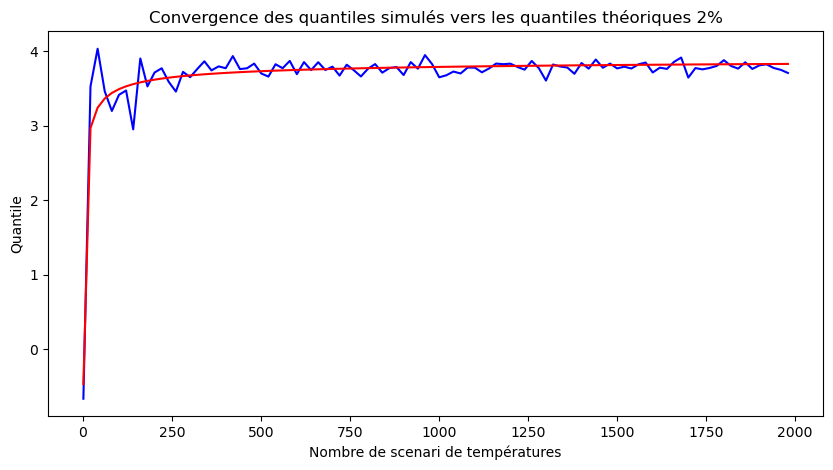

In [113]:
plt.plot(moyenne_glissante_general['index'], moyenne_glissante_general["Q 2%"],color='blue')
plt.plot(moyenne_glissante_general['index'], moyenne_glissante_general['QQ 2% '],color='red')

plt.xlabel("Nombre de scenari de températures")
plt.ylabel("Quantile")
plt.title("Convergence des quantiles simulés vers les quantiles théoriques 2%")

plt.show()

In [114]:
moyenne_glissante_general.tail(10)

index      Q 98%      Q 2%  un    sqrt_n    QQ 98%     QQ 2% 
90   1801  18.960155  3.881720   1  0.023564  18.891281  3.826623
91   1821  18.934298  3.804284   1  0.023434  18.890787  3.827194
92   1841  18.900412  3.768401   1  0.023306  18.890301  3.827755
93   1861  18.902794  3.853451   1  0.023181  18.889823  3.828307
94   1881  18.959764  3.763877   1  0.023057  18.889353  3.828851
95   1901  18.939428  3.812887   1  0.022936  18.888890  3.829386
96   1921  18.842871  3.826224   1  0.022816  18.888434  3.829912
97   1941  18.940812  3.776626   1  0.022698  18.887986  3.830430
98   1961  18.924071  3.751834   1  0.022582  18.887544  3.830941
99   1981  18.951104  3.710030   1  0.022468  18.887109  3.831443

**Conclusion : Le risque en températures 2% froid est d'avoir une température inférieure à 3.83°C pendant 3 jours consécutifs.**